# Framework DJANGO

# Notebook pour base et autres notes sur le Framework

Notebook pour l'apprentissage du Framework DJANGO.

Ayant déjà suivis certains cours et tutoriels pour ce framework il y a un moment mais sans connaissance du support Notebook à cet instant, je repars de zéro avec une video tutoriel.

Le lien de la video :  <a>https://www.youtube.com/watch?v=UmljXZIypDc&t=533s</a>

Dans ce tutoriel en plusieurs vidéos, nous voyons la conception d'un blog basique comprenant :

- Une interface d'administration
- Une page d'accueil avec les différents articles du blog
- Une page d'authentification pour se connecter à son profil
- Une page pour chaque article avec la possibilité de les modifier et les supprimer si vous en êtes l'auteur
- Une page pour créer un nouvel article
- Une side-bar

Nous allons donc voir beaucoup d'aspects du framework

# Software et Librairies utilisées

- Anaconda Navigator 1.10.0
- Cmder pour la ligne de commande sur Windows
- Visual Studio Code
- Jupyter Notebook pour la prise de note
- Python 3.8.5
- Django 3.1.3

Nous avons créer un environnement virtuel avec Anaconda Navigator au préalable.

Pour y installer Django dedans, créer le nouvel environnement via l'interface graphique de Anaconda Navigator, ouvrir une ligne de commande avec cette environnement et taper python -m pip install django


# Créer un nouveau projet DJANGO

Rendez-vous dans le dossier où vous voulez initialiser votre projet Django avec l'invite de commande, pour ma part ce sera dans mon dossier Python/django.

Dans l'invite de commande, taper <i>django-admin</i>. Cette commande va afficher toutes les commandes disponibles avec le framework Django.

Nous, nous allons taper la commande <i>django-admin startproject project_name</i> en remplaçant "project_name" par le nom que vous voulez. Cette commande va générer la structure globale de notre projet Django.

Si dans notre invite de commande on regarde le contenu de notre dossier actuel, on peut voir d'un dossier du nom de notre projet à été créer, et voici la structure de celui-ci :

Insérer une image de l'arborescence du projet Django blog_base

En premier nous avons le fichier <i>manage.py</i>. Ce  fichier ne va subir aucune modification pendant le projet, il permet d'exécuter des commandes dans l'invite de commande pour le projet Django.

Ensuite dans le dossier du nom du projet nous avons :

- __init__.py qui est un fichier vide, indiquant uniquement à Python que le dossier dans le lequel se trouve ce fichier est considérer comme un package
- settings.py, un fichier contenant la majorité des configurations de notre projet, comme la langue, la base de donnée utilisée, ou encore le dossier contenant les templates, nous verrons ses modifications tous le long du tutoriel
- urls.py qui rencense le mapping des urls de notre projet. C'est dans ce fichier que nous déclarerons les différents chemins projet, comme vous pouvez le voir, il en existe déjà un, le chemin admin/ qui envoi vers l'interface d'authentification pour l'admistrateur du site
- asgi.py et wsgi.py, leur utilité m'échappe pour le moment mais il doit s'agir d'un fichier de configuration de connexion pour notre projet.

Nous avons vu comment créer une structure de projet avec Django. Une fois cette structure générée, nous pouvons vérifier son bon fonctionnement basique. Pour cela, aller dans le dossier du projet contenant le fichier <i>manage.py</i> avec l'invite de commande et taper la commande <i>python manage.py runserver</i>.

Vous pouvez voir un premier message d'alerte indiquant qu'il manque certaines migrations, que nous ferons plus tard lors de la création de la base de donnée. En dessous de ce message, Django vous indique que vous pouvez vous rendre à l'adresse http://127.0.0.1:8000, s'y rendre avec votre moteur de recherche.

Voici la première page web que vous venez de générer. Django indique que l'installation est un succès et que vous voyez cette page car votre paramètres DEBUG dans le fichier settings.py est True. Fermer la page et retourner dans l'invite de commande, et appuyer sur Ctrl + C pour arrêter le serveur. Cette vérification faite, nous allons pouvoir passer aux Applications et Routes d'un projet Django.


# Applications et Routes

Un des principes fondamental du framework Django est qu'il fonctionne sous forme d'applications (app). Pour expliquer cette logique, nous prennons souvent l'exemple d'un site, qui a pour but d'avoir plusieurs "fonctions": ce site aurait une partie blog, une première catégorie du site avec ses propres vues, ses propres chemin d'adresses, ses propres fonctions, et une partie boutique, avec encore une fois ses propres vues comme le catalogue, le panier,ses propres chemins, et ses propres fonctions comme payer le panier, afficher le prix des articles etc...

C'est en cela que Django est un framework puissant pour créer des sites complexes bien organisés, et facile à maintenir. Sachant que chaque partie du site à sa propre app, nous pouvons facilement modifier et administer ces applications indépendament des autres.

Dans le tutoriel ici il s'agit d'un blog basique pour le moment donc nous ne créerons qu'une seul app, mais encore une fois nous pourrions lui ajouter facilement une partie Boutique ou Autres en ajoutant une app.

Pour créer une Application avec Django, aller dans le dossier contenant le fichier <i>manage.py</i> avec l'invite de commande et taper <i>python manage.py startapp app_name</i>, avec app_name le nom de l'application que vous voulez, dans notre exemple "blog". Cela va créer un dossier du nom de l'app avec une structure un peu similaire.

Nous allons nous intéresser au fichier <i>views.py</i> en premier, qui accueille les différentes vues de notre app.

Nous pouvons constater qu'il y a deja un import réalisé dans le fichier (dont nous nous servirons plus tard) mais dans un premier temps, nous allons importer la methode HttpResponse de Django pour tester notre vue. Pour créer une vue, nous allons créer une méthode qui va capter tous le traffic qui se passe sur la page d'accueil du blog, nous allons donc appeler cette fonction <i>home()</i>

In [ ]:
# blog/views.py

# Import HttpResponse to test

from django.shortcuts import render
from django.http import HttpResponse

# Create your views here.

# Create method home handle all traffic in blog home page
# Using HttpResponse with brut html code to test the view
# Take request as argument

def home(request):
    return HttpResponse("<h1>Hello this is a test from blog home</h1>")

Nous venons de créer une première méthode de vue, pour capter et renvoyer une réponse lorsque la page d'accueil de notre blog est demandée. Mais pour le moment aucune adresse n'est associée à cette vue (view function). Donc nous allons créer un fichier <i>urls.py</i> pour créer nos chemins associés à nos view function de notre application.

Ce fichier sera très semblable au fichier <i>urls.py</i> de notre dossier de projet Django puisqu'il a la même fonction, cartographier les chemins de notre site (map urls) vers nos view functions. Le fichier <i>django_project/urls.py</i> va gérer les urls du site globalement, et le fichier <i>blog/urls.py</i> va donc gérer les urls de notre application

Donc comme pour le fichier de mapping d'urls du projet, nous pouvons importer la librairie path de django.urls pour créer des chemins (paths) selon le modèle d'url (url pattern) taper dans la barre du moteur de recherche.

Par exemple, en regardant le mapping url du projet de base, on peut voir que lorsque l'on tape admin à la suite du nom du site, on arrive sur les views functions (un peu particulière ici vu qu'il s'agit d'une view function faite directement par django) contenues dans admin.site.urls. Nous allons réaliser la même chose avec les urls de notre application.

Pour permettre de faire la liaison entre nos urls et nos views functions, on oubliera d'importer nos views dans le fichier <i>urls.py</i>

In [ ]:
# blog/urls.py

# Import views functions in views.py

from django.urls import path
from . import views

# Create a urlpatterns list contains differents urls and their views functions
# IMPORTANT : give a name of path with name= to don't collide with others views functions called home to, in other app.

urlpatterns = [
    path('', views.home, name='blog-home'),
]

Maintenant que la première view function et son path associés sont déclarés dans notre fichier d'url de l'app, nous allons réaliser une action un peu similaire, qui est de relier les paths de notre app "blog" à notre fichier d'url du projet global. Comme nous l'avions vue en amont, dans le fichier <i>blog_base/urls.py</i> se trouve les patterns d'urls de notre projet, comme le pattern pour accéder à l'interface d'administration

Nous allons donc déclarer un pattern (un pré-pattern) d'url donnant accès aux patterns de notre app "blog". Vu qu'il s'agit d'un blog, nous allons partir sur un préfixe d'url "blog/".

Pour indiquer à Django d'aller chercher les patterns d'url de notre app "blog" quand le prefixe <i>blog/</i> est dans l'url, nous allons importer et utiliser la méthode <i>include</i> fournis par Django:

In [ ]:
# blog_base/urls.py

# Import include method to django.urls

from django.contrib import admin
from django.urls import path, include

# Add new url patterns to search blog app url pattern
# Use include method to indicate at Django to search blog.urls with blog/ url

urlpatterns = [
    path('admin/', admin.site.urls),
    path('blog/', include('blog.urls'))
]

Après avoir déclarer ce nouveau url pattern, vous pouvez lancer le serveur de Django via <i>python manage.py runserver</i> et vous rendre sur https://127.0.0.1, Django vous indiquera qu'aucune page n'existe à cette adresse et c'est normal, mais si vous ajoutez /blog à l'adresse, vous tomberez sur la HttpResponse déclarée dans la view function de notre app "blog"

Pour vous résumer ce qu'il se passe, la requête de demande de la page passe par le fichier <i>blog_base/urls.py</i>, dans ce fichier elle cherche dans le urlpattern le pattern correspondand à la demande. Le pattern <i>/blog</i> correspondand, celui-ci appelle ensuite le fichier <i>blog/urls.py</i>.

Une fois dans le fichier des urls de l'app "blog", elle cherche encore le pattern correspondant à la suite du "pré-pattern" <i>/blog</i>, et trouve le pattern "" correspondant donc à notre view function <i>home()</i>. La requete est donc passée à notre view function qui elle, va retournée la HttpResponse.

Le mapping mise en place entre le fichier des urls du projet, et celui de l'app, nous pouvons facilement ajouter des view functions et d'autres urls pattern dans notre app, exemple ci-dessous en ajoutant une view function pour about :

In [ ]:
# blog/views.py

from django.shortcuts import render
from django.http import HttpResponse

# Create your views here.

def home(request):
    return HttpResponse("<h1>Hello this is a test from blog home</h1>")

# Add about view function

def about(request):
    return HttpResponse("<h1>Hello this is a test from blog about</h1>")

In [ ]:
# blog/urls.py

from django.urls import path
from . import views

# Add new pattern in urlpatterns list to map about view function

urlpatterns = [
    path('', views.home, name='blog-home'),
    path('about/', views.about, name='blog-about')
]

Nous pouvons tester cette nouvelle view function en allant à l'adresse https://127.0.0.1/blog/about

Nous avons vue une partie importante du framework Django qui est la gestion du mapping des urls d'un projet Django. Dans la partie suivante nous allons voir comment retourner des pages HTML plus complexes que nos HttpResponse via les templates, et passer des variables à nos templates pour les rendre plus dynamiques.


# Templates et Variables

## Templates

Nous avons vu qu'avec nos view function, nous pouvons retourner des HttpResponse basique comme une balise h1 avec du texte. Mais bien sur, un site web contient des pages webs en HTML beaucoup plus complexes.

Nous allons voir maintenant comment retourner des pages HTML complètes avec nos views function grâce aux templates. Dans un premier temp on va ajouter un dossier <i><b>templates</b></i> à notre dossier de l'app, et dans ce dossier ajouter un nouveau dossier <i><b>blog</b></i>.

Cette structure de dossier est une convention et est nécessaire pour que Django sache où chercher vos fichiers HTML de templates, selon les view functions.

Dans ce dossier on va commencer par créer une page HTML basique pour tester le fonctionnement des templates, un fichier <i><b>home.html</b></i>

In [ ]:
# home.html

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Blog Home</title>
</head>
<body>

    <h1>Blog Home Page</h1>

    <p>Hello and welcome to my blog with the framework Django !</p>
    
</body>
</html>

Voici votre premier template. Maintenant il va falloir indiquer plusieurs choses. La première est de déclarer notre app "blog" dans le projet global, et cela se passe dans le fichier ___settings.py___ du dossier de notre projet global.

Dans ce fichier, aller au niveau de la liste avec la clé __'INSTALLED_APP'__. Il va falloir y coller une ligne qui y indique notre app ___blog___, et pour cela aller dans le fichier ___blog/apps.py___ et copier le nom de la classe qui y est déclarée, dans notre cas normalement la classe s'appelle ___BlogConfig___.

Retour dans notre fichier ___settings.py___, indiquer dans la première ligne de la liste ___nomapp.apps.___ et coller le nom de la classe à la suite. N'oublier pas de mettre une virgule ensuite pour fermet la valeur dans la liste. Ainsi votre app est bien déclarée dans le projet global, ce qui va permettre à Django d'aller chercher les templates de votre app.

N'oubliez pas de réaliser cette manipulation pour chaque nouvelle application dans votre projet.

In [ ]:
# blog/apps.py

from django.apps import AppConfig

# Copy only the name of class

class BlogConfig(AppConfig):
    name = 'blog'


In [ ]:
# blog_base/settings.py

INSTALLED_APPS = [
    
    # Add their new app in first line of list
    # nameapp.apps.classname, don't forget ","
    
    'blog.apps.BlogConfig',
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
]

Maintenant retour dans notre fichier ___blog/views.py___. Nous allons modifier nos view function pour faire en sorte qu'elle retourne les template que nous venons de créer, et qui leurs correspondent.

Nous avons vu que ces view function retourne ont pour but de retourner des HttpResponses. Pour rendre nos templates comme des HttpResponses, il existe plusieurs méthodes, mais Django met à disposition une méthode simplifiant ce rendu, et cette méthode est déjà importer dans notre fichier. Oui il s'agit de la méthode ___render___

Nous pouvons supprimer la ligne d'import de ___HttpResponse___. Alors pour utiliser la méthode render, nous la mettons donc dans le ___return___ de notre view function, et nous lui passons en argument, la request, puis un string du chemin vers le template HTML que nous souhaitons en partant du principe que nous somme déjà dans le dossier ___templates___ de notre app.

Donc nous lui indiquerons dans notre cas, pour la view function ___home___, le chemin ___'blog/home.html'___

In [ ]:
# views.py

# Delete HttpResponse import
from django.shortcuts import render

# Use render to return html template home.html
# Pass request and the template path, begin in templates folder app

def home(request):
    return render(request, 'blog/home.html')

# Create a about.html template and realize same to render it

def about(request):
    return render(request, 'blog/about.html')

Vous pouvez tester le bon fonctionnement du rendu des templates en démarrant le serveur avec la commande ___runserver___ et en allant aux urls que nous avons mapper avec nos view functions. Maintenant, nous allons voir comment rendre de notre site plus dynamique.


## Données et Dictionnaire Context

Pour l'exemple, nous allons créer une fausse base de donnée que nous mettrons dans une variable ___posts___. Cette base de donnée va contenir une liste de dictionnaire pour représenter les futurs articles de notre blog.

On aura donc une clé ___author___ pour l'auteur de l'article, ___title___ pour le titre de l'article, ___content___ pour le contenu de l'article, et ___date_posted___ qui est normalement au format datetime mais ici ce sera un string

In [ ]:
# blog/views.py

# Fake database of their futur posts

posts = [
    {
        'author': 'Alexis',
        'title': 'Title Post 1',
        'content': 'This is the content of my first post',
        'date_posted': 'December 12, 2020'
        
    },
    {
        'author': 'Lauren',
        'title': 'Title Post 2',
        'content': 'This is the content of my second post',
        'date_posted': 'December 13, 2020'
        
    },
]

Dans notre view function ___home()___, nous allons vouloir passer nos articles pour qu'ils apparaissent dans notre page d'accueil. Pour cela, on créé une variable ___context___ (convention Django), qui sera un dictionnaire. Dans ce dictionnaire je vais y mettre une clé ___posts___ qui aura comme valeur ma variable list ___posts___ contenant mes articles.

Et ce dictionnaire ___context___, nous allons le passer en 3e argument à notre fonction render. Cela va avoir pour effet de donner accès à ce dictionnaire ___context___ dans notre template, dans lequel nous allons aller tout de suite pour voir comment l'utiliser

In [ ]:
# blog/views.py

from django.shortcuts import render

posts = [
    {
        'author': 'Alexis',
        'title': 'Title Post 1',
        'content': 'This is the content of my first post',
        'date_posted': 'December 12, 2020'
        
    },
    {
        'author': 'Lauren',
        'title': 'Title Post 2',
        'content': 'This is the content of my second post',
        'date_posted': 'December 13, 2020'
        
    },
]

def home(request):
    
    # Create dict var contains key
    # Pass list var posts at posts key in context dict
    
    context = {
        'posts': posts
    }
    
    # Pass context dict to give access at his content in their templates
    
    return render(request, 'blog/home.html', context)

De retour dans notre fichier de template ___home.html___, nous allons voir comment accéder aux données passer à notre view function via la variable ___context___.

Il est possible de faire en sorte d'écrire du code Python dans notre fichier HTML. Pour cela nous allons utiliser cette forme ___{% %}___ pour débuter un block de code et le fermer avec cette forme également. Dans l'exemple ci-dessous, dans notre fichier ___home.html___, nous allons itérer sur la liste de nos articles contenus dans notre variable list ___posts___ avec une boucle for.

Pour utiliser les données de notre ___context___, on pourra passer le nom des variables et autres dans nos balises html avec la forme ___{{nomvar}}___ toujours entre nos "délimiteurs" de bloc de code

Il faut donc comprendre que dans notre bloc de code, nous pouvons utiliser les données contenues dans notre variable ___context___ comme le montre l'exemple ci-dessous :

In [ ]:
# blog/templates/blog/home.html

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Blog Home</title>
</head>
<body>

    <h1>Blog Home Page</h1>

    <p>Hello and welcome to my blog with the framework Django !</p>

    # Begin of for code block with {% %}
    # Between of for and endfor, using values associate at posts key, which is posts list contains our posts
    
    {% for post in posts %}

    # {{ var }} to put var in HTML tag
    
        <h1>{{ post.title }}</h1>
        <p> By {{ post.author }}  on {{ post.date_posted }}</p>
        <p> {{ post.content }}</p>
    
    {% end for %}
    
</body>
</html>

Ci-dessus, nous avons donc réaliser une boucle sur la liste de dictionnaire ___posts___. Ne jamais oublier de bien fermer la boucle ___for___ avec un ___endfor____.

Tous comme dans un code Python basique, on peut également réaliser des structures conditionnelles. Pour l'exemple nous ajoutons une structure conditionnelle dans laquelle si une variable ___title___ est passée à notre function view, cela affiche son contenu précédé de ___Django Blog___.

Pour la view function ___home___ nous ne passons rien, mais nous le faisons avec ___about___, et vous pouvez voir que nous passons directement la variable via un dictionnaire directement dans la méthode ___render___

In [ ]:
# blog/views.py

def home(request):
    context = {
        'posts': posts
    }
    return render(request, 'blog/home.html', context)

def about(request):
    
    # pass dictionnary with title key/value in render method
    
    return render(request, 'blog/about.html', {'title': 'About'})

In [ ]:
# blog/templates/blog/about.html

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
    # Begin of if bloc
    # if title var is pass, display value in title
    # else, display Django Blog
    
    {% if title %}
        <title>Django Blog - {{ title }}</title>
    {% else %}
        <title>Django Blog</title>
    {% endif %}

</head>
<body>

    <h1>About PAge</h1>

    <p>This is the About Page</p>
    
</body>
</html>

## Heritage

Maintenant que nous avons vu une bonne partie du fonctionnement des templates avec DJANGO, nous allons aborder la partie de l'héritage, qui en Python, permet de créer une classe en d'hériter des methodes et attributs de la classe Parent.

Nous pouvons observer que dans nos templates ___home.html___ et ___about.html___, il y a certaines parties de code qui se répètent, ce qui n'est jamais bon en code en général.

Nous allons donc voir comment faire pour que nos templates n'est uniquement que la partie qui leur est propre, et que dans une autre partie, se trouve le code en commun.

Pour cela nous allons d'abord créer un nouveau templates ___base.html___ qui va accueillir ce code commun. Dans ce code commun, on retrouve la structure de base d'une page HTML, la structure conditionnnelle pour la balise ___title___ de la page, et la fermeture de la page HTML.

Faire un copier coller de ce code commun dans la page ___base.html___. Ensuite on va créer un nouveau bloc ___block content___, qui sera la partie variable des pages. Retournons dans nos différents templates, et enlever la partie de code commun qu'il y a. 

Nous allons réaliser un héritage du template ___base.html___ à nos 2 templates ___home.html___ et ___about.html___. Pour cela, ouvrir une structure ___{% %}___ en première ligne de la page, et y mettre ___extends___ suivi du chemin vers le template que nous voulons faire hériter en format string comme ceci ___'blog/base.html'___.

Le lien est fais entre nos templates, maintenant la partie du code variable dans nos templates doit être mise dans une structure ___{% block content %} {% endblock content %}___ pour faire en sorte de dire à notre template parent qu'il s'agit de cette partie qui ira dans la structure ___block content___ du template parent.

In [ ]:
# blog/templates/blog/base.html

# New template file host similar part of code in the 2 templates home and about

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
    {% if title %}
        <title>Django Blog - {{ title }}</title>
    {% else %}
        <title>Django Blog</title>
    {% endif %}

</head>
<body>
    
    # block content to say this is the variable part
    
    {% block content %}
    {% endblock %}

</body>

In [ ]:
# blog/templates/blog/home.html

# extends to get inheritance of base.html template

{% extends 'blog/base.html' %}

# block content structure to pass this part of code at block content structure in parent template
# here pass it at base.html block content

{% block content %}
    <h1>Blog Home Page</h1>

    <p>Hello and welcome to my blog with the framework Django !</p>

    {% for post in posts %}

        <h1>{{ post.title }}</h1>
        <p> By {{ post.author }}  on {{ post.date_posted }}</p>
        <p> {{ post.content }}</p>

    {% endfor %}
    
# Don't forget to close the content block with endblock content

{% endblock content %}

In [ ]:
# blog/templates/blog/about.html

# Same thing with about template

{% extends 'blog/base.html'%}
{% block content %}
    <h1>About PAge</h1>

    <p>This is the About Page</p>
{% endblock content %}

Le fait d'utiliser ce systeme d'héritage de template rend un site web beaucoup plus facile à maintenir, et les pages de nos différents templates s'en trouve également alléger.

Nous pourrons facilement appliquer une modification à toutes nos pages en passant uniquement par notre template parent, comme ajouter Bootstrap à notre site web, ou d'autre fichier CSS ou JS, et tous sera répartis sur toutes nos pages vu qu'elles héritent de notre template parent.

In [ ]:
# blog/templates/blog/base.html

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">

    <!-- Bootstrap css -->
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-giJF6kkoqNQ00vy+HMDP7azOuL0xtbfIcaT9wjKHr8RbDVddVHyTfAAsrekwKmP1" crossorigin="anonymous">
    
    {% if title %}
        <title>Django Blog - {{ title }}</title>
    {% else %}
        <title>Django Blog</title>
    {% endif %}

</head>
<body>
    
    {% block content %}
    {% endblock %}

    <!-- Bootstrap and Popper JS -->
    <script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.5.4/dist/umd/popper.min.js" integrity="sha384-q2kxQ16AaE6UbzuKqyBE9/u/KzioAlnx2maXQHiDX9d4/zp8Ok3f+M7DPm+Ib6IU" crossorigin="anonymous"></script>
    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/js/bootstrap.min.js" integrity="sha384-pQQkAEnwaBkjpqZ8RU1fF1AKtTcHJwFl3pblpTlHXybJjHpMYo79HY3hIi4NKxyj" crossorigin="anonymous"></script>

</body>
</html>

Pour nous concentrer sur l'aspect DJANGO du projet, l'auteur du tutoriel vidéo suivis fournis des bouts de codes de mise en forme du site que nous appliquerons également pour gagner du temps. Il s'agit d'une barre de navigation ainsi que d'un contenu fait spécialement avec les balises et classes de Bootstrap.

Voici le code du template ___base.html___ après intégration des codes fournis par l'auteur

In [ ]:
# blog/templates/blog/base.html

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">

    <!-- Bootstrap css -->
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-giJF6kkoqNQ00vy+HMDP7azOuL0xtbfIcaT9wjKHr8RbDVddVHyTfAAsrekwKmP1" crossorigin="anonymous">
    
    {% if title %}
        <title>Django Blog - {{ title }}</title>
    {% else %}
        <title>Django Blog</title>
    {% endif %}

</head>
<body>

    <header class="site-header">
        <nav class="navbar navbar-expand-md navbar-light bg-steel fixed-top">
          <div class="container">
            <a class="navbar-brand mr-4" href="/">Django Blog</a>
            <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarToggle" aria-controls="navbarToggle" aria-expanded="false" aria-label="Toggle navigation">
            <span class="navbar-toggler-icon"></span>
            </button>
            <div class="collapse navbar-collapse" id="navbarToggle">
              <div class="navbar-nav mr-auto">
                <a class="nav-item nav-link" href="/">Home</a>
                <a class="nav-item nav-link" href="/about">About</a>
              </div>
              <!-- Navbar Right Side -->
              <div class="navbar-nav">
                <a class="nav-item nav-link" href="#">Login</a>
                <a class="nav-item nav-link" href="#">Register</a>
              </div>
            </div>
          </div>
        </nav>
    </header>
    
    <main role="main" class="container">
        <div class="row">
          <div class="col-md-8">
            {% block content %}{% endblock %}
          </div>
          <div class="col-md-4">
            <div class="content-section">
              <h3>Our Sidebar</h3>
              <p class='text-muted'>You can put any information here you'd like.
                <ul class="list-group">
                  <li class="list-group-item list-group-item-light">Latest Posts</li>
                  <li class="list-group-item list-group-item-light">Announcements</li>
                  <li class="list-group-item list-group-item-light">Calendars</li>
                  <li class="list-group-item list-group-item-light">etc</li>
                </ul>
              </p>
            </div>
          </div>
        </div>
    </main>

    <!-- Bootstrap and Popper JS -->
    <script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.5.4/dist/umd/popper.min.js" integrity="sha384-q2kxQ16AaE6UbzuKqyBE9/u/KzioAlnx2maXQHiDX9d4/zp8Ok3f+M7DPm+Ib6IU" crossorigin="anonymous"></script>
    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/js/bootstrap.min.js" integrity="sha384-pQQkAEnwaBkjpqZ8RU1fF1AKtTcHJwFl3pblpTlHXybJjHpMYo79HY3hIi4NKxyj" crossorigin="anonymous"></script>

</body>
</html>

## Ajout des fichiers statiques (CSS, JS...)

Pour ajouter des fichiers statiques (static files) à DJANGO, nous avons besoin de les mettre dans un endroit en particulier pour que DJANGO puisse les trouver.

En premier dans le dossier de notre app, nous allons créer un nouveau dossier ___static___, et dans celui-ci nous créons un nouveau dossier du nom de l'app (un peu similaire à la structure des templates), donc ___blog___ ici. C'est dans ce dernier dossier que nous pourrons mettre nos fichiers CSS et JS qui concernent notre app.

IL faut maintenant inclure ces fichiers dans notre template parent ___base.html___. La manière d'inclure ces fichiers est un peu particulière. Nous devons demander en premier à notre template d'aller chercher le dossier où se trouve nos fichiers statiques, celui que nous venons de créer.

En première ligne de ___base.html___, ouvrir un bloc de code ___{% %}___ et y indiquer ___load static___. Maintenant que le template sait où chercher, nous pouvons déclarer par exemple notre ligne pour aller chercher notre fichier CSS.

Dans le le lien ___href___ de notre balise, pour lui indiquer d'aller chercher dans notre dossier ___static___, il faut ouvrir un bloc de code ___{% %}___, préciser le dossier root des fichiers donc ___static___, et enfin le chemin de notre fichier en partant du dossier root donc, dans notre exemple, ___blog/main.css___.

Le fait d'indiquer ___static___ avant le chemin vers notre fichier CSS génère un chemin absolu du dossier ___static___ de notre app.

In [ ]:
# Load static root folder with load static bloc

{% load static %}
<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">

    <!-- Bootstrap css -->
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-giJF6kkoqNQ00vy+HMDP7azOuL0xtbfIcaT9wjKHr8RbDVddVHyTfAAsrekwKmP1" crossorigin="anonymous">
    
    # In href to css file, indicate in bloc code the root folder static, and the css file path
    
    <link rel="stylesheet" type="text/css" href="{% static 'blog/main.css' %}">
    {% if title %}
        <title>Django Blog - {{ title }}</title>
    {% else %}
        <title>Django Blog</title>
    {% endif %}

</head>

## Passer les URLs Pattern dans les liens

Nous allons nous focaliser sur une dernière chose dans cette partie, vu que nous venons d'ajouter une navbar à notre template de base de notre blog.

Dans cette navbar, nous pouvons voir les différents liens vers les autres pages de notre blog comme la page Home ou About, et les futures pages comme Login ou Register. Dans les ___href___ des balises de lien HTML ___a___, les liens ne sont pas encore fait.

Nous avons vu qu'il était très facile d'utiliser des mots clés avec DJANGO pour réaliser des chemins absolus vers nos dossiers, comme avec les static files. Pour les urls de nos différentes pages, c'est pareil, nous pouvons utiliser le mot clé ___url___ pour faire appel aux patterns de notre app, situés dans notre fichier ___urls.py___.

Donc dans l'argument ___href___, ouvrir un bloc de code et taper ___url___ suivis du nom que nous avons donner à notre pattern dans le fichier ___urls.py___. Pour le pattern de la page d'accueil par exemple, nous avons mis ___name = 'blog-home'___, donc dans le ___href___, mettre ___{% url 'blog-home' %}___. Et faire le même principe pour vos autres pages.

In [ ]:
# blog/templates/blog/base.html

<header class="site-header">
    <nav class="navbar navbar-expand-md navbar-light bg-steel fixed-top">
      <div class="container">
        <a class="navbar-brand mr-4" href="{% url 'blog-home' %}">Django Blog</a>
        <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarToggle" aria-controls="navbarToggle" aria-expanded="false" aria-label="Toggle navigation">
        <span class="navbar-toggler-icon"></span>
        </button>
        <div class="collapse navbar-collapse" id="navbarToggle">
          <div class="navbar-nav mr-auto">
            
            # url keyword create absolute path to urls pattern
            # pass it name of url pattern define for each page
            
            <a class="nav-item nav-link" href="{% url 'blog-home' %}">Home</a>
            <a class="nav-item nav-link" href="{% url 'blog-about' %}">About</a>
          </div>
          <!-- Navbar Right Side -->
          <div class="navbar-nav">
            <a class="nav-item nav-link" href="#">Login</a>
            <a class="nav-item nav-link" href="#">Register</a>
          </div>
        </div>
      </div>
    </nav>
</header>

# Admin Page (Page d'administration)

Dans cette partie, nous explorons une partie importante, qui fais la force de DJANGO, l'interface d'administration fournie. Pour y accéder, il suffit de démarrer le serveur de développement et aller à la page ___/admin___. Vous arrivez normalement sur une page vous demandant un nom d'utilisateur et un mot de passe, qui pour l'instant n'existe pas.

Nous allons le créer tout de suite, mais avant une petite manipulation doit être effectuée. La commande permettant de créer un compte administrateur est la suivante : ___python manage.py createsuperuser___, mais si vous l'exécuter maintenant une erreur se produit.

Cette erreur dis qu'il n'existe pas de table dans la base de donnée pour créer un ___auth_user___. Lorsque nous avons générer notre projet de base, une base de donnée s'est générée également en lien avec le projet, le fichier ___db.sqlite3___. Les erreurs que nous pouvont observer en rouge lors du démarrage du serveur local sont également liés à cette database.

Pour créer cette première table, il faut effectuer une migration sur la base donnée, c'est à dire une première déclaration de modification de la base donnée (database statement). Pour créer donc cette première migration, et également pour les prochaines modification que réaliserons sur la base de donnée, taper en premier dans la ligne de commande ___python manage.py makemigrations___.

La console indique qu'aucun changement n'a été réalisé, et effectivement nous n'avons pas encore travaillé avec la base de donnée. Pour envoyer la migration, taper ensuite ___python manage.py migrate___. Vous verrez plusieurs lignes apparaître indiquant les status des changements réalisés sur la database, et notamment la création de notre table de ___auth_user___.

Une fois cette première migration réalisée, nous pouvons donc créer notre utilisateur administrateur avec la commande ___python manage.py createsuperuser___. DJANGO vous demande un utilisateur, votre adresse mail, et un mot de passe à entrer.

Votre nom d'utilisateur et mot de passe créés, vous pouvez vous rendre de nouveau sur la page d'administration ___/admin___ et les taper. N'hésitez pas à vous ballader dans l'interface pour découvrir les possibilités qu'elle offre. Il s'agit pour le moment de la page Admin par défaut, que nous pourrons agrémenter plus tard dans ce tutoriel. Pour le moment, celle-ci nous permet de créer un nouvel utilisateur et gérer les droits des différents utilisateurs de l'Admin page.

# Databases

## La classe Model et fichier models.py

Pour introduire cette partie, nous allons parler du mot ORM pour Object-Relational Mapping. Ce doux nom est une technique de programmation permettant de simplifier l'accès à une base de donnée en passant par une logique orientée objet, plutôt que d'intéragir directement avec la Database.

Pour DJANGO, cela permet de définir facilement nos différentes tables et champs et de notre base de donnée, via une programmation orientée objet, basé sur la classe ___Model___ fournis par DJANGO.

Si tous cela n'est pas très clair, la pratique va vous aider à comprendre, et vous pouvez également vous référer à Google pour réaliser une recherche sur le mot ORM pour plus d'informations.

Nous allons voir en premier exemple, la creation de notre table qui contiendra les différents articles des utilisateurs. Il faut savoir également qu'il est possible d'utiliser plusieurs SGBD (Systeme de Gestion de Base de Donnée) avec DJANGO, paramètrable dans les settings du projet général. Dans ce tutoriel, nous partons sur une base de donnée SQLITE pour le côté developpement, et une base de donnée Postgre SQL pour la mise en production.

Pour commencer, rendez-vous dans le fichier ___models.py___ généré par DJANGO lors de la création de notre app ___blog___. C'est ici dans ce fichier que nous déclarerons toutes les choses que nous voulons dans notre base de donnée. Première étape, créer une classe avec en héritage la classe ___Models___ inclus dans le package ___models___ déjà importer dans le fichier.

Cette classe va représenté notre table dans laquelle nous allons mettre des champs, nous déclarons ici la table ___Post___ contenant donc tous les articles du blog. Nous allons voir ligne par ligne ce que nous mettons dans cette première table.

In [ ]:
#blog/models.py

from django.db import models

class Post(models.Model):
    title = models.CharField(max_lenght=100)

En premier champ, le titre de l'article, nous déclarons donc une variable ___title___ qui est un champs contenant des chaines de caractères, pour cela nous faisons appel à la classe ___CharField___ de ___models___, et nous lui mettrons en argument ___max_lenght___ définissant le nombre maximum de caractères que contiendra ce champ.

In [ ]:
content = models.TextField()

Deuxieme ligne, deuxieme champ, ___content___, qui accueillera le texte de l'article. Etant donné que le texte d'un article est souvent plus grand que son titre, ici on utilise la classe ___TextField___, qui est aussi une classe générant un champ de chaine de caractère dans la base de donnée

In [ ]:
from django.db import models
from django.utils import timezone

class Post(models.Model):
    date_posted = models.DateTimeField(defautl=timezone.now)

Troisième ligne dans la classe ___Post___, un champ de date avec la classe ___DateTimeField___. Nous pouvons remarquer que nous définissons sa valeur par défaut avec une méthode fournis par le package ___utils___ de DJANGO qui est ___timezone___. Cette méthode permettant d'appeler la méthode ___now()___ va définir la date de l'article automatiquement au moment où il est posté. Il existe une autre méthode consistant à utiliser le paramètre ___auto_add_now=True___, mais celui-ci rend la date impossible à changer après. 

In [ ]:
from django.contrib.auth.models import User

class Post(models.Model):
    author = models.ForeignKey(User, on_delete=models.CASCADE)

La quatrième ligne de notre classe est une des plus intéressante. Les utilisateurs de ce blog sont déclarer dans une autre table comme nous l'avons vu lors de la première migration de notre Database. Nous faisons en sorte de réaliser une liaison entre la tables des auteurs/utilisateurs du blog, et celle que nous créons dans la classe ___Post___.

Pour cela nous importons la classe qui représente la table des utilisateurs, présente donc ___django.contrib.auth.models___, et nous la passons à la classe ___ForeignKey___ (clé étrangère), classe pour générer notre champ et créer une relation ___one-to-many-relationship___ donc qu'un auteur peut avoir plusieurs articles, mais qu'un article n'a qu'un auteur.

Dernier argument que nous pouvons observer, ___on_delete___, qui permet de définir ce qui se passe si l'auteur lié à l'article est supprimé. Ici avec ___models.CASCADE___, nous indiquons que tous ses articles seront supprimés également, ne pas hésiter à aller sur le site officiel de DJANGO pour voir les possiblités offertes pour cet argument.

## Application des changements sur la Database

Si vous vous souvenez, lors de la partie sur la page Admin, nous avons due réaliser une migration pour créer et appliquer les changement sur la table User. Et bien nous allons répéter le même processus ici pour appliquer la creation et les changements de la table Post sur notre base de donnée.

Pour rappel donc, aller dans la console et taper ___python manage.py makemigrations___ pour initier la migration. En réalisant cette premiere commande, on peut voir dans notre dossier migration de notre dossier app, qu'un fichier ___0001_initial.py___ s'est généré, et en regardant à l'intérieur on peut voir le script que la commande à générer.

Avant de taper la commande pour exécuter la migration, nous pouvons voir une autre commande qui montre les requêtes SQL
qui vont être réalisées sur notre base de donnee. Dans l'invite de commande taper ___python manage.py sqlmigrate nomapp numeromogration___, et donc dans notre cas cela donne ___python manage.py sqlmigrate blog 0001___.

Puis taper ___python manage.py migrate___ pour enclencher la migration, et donc exécuter le script que nous avons vu précédement.

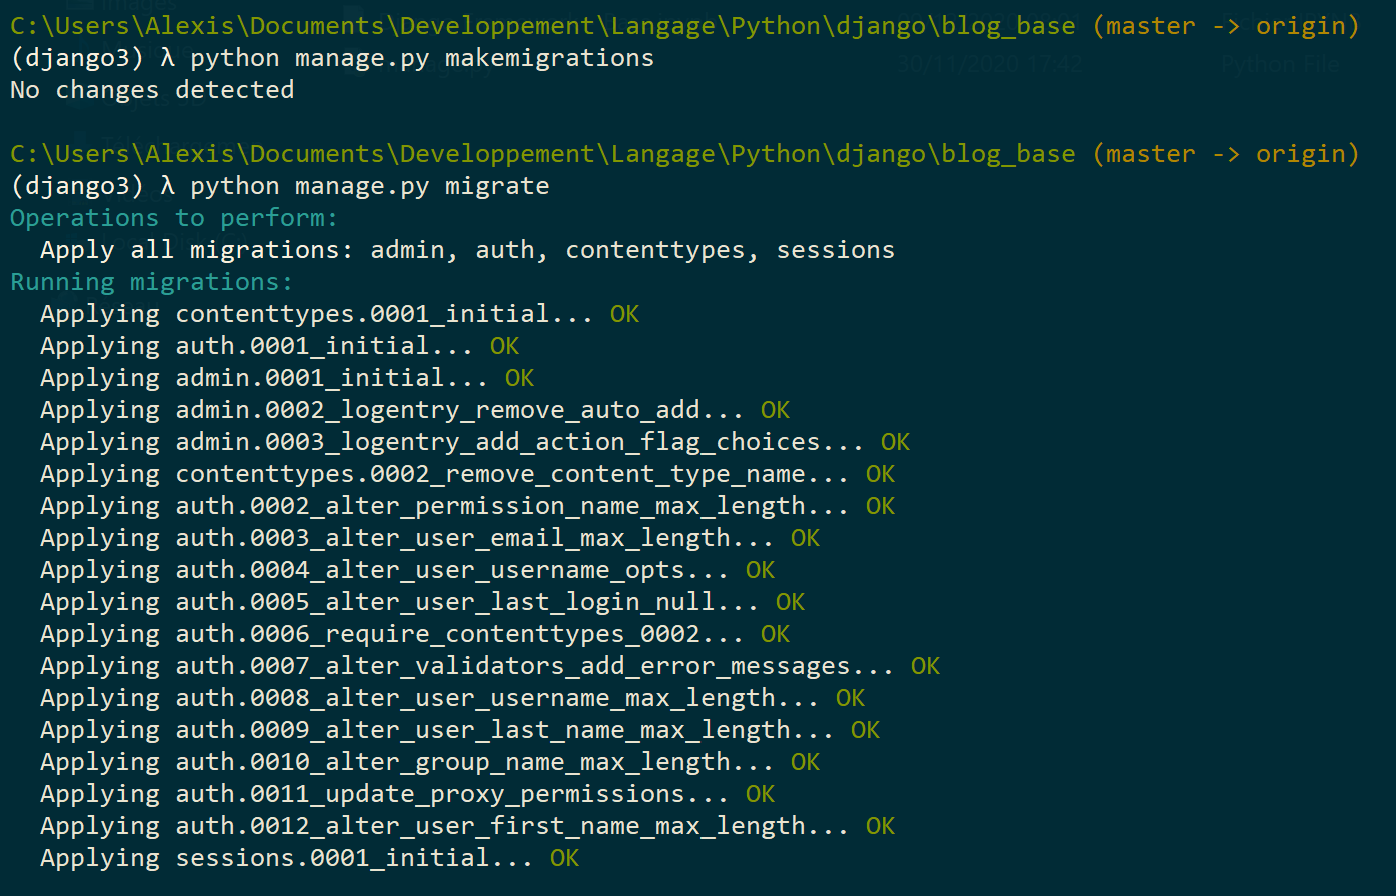

## La console de DJANGO

DJANGO intègre une console Python permettant d'intéragir avec la Database et réaliser des requêtes en ligne de commande. Nous allons voir quelques commandes avec le shell Python de DJANGO. Tout d'abord dans la console, taper la commande ___python manage.py shell___ qui va ouvrir la console Python.

Dans cette console, nous allons pouvoir intéragir avec nos classes et objets DJANGO. Pour commencer, importer nos ___models class Post___ et ___User___

In [ ]:
# Shell Python de Django

from blog.models import Post
from django.contrib.auth.models import User

A partir de cette import, nous pouvons faire des requêtes sur les 2 tables. Première requête possible, avoir toutes les entrées dans notre ___Model class___ avec l'attribut ___objects___ pour avoir les objets de notre classe, donc les entrées, et la méthode ___all()___ pour requêter tous les objets.

In [ ]:
# Shell Python de Django

User.objects.all()

La requête retourne un ___Query set___ contenant les résultats de notre requête. Pour avoir le premier objet retourné dans ce ___Query set___, nous utilisons la méthode ___first()___.

Nous pouvons directement faire un filtre sur les champs du modele, avec la méthode ___filter(field='value')___. Cela retournera également un ___Query set___ contenant les réponses à la requête.

In [ ]:
User.objects.filter(username='Alexpiration')

# Return user with username field contains "Alexpiration" value

Nous pouvons également stocker ce résultat dans une variable pour faire des requêtes sur ces attributs.

In [ ]:
user = User.objects.filter(username='Alexpiration').first()
user.id

# return 1

user.pk

# return the primary key of user entrie, here 1

post = Post.objects.all.first()
post.content

# return the content of first post in table

Autre méthode pour requêter sur une ___Model class___, la méthode ___get()___, à laquelle on passe une sorte de filtre comme l'id ou encore, dans notre cas, le nom de l'utilisateur.

In [ ]:
user = User.objects.get(id=1)

Maintenant nous allons voir comment créer un article dans notre table ___Post___ et l'associer à un utilisateur.

In [ ]:
post_1 = Post(title="Blog Post 1", content="This is the content of 1st Post", author=user)

# Don't precise date_posted with timezone.now() method for default value

L'article est créé, mais il n'est pas encore sauvegardé dans la Database. Pour cela il faut utiliser la méthode save sur l'objet représentant notre article.

In [ ]:
post_1.save()

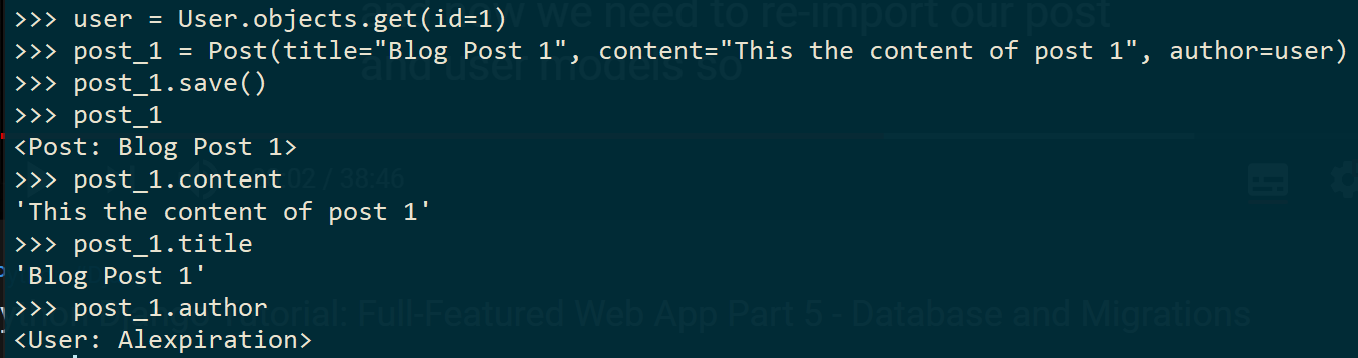

Notre article est créé, pour pouvoir mieux l'identifier dans la console, modifier la méthode spéciale ___str___ dans notre ___Model class Post___.

In [ ]:
class Post(models.Model):
    
    def __str__(self):
        return self.title

Nous pouvons réaliser ces commandes une nouvelle fois pour créer d'autres articles dans notre Database. Il est possible également de faire des requêtes sur l'utilisateur associé à ce poste, puisque c'est le ___User object___ qui y est associé.

In [ ]:
# Shell Python de DJANGO

post_1.author.email

# Return the email associate at the user associate at the post

Pour comprendre un mécanisme permis par DJANGO, prenons un exemple. Nous voulons tous les articles associés à un auteur. Nous pourrions avec les commandes vues, passer par une première requête sur tous les posts et faire une deuxième requête pour filtrer les résultats.

Pour faire ça plus simplement, DJANGO fournis une méthode spéciale. Elle est de la forme ___modelname_set___. Par exemple, pour avoir donc tous les articles associés à un objet ___User___, nous écrirons dans la commande ___user.post_set___ qui va retourner un objet non compréhensible, mais en appliquant la méthode ___all()___ nous obtenons un ___Query set___ avec tous les articles liés à notre utilisateur.

In [ ]:
# Shell Python de DJANGO

user = User.objects.get(id=1)
user.post_set.all()

Nous pouvons utiliser également cette méthode spéciale pour créer un article directement lié à l'utilisateur. Il suffit d'utiliser la méthode ____create()___ avec les arguments ___title___ et ___content___.

In [ ]:
user.create(title="Blog Post 2", content="This is the content of the blog post 2")

## Passer les données de la Database aux view functions

Nous avons créer de fausses données au début de ce tutoriel. Maintenant que nous avons initier et insérer des données dans la Database, nous allons voir comment les passer à nos view functions.

Pour cela supprimer en premier la "fausse base de donnée", et importer notre modèle ___Post___ dans notre fichier ___views.py___. Maintenant nous allons appliquer ce que nous avons vu juste au dessus, c'est à dire réaliser des requêtes sur notre ___Model class___ et stocker ces résultats de requêtes dans une variable que nous pourrons passer à notre dictionnnaire ___context___.

In [ ]:
from django.shortcuts import render
from .models import Post

def home(request):
    context = {
        'posts': Post.objects.all()
    }
    return render(request, 'blog/home.html', context)

def about(request):
    return render(request, 'blog/about.html', {'title': 'About'})

En relançant le serveur de développement, nous pouvons voir que nos données de la Database sont bien transmis à nos view functions et nos templates.

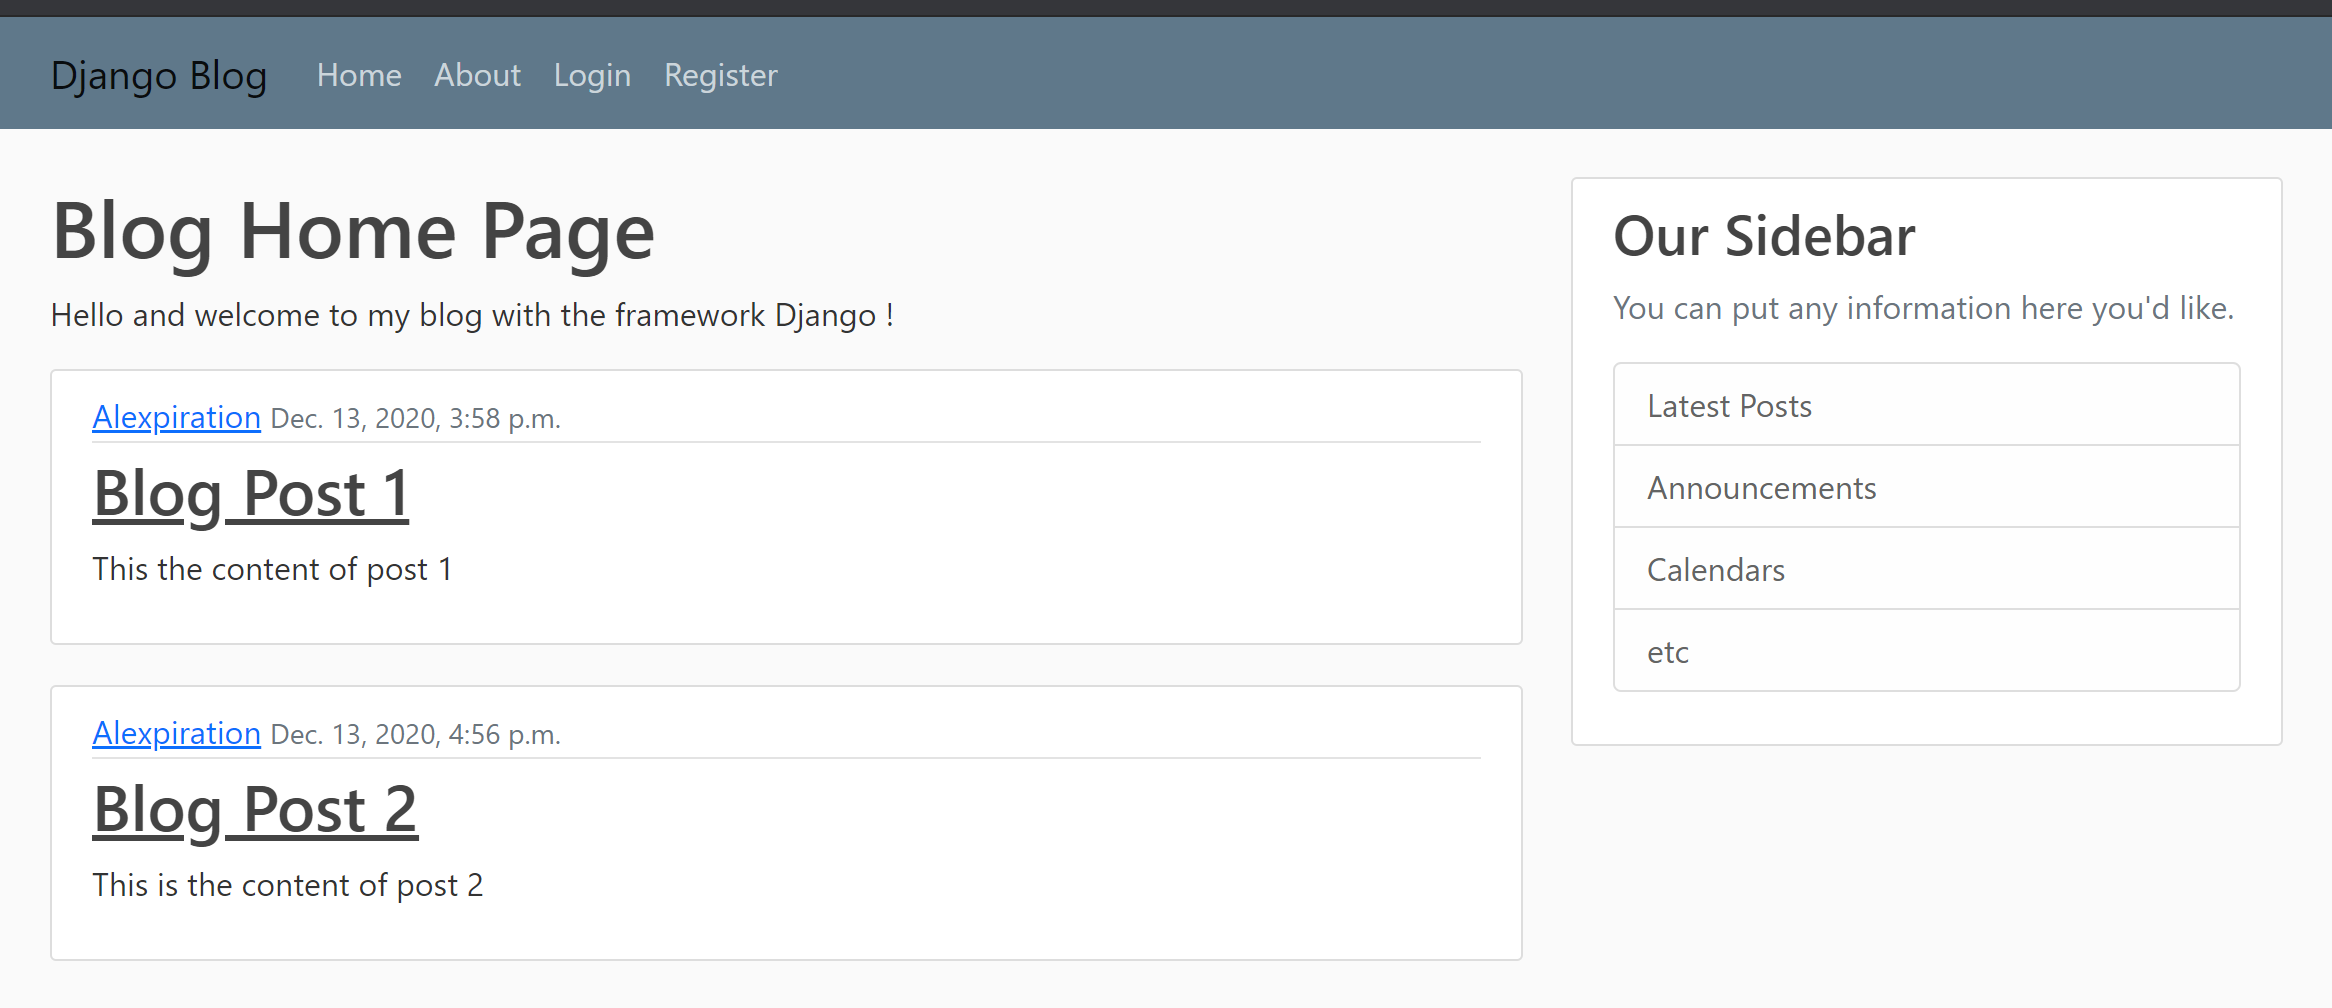

Une petite différence est à noter, c'est le format de date. En effet celui-ci est pris direct de la Database, mais nous pouvons la formater dans notre template. Retour dans le template ___home.html___, il est possible d'appliquer différents filtre sur nos datas que nous passons dans les blocs de codes.

Pour la date nous allons utiliser, dans le bloc de code faisant appel à ___post.date_posted___, à la barre verticale ___|___ pour initialiser notre filtre, puis écrire ____date:___ et après, nous allons indiquer quel type de format nous désirons pour la date. La documentation fournis tous les formats possibles que nous pouvons utiliser.

Dans cette exemple nous allons utiliser ___date:" F d, Y"___, F pour afficher le nom du mois, d pour le nombre du jour, et Y pour l'année.

## Ajout dans l'Admin Page

Dernière chose que nous voyons dans cette partie. Nous avons vu qu'il était possible de gérer notre table ___User___ directement depuis l'interface d'administration de DJANGO. Il est possible d'intégrer la gestion de nos autres ___Model class___, et donc de nos autres tables de la Database.

Par défaut, nos nouvelles ___Model class___ ne sont donc pas intégrer à la page Admin du projet. Cette intégration se réalise dans le fichier ___admin.py___ de notre app.

Nous importons notre modele dans le fichier en premier, puis nous passons à la méthode ___admin.site.register___ notre ___Model class___. C'est la première méthode d'intégration d'un modèle dans la page ADmin de DJANGO. Vous pouvez vous rendre sur la page Admin et constater que la liste intègre maintenant notre modeèle ___Post___.

In [ ]:
# blog/admin.py

from django.contrib import admin
from .models import Post

admin.site.register(Post)

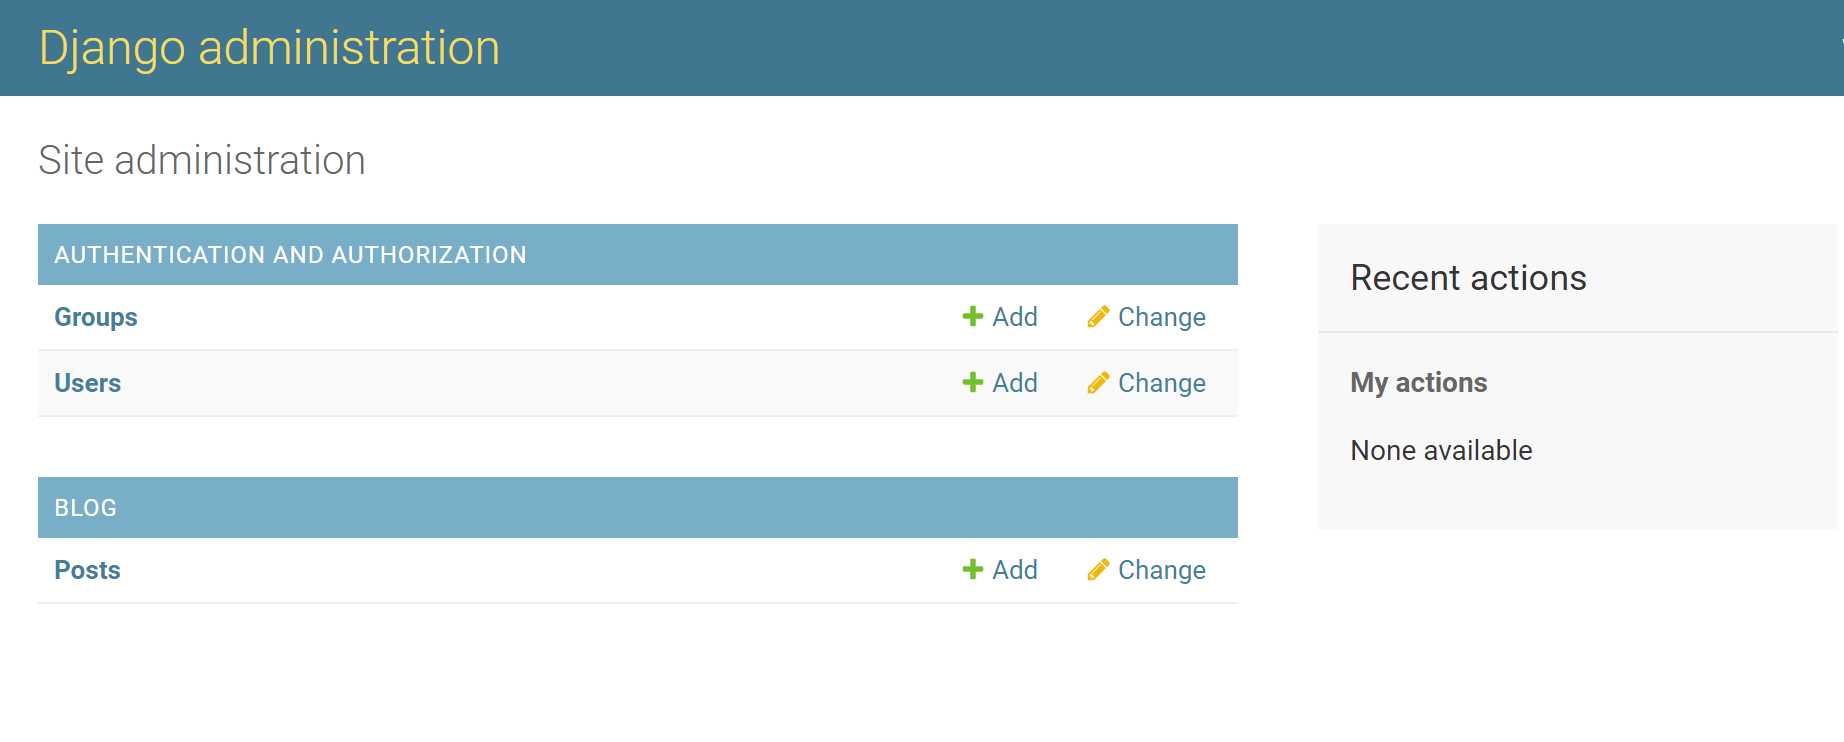

# User Registration

## Nouvelle app users

Dans cette partie nous allons concevoir une page d'enregistrements pour de nouveaux utilisateurs du blog. Bien sur l'intérêt ici est d'éviter de donner accès à la page Admin du site à n'importe quelle personnes.

La première chose que nous devons nous dire, c'est qu'une page de gestion d'un utilisateur est une sorte de portion de notre projet global, car cette partie aura ses propres patterns d'url, ses propres templates etc...

Donc le mieux que nous puissions faire ici est de créer une nouvelle app ___users___ pour gérer tous ca. Aller dans la ligne de commande, puis taper ___python manage.py startapp users___. Comme lors de la création de notre première app ___blog___, la même structure de dossiers/fichiers est générée. Il faut également en premier déclarer cette nouvelle app dans notre projet global.

Rappel : Aller dans ___settings.py___ du projet global, ajouter la classe correspondante à notre app dans la liste ___INSTALLED_APPS___. Vous trouverez le nom de la classe de l'app dans le fichier ___apps.py___ du dossier de l'app.

In [ ]:
# blog_base/settings.py

INSTALLED_APPS = [
    
    # New app users add
    
    'users.apps.UsersConfig',
    'blog.apps.BlogConfig',
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
]

## La classe de formlaire UserCreationForm avec DJANGO

Notre nouvelle app correctement ajoutée au projet, commençons par créer une première view function, qui sera la page de formulaire où l'utilisateur entrera ces informations pour s'enregistrer.

La creation d'un tel formulaire est parfois complexe. Il faut vérifier la nature, la forme, le nombre d'informations entrées par l'utilisateur pour bien valider l'envoi des données par la suite. Pour simplifier la chose, DJANGO embarque des systèmes de génération de formulaire.

Pour générer ce formulaire, nous allons donc passer par une instance de classe Python, fournis dans un package de DJANGO. Et vu qu'il s'agit de l'enregistrement de nouveaux utilisateurs, nous pouvons utiliser la classe ___UserCreationForm___ contenue dans ___django.contrib.auth.forms___

Commençons notre nouvelle view function.

In [ ]:
# users/views.py

from django.shortcuts import render

# Import UserCreationForm class contains form generator

from django.contrib.auth.forms import UserCreationForm


def register(request):
    
    # create new instance of UserCreationForm, and pass it at the context of render to pass it at the futur template
    
    form = UserCreationForm()
    return render(request, 'users/register.html', {'form': form})

Après cela nous allons tester la génération de notre formulaire en créant un nouveau templates dans notre app. Le schéma est similaire que lors de la creation de nos templates pour notre app ___blog___. Nous créons un dossier ___templates___ dans le dossier de notre app ___users___, et dans ce même dossier nous créons un nouveau dossier ___users___ qui accueillera nos différents templates de l'app.

Comme indiquer dans le ___return render___ de notre view function ___register___, appelons notre template ___register.html___.

In [ ]:
# users/templates/users/register.html

# Can extends blog base.html template even if in user app

{% extends 'blog/base.html'%}
{% block content %}
    <div class="content-section">
        <form method="POST">
        
            # The bloc code csrf_token is a security form integrate in Django
            # Protect form against some attacks (view Cross Site Request Forgery Protection in Django Doc)
        
            {% csrf_token %}

            <!-- fieldset tag allow to group related elements in a form -->
            
            <fieldset class="form-group">
                <legend class="border-bottom mb-4">Join Today</legend>
                {{ form }}
                <button class="btn btn-outline-info" info="submit">Sign Up</button>
            </fieldset>

        </form>
        <div class="border-top pt-3">
            <small class="text-muted">
                Already have an Account ? <a class="ml-2" href="#">Sign In</a>
            </small>
        </div>
    </div>

{% endblock content %}

En regardant avec plus de précisions ce nouveau template, nous pouvons voir certaines balises HTML typiques à la creation de formulaire, avec quelques classes Boostrap pour le mettre en forme.

Les choses plus spécifiques à DJANGO sont, en premier lieu, le fait que nous pouvons importer un template facilement d'une app à une autre. Ici nous importons le template ___base.html___ de notre app ___blog___.

Nous faisons appel à une première chose dans la balise ___form___ de notre template : le ___csrf token (Crossing Site Request Forgery)___. C'est une protection contre certaines attaques que nous pouvons subir lors de l'envoi ou de récupération de données via des formulaires.

N'hésitez pas à consulter cette rubrique importante dans la documentation de DJANGO.

Notre template est prêt, comme dis en amont, la procédure est un peu similaire qu'avec notre première app, nous allons créer des ___url patterns___ pour naviguer sur cette page. Nous pouvons créer un fichier d'url propre à notre application mais nous allons le faire plus tard. Pour le moment, nous allons directement importer les view functions dans notre fichier d'url du projet global comme ci-dessous.

In [ ]:
from django.contrib import admin
from django.urls import path, include

# Import user view directly of the views.py users app
# Change name of module to not combine other views import directly like this

from users import views as user_views

urlpatterns = [
    path('admin/', admin.site.urls),
    
    # Don't forget to assign a name if integrate view directly
    
    path('register/', user_views.register, name='register'),
    path('', include('blog.urls')),
]

L'integration de notre view function ___register___ est bien associé au url pattern, lancer le serveur de développement pour vérifier que tous fonctionne.

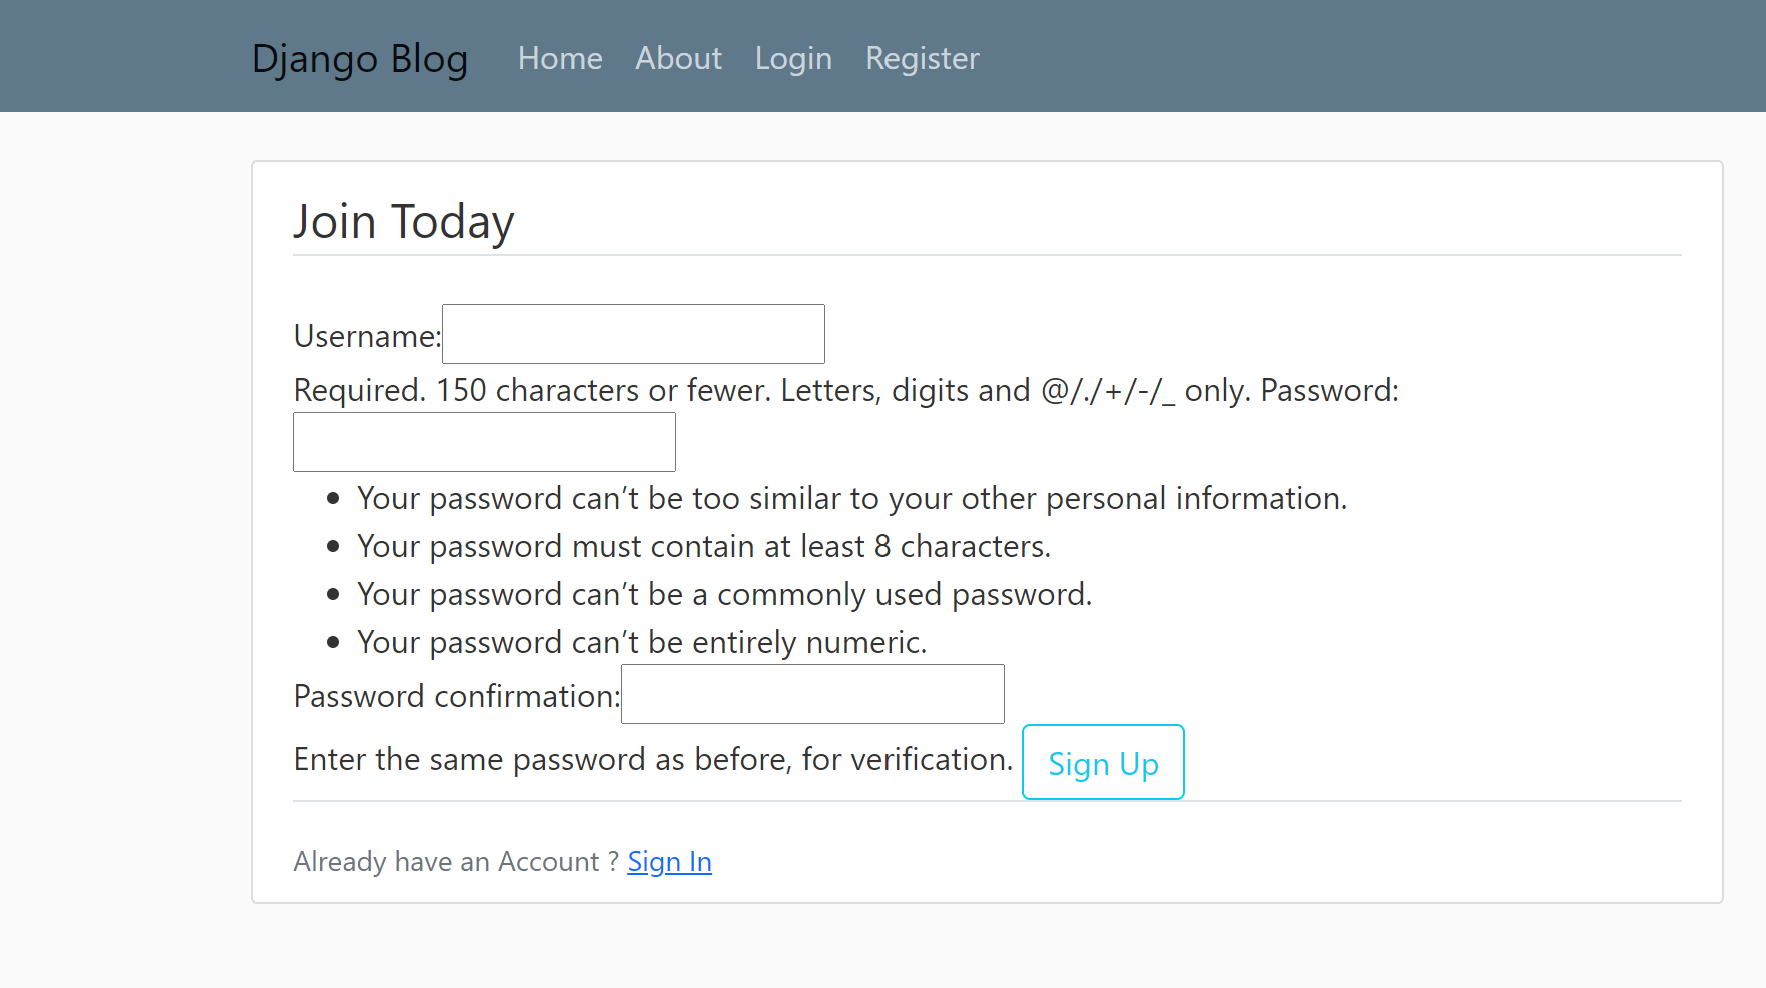

Le rendu n'est pas des plus jolie, nous modifierons ca plus tard. Nous pouvons juste faire en sorte de mieux aggencer rapidement nos différents champs de formulaire. Pour cela retour dans notre template ___register___, et appliquer la méthode ___as_p___ à notre instance ___form___.

Cela va avoir pour effet de rendre nos différents champs de formulaires en plusieurs paragraphes qui seront bien séparés.

Pour le moment, si nous remplissons les champs des formulaires et que nous soumettons les données, rien ne se passe. Et c'est normal, car vous envoyez une requête ___POST___ à la view function ___register()___, et elle ne fais que récupérer cette requête, et réaliser ce qu'il y a de déclarer, c'est à dire créer notre formulaire vide et rendre le template ___register.html___.

Nous allons déclarer quelques distinctions dans notre view function selon la requête qu'elle va recevoir. Nous pouvons distinguer 2 types de requêtes : les requêtes GET, qui servent à demander des données ou des informations, et les requêtes POST, qui servent à transmettre et modifier des données ou des informations.

Dans notre view function, mettons en place une structure conditionnelle simple : si le view function reçoit une requête de type POST, alors nous créons une instance de la classe ___UserCretionForm___ qui aura en argument les données transmises par la requête, que nous vérifierons avec la méthode ___is_valid()___.

Si la méthode renvoie ___True___ nous mettons la valeur du champ Username du formulaire dans une variable. Pour récupérer la valeur du champ, nous passons pas l'attribut ___cleaned_data___ qui est un dictionnaire contenant les valeurs des champs du formulaire exploitables avec Python (voir cleaned_data sur la documentation de DJANGO pour plus d'informations), et la méthode ___get___ avec le nom de la clé en argument pour avoir la valeur associé à la clé.

In [ ]:
# users/views.py

from django.shortcuts import render
from django.contrib.auth.forms import UserCreationForm


def register(request):
    
    # Create conditional structure according to the type of request
    # Get type of request with method attribute
    
    if request.method == 'POST':
        
        # If request is a Post request, create an instance with data in request
        
        form = UserCreationForm(request.POST)
        
        # Call is_valid() method to validate datas pass with post request
        
        if form.is_valid():
            
            # If is_valid return True, get username field value with cleaned_data dictionnary returned
            # Using get method to get value associate at the key
            
            username = form.cleaned_data.get('username')
    
    # If request is a Get request, generate blank form
    
    else:
        form = UserCreationForm()
        
    return render(request, 'users/register.html', {'form': form})

## Message d'information

Il est posssible d'afficher des petits messages pour informer l'utilisateur de la validation ou non des informations qu'il a transmis dans le formulaire. Encore une fois, DJANGO fournis un package ___messages___ dans ___django.contrib___, avec plusieurs types de messages, selon la nature du message que vous voulez transmettre :
- messages.debug
- messages.info
- messages.success
- messages.warning
- message.error

Nous allons faire appel à ce module bien pratique, qui se marie parfaitement avec l'utilisation de Bootstrap. Commençons par un message indiquant le succes de la transmission des informations via le formulaire. Nous utilisons donc ___messages.success___, puis nous lui passons en argument la requête, et le message que nous voulons afficher, dans notre exemple indiquer que l'utilisateur a bien été créé.

In [ ]:
# Import redirect method to redirect user in home page after submit the form

from django.shortcuts import render, redirect
from django.contrib.auth.forms import UserCreationForm

# Import messages package

from django.contrib import messages


def register(request):
    if request.method == 'POST':
        form = UserCreationForm(request.POST)
        if form.is_valid():
            username = form.cleaned_data.get('username')
            
            # Create messages with messages DJANGO package.
            # If the datas is validated, create a success message.
            
            messages.success(request, f"Account created for {username}")
            
            # Using redirect here, not render, with url pattern name of home view function with arg
            # Redirect user to the home page after the form is submitted
            
            return redirect('blog-home')
    else:
        form = UserCreationForm()
    return render(request, 'users/register.html', {'form': form})

Nous pouvons observer une nouvelle méthode fournis par DJANGO ci-dessus : ___redirect___, importer avec ___django.shortcuts___. Comme vous l'avez deviné je pense, cette méthode permet de rediriger l'utilisateur sur l'url pattern de la page dont le nom est passé en argument, dans notre cas la page d'accueil du blog.

Maintenant que notre message est instancié, nous allons faire en sorte que tous les messages créés avec ce module puissent apparaître dans n'importe quelle page du blog. Pour cela nous allons donc passer par notre template ___base.html___ qui est la base de toutes nos pages.

Ouvrir donc le template ___base.html___. Vu que nous voulons faire en sorte que les messages s'affichent sur toutes les pages, nous allons déclarer notre code avant le ___content block___ de notre template. Nous allons déclarer une structure conditionnelle en premier, qui vérifie si un message a été transmis par notre view function. Si c'est le cas nous faisons une boucle sur la liste de nos messages se trouvant dans la variable ___messages___.

C'est là que nous observons le mariage avec Boostrap, en effet nous pouvons faire en sorte de passer le ___tag___ (la nature) de notre message, à une classe de la balise ___div___ accueillant notre message, vu que Bootstrap utilise les mêmes titres que le module ___messages___ pour la nature des alertes.

Voici le bloc de code ajouté en haut de notre ___content block___.

In [ ]:
# blog/templates/blog/base.html

<main role="main" class="container">
        <div class="row">
          <div class="col-md-8">
        
            # Create a conditional structure, which verify if messages has send
        
            {% if messages %}
            
                # Iterate in messages list and create a div block
                # This div block take the message and his class take the same tag as the message tag
            
              {% for message in messages %}
                <div class="alert alert-{{ message.tags }}">
                  {{ message }}
                </div>
              {% endfor %}
            {% endif%}
            {% block content %}{% endblock %}
          </div>
          <div class="col-md-4">
            <div class="content-section">
              <h3>Our Sidebar</h3>
              <p class='text-muted'>You can put any information here you'd like.
                <ul class="list-group">
                  <li class="list-group-item list-group-item-light">Latest Posts</li>
                  <li class="list-group-item list-group-item-light">Announcements</li>
                  <li class="list-group-item list-group-item-light">Calendars</li>
                  <li class="list-group-item list-group-item-light">etc</li>
                </ul>
              </p>
            </div>
          </div>
        </div>
    </main>

Apres un test d'enregistrement d'un nouvel utilisateur, vous devriez avoir ce genre de message si tous se passe bien.

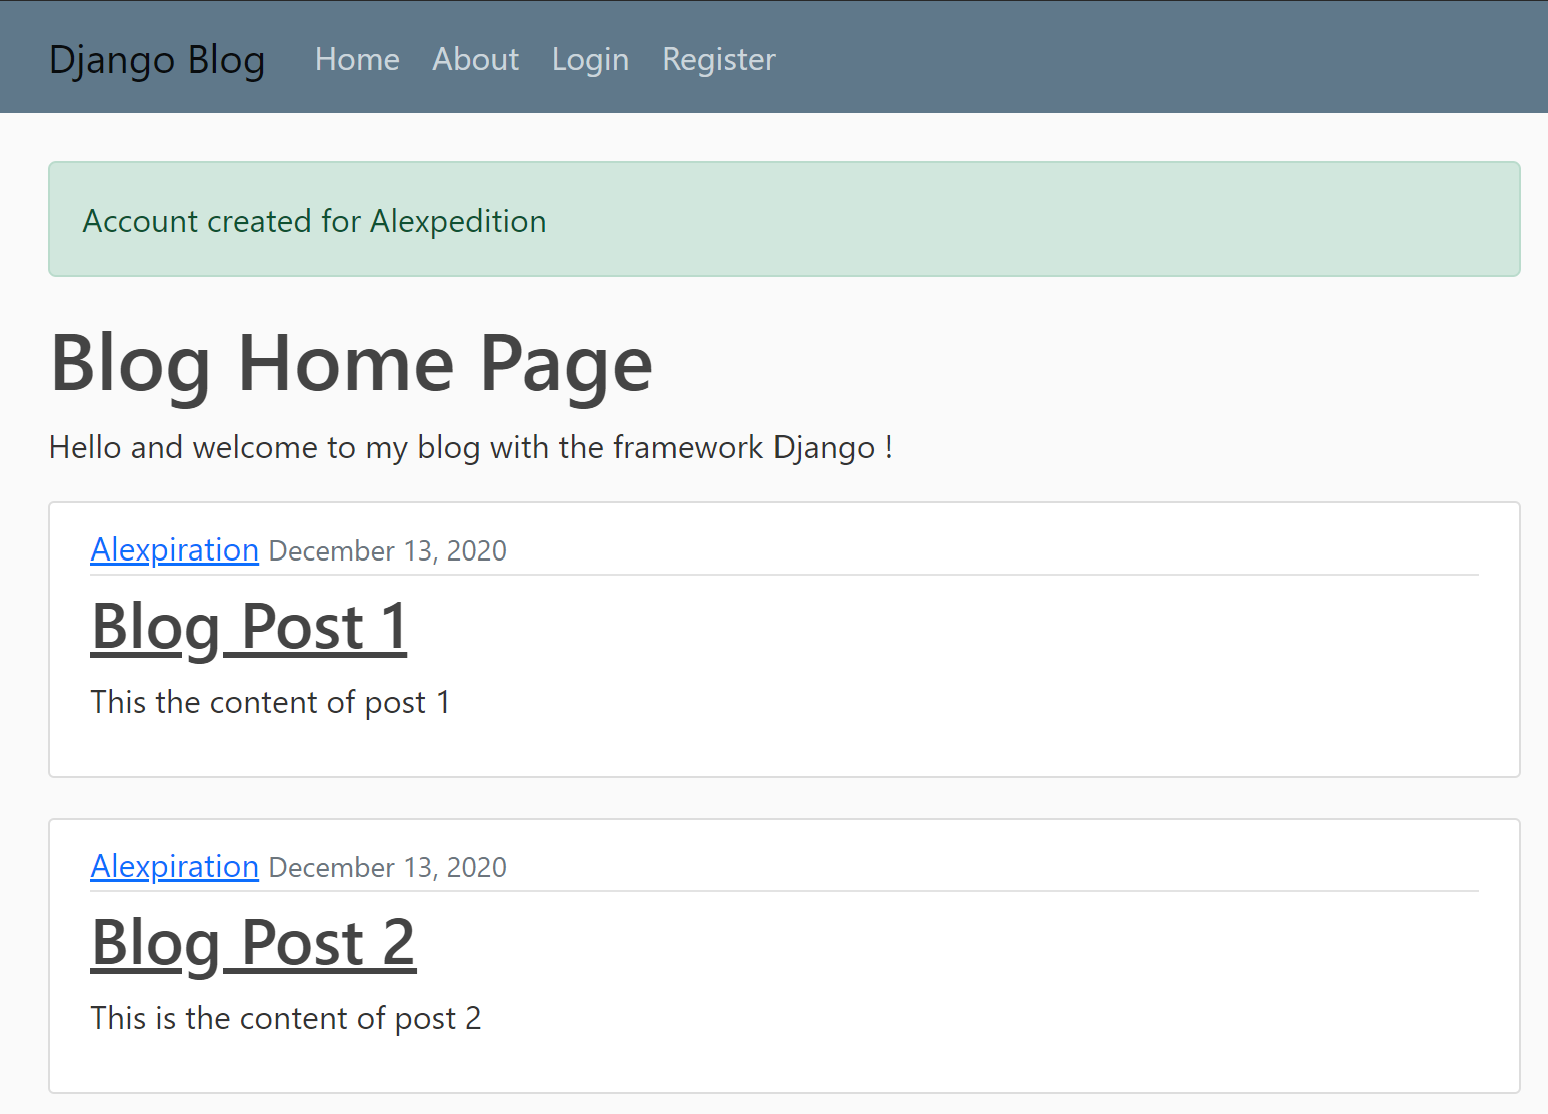

Vous pouvez également tester que le formulaire généré par DJANGO vérifie bien les différentes informations entrées dans les champs du formulaire (Nom d'utilisateur pas existant, mot de passe bien retapé etc...). Si elles sont invalides, la méthode ___is_valid()___ définis dans notre view function renvoie ___False___, le formulaire est renvoyé mais pas de messages de succès, ou de redirection.

Dernière chose de cette partie, nous avons bien un message de succès lorsque tout est bien remplis, mais l'enregistrement ne se fait pas réellement dans la base de donnée.

Pour réaliser cet enregistrement simplement il suffit d'utiliser la méthode ___save()___ sur notre instance de ___UserCreationForm___.

In [ ]:
# users/views.py 

from django.shortcuts import render, redirect
from django.contrib.auth.forms import UserCreationForm
from django.contrib import messages


def register(request):
    if request.method == 'POST':
        form = UserCreationForm(request.POST)
        if form.is_valid():
            
            # Save datas in request post in database with save method on UserCreationForm instance
            
            form.save()
            username = form.cleaned_data.get('username')
            messages.success(request, f"Account created for {username}")
            return redirect('blog-home')
    else:
        form = UserCreationForm()
    return render(request, 'users/register.html', {'form': form})

## Les champs de formulaire DJANGO

Nous avons vu la création d'un formulaire "préfabriqué" par DJANGO, mais si nous voulons d'autres champs dans ce formulaire ? Nous allons donc voir comment les ajouter.

Sachant que ce premier formulaire "préfabriqué" par DJANGO issue de la classe ___UserCreationForm___ est une bonne base, avec intégration de beaucoup de fonctionnalités, nous pouvons le faire hériter au prochain formulaire que nous allons créés. Première étape, créer un fichier ___forms.py___ dans le dossier racine de notre app ___users___, qui accueillera notre nouveau formulaire.

Dans ce fichier, importer notre ___Model class User___, le modèle sur lequel notre formulaire va agir, également ___UserCreationForm___, car comme je l'ai précisé en amont nous allons le faire hériter à notre nouveau formulaire, et le dernier nouveau module ___forms___ de ___django___ qui va contenir nos différentes classes et autres pour les champs que nous voulons ajouter.

Commencons donc par créer une nouvelle classe de formulaire, avec en héritage ___UserCreationForm___, et ajoutons un champs pour l'adresse mail de l'utilisateur.

In [ ]:
# Import forms to access at different forms fields giving by DJANGO
# Import User model to specify is the model which the form interact
# Import UserCreationForm to inherit it at the new form

from django import forms
from django.contrib.auth.models import User
from django.contrib.auth.forms import UserCreationForm

# Create new Form class that inherit UserCreationForm

class UserRegisterForm(UserCreationForm):
    
    # EmailField, the name is explicit
    # Each field given by DJANGO have a verification function according to the nature of field
    # DJANGO Documentation to know differents fields supplied
    
    email = forms.EmailField()

    # Meta Class is the "configuration" of the form
    # Indicate the model which interact the form
    # fields is the list of what field we want and the order
    
    class Meta:
        model = User
        fields = ['username', 'email', 'password1', 'password2']

Nous avons donc créer notre nouveau formulaire ___UserRegisterForm___, héritant de ___UserCreationForm___, et ayant un nouveau champs pour le mail de l'utilisateur, définis dans la variable ___email = forms.EmailField()___. Comme je l'ai précisé dans les commentaires, DJANGO fournis différents types de ___Field Class___ pour chaque type d'information que nous voulons recueillir dans notre formulaire.

Petite précision également sur la classe ___Meta___ dans notre classe de formulaire, cette classe permet de donner un espace nom imbriqué dans notre formulaire (nested namespace), mais lui donne également une configuration, à savoir les champs que nous désirons exploiter (___fields list___) et le modèle de données avec lequel nous intéragissons (___model___).

Nous pouvons à présent remplacer l'instance de formulaire dans notre view function ___register___ par une nouvelle instance de notre propre classe de formulaire.

In [ ]:
# users/views.py

from django.shortcuts import render, redirect
from django.contrib import messages

# Delete UserCreationForm import and replace it by own Form Class

from .forms import UserRegisterForm

def register(request):
    if request.method == 'POST':
        
        # Create an instance of the new form class
        
        form = UserRegisterForm(request.POST)
        if form.is_valid():
            form.save()
            username = form.cleaned_data.get('username')
            messages.success(request, f"Account created for {username}")
            return redirect('blog-home')
    else:
        form = UserRegisterForm()
    return render(request, 'users/register.html', {'form': form})

## Plugin DJANGO : Crispy-Forms

Maintenant que nous avons un formulaire bien parametrer, il est possible d'améliorer l'esthétique de celui-ci. En effet il n'a pas vraiment le mec rendu que notre blog globalement. Nous pouvons faire en sorte que les informations nécessaires au formulaire apparaissent en plus petit, et que lorsque des informations ne sont pas correctement remplis, afficher les alertes en couleur rouge par exemple.

Nous allons faire tous cela en utilisant une application fréquement utiliser avec DJANGO, qui est ___crispy-form___. DJANGO seul fournis quelques "classes" directement pour agir sur l'apparence d'un formulaire. Mais ces "classes" sont donc à déclarer dans les modèles de nos applications. Cela créer une sorte de confusion, c'est à dire déclarer de l'esthétique, du front-end, dans du back-end. Il est donc plus recommandé d'agir directement sur les templates représentant notre front-end.

C'est ce que nous allons faire avec crispy-form. En premier, aller sur la ligne de commande et installer la librairie en tapant ___python -m pip install django-crispy-forms___. Une fois le package installé, comme nos app, il faut indiquer à DJANGO que crispy-forms est installé. Aller dans le fichier ___settings.py___ du projet, et dans la liste ___INSTALLED_APPS___, rajouter après la déclaration de notre users app, ___'crispy_forms'___ (sans oublier la virgule après).

Un autre ajout à réaliser dans notre fichier ___settings.py___, c'est d'indiquer le style que nous voulons utiliser (le framework CSS) avec crispy-form. Pour cela, aller tout en bas du fichier, et ajouter ___CRISPY_TEMPLATE_PACK =___. Vous pouvez déclarer pas mal de framework CSS ici, se réferer à la documentation de crispy-form pour le savoir. Dans notre cas nous resterons sur Boostrap 4.

In [ ]:
# blog_base/settings.py

(...)

# Application definition

INSTALLED_APPS = [
    'users.apps.UsersConfig',
    'blog.apps.BlogConfig',
    
    # Add crispy-forms in installed apps
    
    'cripsy_forms',
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
]

(...)

# Add the css framework that we want with crispy-forms

CRISPY_TEMPLATE_PACK = 'bootstrap4'

Notre package cripsy-forms est bien identifié dans les app installées, retour dans notre template ___register.html___ pour l'appliquer. Et il n'y a rien de plus simple.

Dans un premier temps, il faut dire à notre template de "charger" notre app crispy-forms. Ajouter juste après notre bloc d'appel au template ___base.html___, entre ___{% load crispy_forms_tags %}___.

Dans la partie sur l'affichage des dates de nos posts, nous avions vu l'utilisation des filtres sur nos variables dans les templates avec la barre verticale "|". Il s'agit ici de réaliser la même chose avec notre variable contenant notre formulaire. Nous supprimons la méthode spécial ___as_p___ et à la place, nous appliquons le filtre ___|crispy___.

In [ ]:
{% extends 'blog/base.html'%}
{% load crispy_forms_tags %}
{% block content %}
    <div class="content-section">
        <form method="POST">
            {% csrf_token %}

            <!-- fieldset tag allow to group related elements in a form -->
            
            <fieldset class="form-group">
                <legend class="border-bottom mb-4">Join Today</legend>
                
                # Replace as_p special method by crispy filter
                
                {{ form|crispy }}
                <button class="btn btn-outline-info" info="submit">Sign Up</button>
            </fieldset>

        </form>
        <div class="border-top pt-3">
            <small class="text-muted">
                Already have an Account ? <a class="ml-2" href="#">Sign In</a>
            </small>
        </div>
    </div>

{% endblock content %}

Et la magie s'opère, vous pouvez retourner sur la page ___register___ et voir que les différentes classes Bootstrap s'appliquent automatiquement à nos balises de formulaire. Cela reprend également les mises en formes en rouge si jamais des informations ne sont pas correctes.

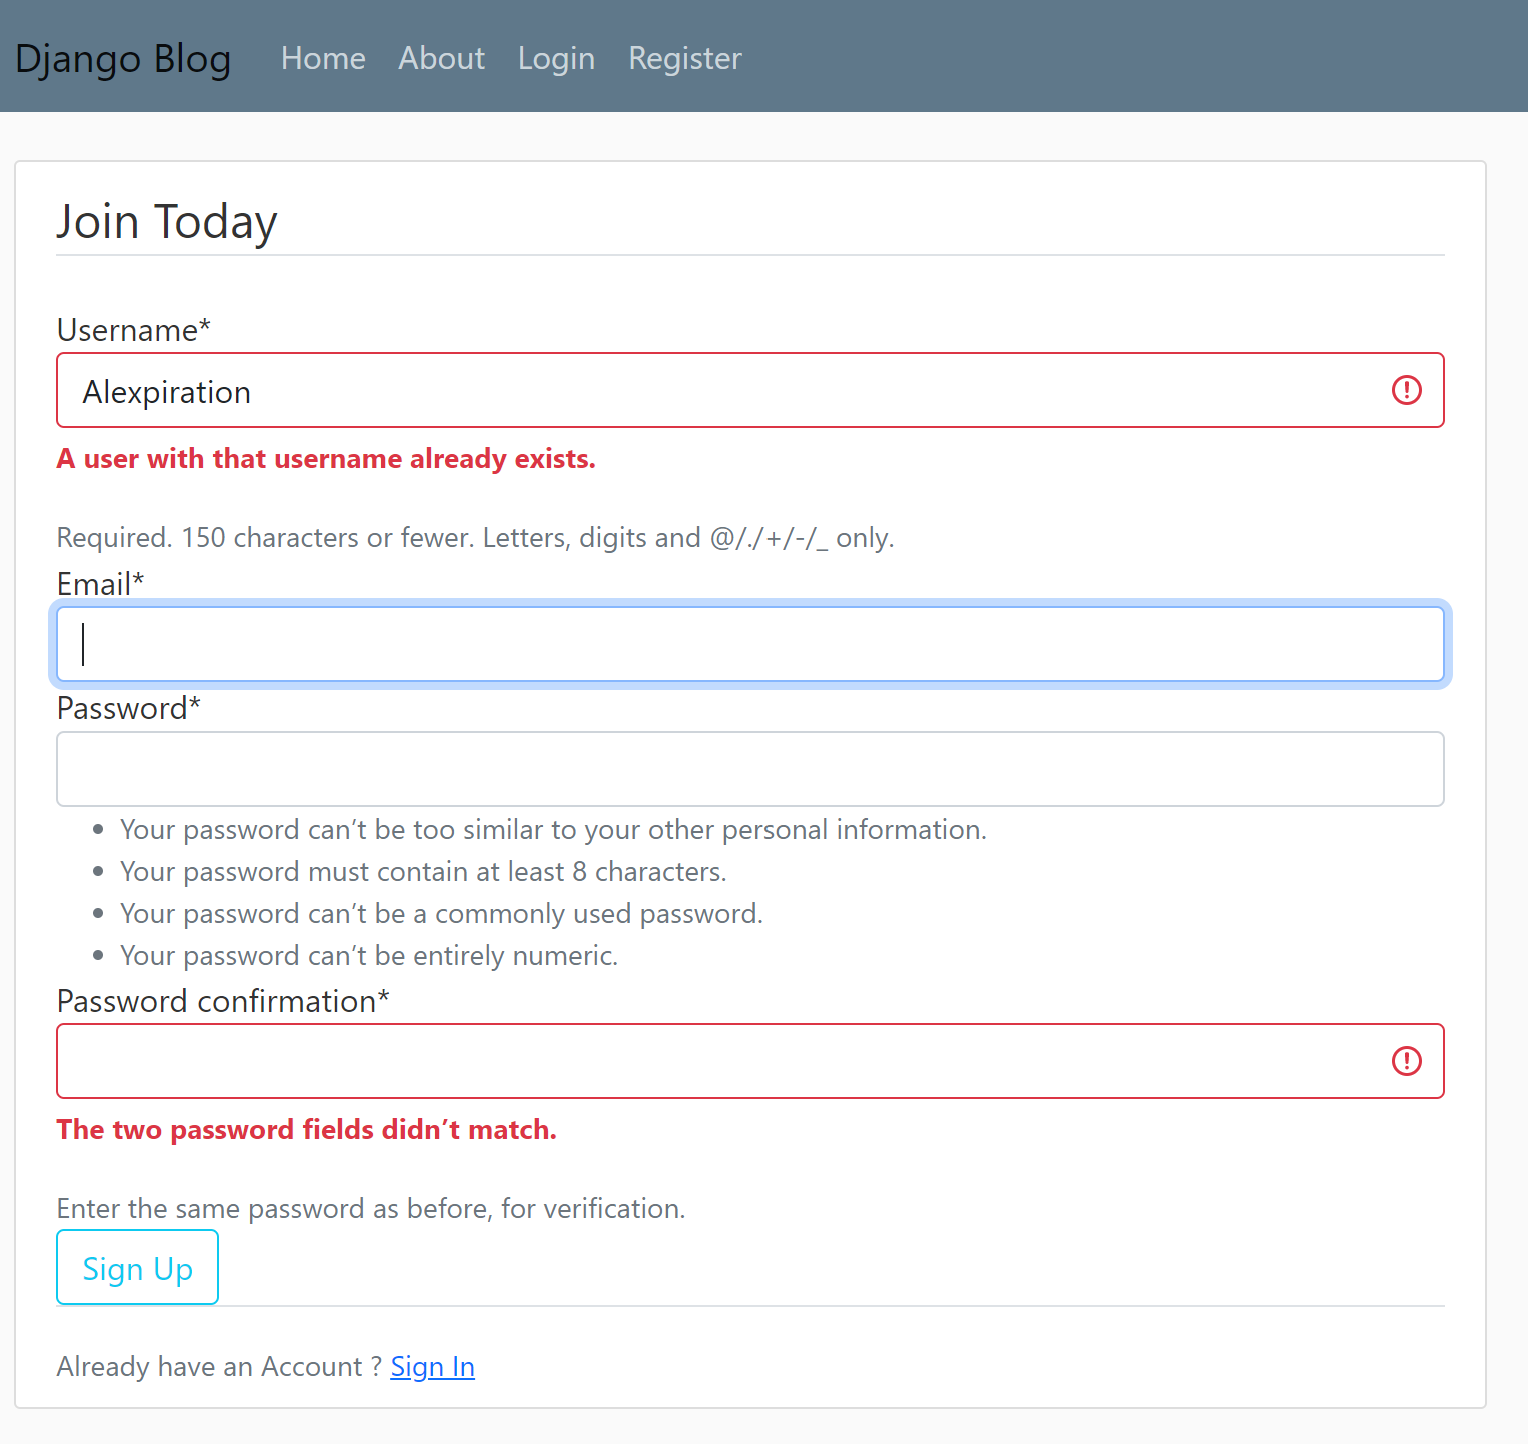

# Login et Logout System

## Login Page

Maintenant que nous pouvons enregistrer de nouveaux utilisateurs, il faut également pouvoir leur donner une page pour s'identifier. Nous allons voir ça tout de suite, et pour cela, encore une fois DJANGO fournis plusieurs outils pour la réaliser facilement.

Rendez-vous dans notre fichier d'url pattern du projet. Nous allons importer la vue fournis par DJANGO et lui assigner url pattern. Dans un premier temps, importer ___views___ du package ___django.contrib.auth___, et comme pour les view function de notre app ___users___, rajouter ___as auth_views___ pour qu'il n'y est pas de confusion dans l'import des différentes view functions.

Dans le package de view functions fournis par DJANGO que nous venons d'importer, se trouve les classes ___LoginView___ et ___LogoutView___ que nous allons utiliser, et leur appliquer la méthode ___as_view()___. Nous mettrons en path model ___login/___ pour la page de Login, et ___logout/___ pour la page Logout.

Si vous vous rendez à l'url que nous avons indiquer pour la page de Login, vous aurez une page d'erreur. DJANGO indique qu'il va chercher un template html dans ___registration/login.hmtml___, et effectivement il n'est pas existant. C'est le chemin associé par défaut à la ___LoginView___. Nous allons donc indiquer à DJANGO que ce n'est pas ce template qu'il faut aller chercher, mais celui que nous allons créer juste après, que nous mettrons dans l'app ___users___, à savoir ___users/login.html___.

Pour cela, nous allons passons à la méthode ___as_view()___, l'argument ___template_name='users/login.html'___. Et bien sur vous pouvez faire la même chose pour la ___LogoutView___ en lui passant en argument le prochain template de Logout que nous allons créer ___'users/logout.html'___ 

In [ ]:
# blog_base/urls.py

from django.contrib import admin

# Import View class given by DJANGO in django.contrib.auth package
# Don't forget as auth_views alias to not confuse with others views functions package

from django.contrib.auth import views as auth_views
from django.urls import path, include
from users import views as user_views

urlpatterns = [
    path('admin/', admin.site.urls),
    path('register/', user_views.register, name='register'),
    
    # Using LoginView and LogoutView class included in auth view, and use as_view method
    # Indicate at DJANGO the path where search other template that the default template
    # Don't forget to attribute a name for each url pattern
    
    path('login/', auth_views.LoginView.as_view(template_name='users/login.html'), name='login'),
    path('login/', auth_views.LogoutView.as_view(template_name='users/logout.html'), name='logout'),
    path('', include('blog.urls')),
]

Passons maintenant à la creation de nos nouveaux templates en commencant par celui de Login. Nous allons donc le créer dans les templates de l'app ___users___. Le template ici est assez similaire à celui que ___register.html___ puisque nous devons afficher un formulaire pour que l'utilisateur renseigne son nom d'utilisateur et son mot passe. Vous pouvez donc faire un copier coller du code de ___register.html___ sur ___login.html___ pour avoir une bonne base que nous allons modifier.

Au niveau des changements, cela va surtout se passer au niveau des textes de la page. Premier changement, vu que nous sommes sur la page de Login, mettre ___Log In___ dans la balise ___legend___ au lieu de ___Join Today___. Ensuite nous ne toucherons pas à notre balise de code générant notre formulaire avec le filtre de crispy-forms, puisque c'est ce que nous voulons. Autre changement de texte, à la place de demander si l'utilisateur a déjà un compte (sur la page de Login ce n'est pas très logique), nous pouvons lui demander plutôt s'il veut en créer un s'il n'en a pas. Faire ce changement dans la balise ___small___ et renvoyer l'utilisateur vers la page de creation d'utilisateur dans la balise ___a___.

Comme nous avons une page de creation d'utilisateur maintenant nous pouvons indiquer dans href de la balise de lien ___{% url 'register' %}___, ___url___ créant un chemin absolu vers l'url pattern qui a pour nom celui indiqué. Nous pouvons profiter ici également pour faire la même chose dans la balise de lien vers notre page de Login, dans le template ___register.html___. 

In [ ]:
# users/templates/users/login.html

# Principal changes in comparison to register template is different texts
# Add link to register page 

{% extends 'blog/base.html'%}
{% load crispy_forms_tags %}
{% block content %}
    <div class="content-section">
        <form method="POST">
            {% csrf_token %}

            <!-- fieldset tag allow to group related elements in a form -->
            
            <fieldset class="form-group">
                <legend class="border-bottom mb-4">Log In</legend>
                {{ form|crispy }}
                <button class="btn btn-outline-info" info="submit">Sign In</button>
            </fieldset>

        </form>
        <div class="border-top pt-3">
            <small class="text-muted">
            
                # {% url 'url pattern name' %} to create an absolute path with url pattern name indicated
            
                Need an account ? <a class="ml-2" href="{% url 'register' %}">Sign Up</a>
            </small>
        </div>
    </div>

{% endblock content %}

In [ ]:
# users/templates/users/register.html

{% extends 'blog/base.html'%}
{% load crispy_forms_tags %}
{% block content %}
    <div class="content-section">
        <form method="POST">
            {% csrf_token %}

            <!-- fieldset tag allow to group related elements in a form -->
            
            <fieldset class="form-group">
                <legend class="border-bottom mb-4">Join Today</legend>
                {{ form|crispy }}
                <button class="btn btn-outline-info" info="submit">Sign Up</button>
            </fieldset>

        </form>
        <div class="border-top pt-3">
            <small class="text-muted">
            
                # Add link to login page
            
                Already have an Account ? <a class="ml-2" href="{% url 'login' %}">Sign In</a>
            </small>
        </div>
    </div>

{% endblock content %}

Bien sur, notre formulaire de Login bénéficie des sécurités de DJANGO et de la mise en forme de crispy-forms en Bootstrap. Maintenant si nous soumettons le formulaire avec de bonnes informations d'authentification, une erreur sera générée par DJANGO. Encore une fois, celui-ci va chercher un template par dafaut lié à l'utilisation de ___LoginView___. Le template par défaut est ___accounts/profile/___ car DJANGO renvoie l'utilisateur sur sa page de profil après connexion.

Nous, nous allons plutôt faire en sorte que celui-ci soit redirigé sur la page d'accueil du blog. Tous va se passer dans le fichier ___settings.py___ du projet. En bas du fichier, nous allons ajouter une nouvelle constante et lui attribuer le nom de l'url pattern que nous souhaitons pour la redirection. Ajouter en fin de fichier ___LOGIN_REDIRECT_URL = 'blog-home'___. Maintenant en testant une nouvelle fois une connexion, nous sommes bien redirigés sur la page d'accueil du blog.

In [ ]:
# blog_base/settings.py

(...)

LOGIN_REDIRECT_URL = 'blog-home'

Il manque quelques information de retour (feedback messages) indiquant notre connexion, que nous allons ajouter un peu plus tard. Mais en vous rendant sur l'url ___admin___, vous constatez que vous êtes directement connectés à la gestion de l'administration du site !

## Logout

Occupons-nous à présent de la page de Logout, car pour le moment lorsque nous nous déconnectons, nous tombons sur la page de Logout de l'admin de DJANGO, et nous voulons la cacher à l'utilisateur. Donc, créer un template ___logout.html___, et dans celui-ci nous mettrons juste une information à l'utilisateur qu'il est bien déconnecter, et un lien ver la page de Login s'il veut se connecter de nouveau.

Autre changement à faire également, dans notre view function ___register___, maintenant que notre page de Login existe, nous pouvons proposer à l'utilisateur après la creation de son compte, qu'il essaye une connexion pour bien confirmer la creation de son compte. Nous allons donc modifier un peu le message pop up qui apparait et rediriger l'utilisateur sur la page de Login plutôt que sur la page d'accueil du site.

In [ ]:
# users/templates/users/logout.html

{% extends 'blog/base.html'%}
{% load crispy_forms_tags %}
{% block content %}
    
    <h2>You have been logged out</h2>

    <div class="border-top pt-3">
        <small class="text-muted">
            <a href="{% url 'login' %}">Log In Again</a>
        </small>
    </div>
    
{% endblock content %}

In [ ]:
# users/views.py

from django.shortcuts import render, redirect
from django.contrib import messages
from .forms import UserRegisterForm

def register(request):
    if request.method == 'POST':
        form = UserRegisterForm(request.POST)
        if form.is_valid():
            form.save()
            username = form.cleaned_data.get('username')
            
            # Inform user his account has been created and redirect to login page
            
            messages.success(request, f"Your account has been created ! You are now able to login")
            return redirect('login')
    else:
        form = UserRegisterForm()
    return render(request, 'users/register.html', {'form': form})

## Liens et barre de navigation

Comme je le disais précédemment, le fait que l'utilisateur est connecté n'est pas vraiment indiqué quelque part sur la page d'accueil du blog. Pour remédier à cela, nous pouvons faire en sorte d'afficher le lien de Logout si l'utilisateur est déjà connecté dans notre barre de navigation, sinon nous pouvons afficher les liens vers la page Register et Login. Rien de plus simple en appliquant une structure conditionnelle dans le template ___base.html___ qui contient notre navbar.

Vu que nous utilisons le système d'authentification fournis pas DJANGO, il est possible de vérifier facilement via la variable ___user___, si notre utilisateur est connecté. Nous appliquons la méthode ___is_authenticated___ à notre variable qui va renvoyer un booléen selon si l'utilisateur est connecté ou non.

In [ ]:
# blog/templates/blog/base.html

(...)

<header class="site-header">
    <nav class="navbar navbar-expand-md navbar-light bg-steel fixed-top">
      <div class="container">
        <a class="navbar-brand mr-4" href="{% url 'blog-home' %}">Django Blog</a>
        <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarToggle" aria-controls="navbarToggle" aria-expanded="false" aria-label="Toggle navigation">
        <span class="navbar-toggler-icon"></span>
        </button>
        <div class="collapse navbar-collapse" id="navbarToggle">
          <div class="navbar-nav mr-auto">
            <a class="nav-item nav-link" href="{% url 'blog-home' %}">Home</a>
            <a class="nav-item nav-link" href="{% url 'blog-about' %}">About</a>
          </div>
          <!-- Navbar Right Side -->
          <div class="navbar-nav">
        
            # Add conditional structure, if user is connected, display only logout link

            {% if user.is_authenticated %}
              <a class="nav-item nav-link" href="{% url 'logout' %}">Logout</a>
            {% else %}
            
            # If user is disconnected or haven't an account, display login and register link
            
              <a class="nav-item nav-link" href="{% url 'login' %}">Login</a>
              <a class="nav-item nav-link" href="{% url 'register' %}">Register</a>
            {% endif %}

          </div>
        </div>
      </div>
    </nav>
</header>


(...)

## Page de profil et restriction

Dernier point de cette partie assez important, le fait d'avoir accès ou non à une page. Beaucoup de site web font en sorte que vous ayez accès à certaines pages ou non selon si vous êtes inscrits/authentifiés sur le site. Nous allons voir comment faire cela avec la page de profil d'un utilisateur.

Commençons par le process classique : ajouter une view function ___profile___, ne retournant pour le moment que le template que nous lui associons ___profile.html___. Créer ensuite un template ___profile.html___, lui faire hériter de ___base.html___ et dans __block content___, dans une balise ___h1___, afficher le nom de l'utilisateur qui est authentifier en passant la variable ___user___ et son attribut ___username___.

En premier, pour ne donner accès à cette page qu'aux personnes authentifiées, nous pouvons ajouter le lien vers celle-ci dans notre structure conditionnelle gérant l'affichage des liens de la barre de navigation. Nous ajoutons donc une balise qui affichera le lien vers la page si l'utilisateur est connecté.

In [ ]:
# users/views.py

(...)

# simple view function return associate template

def profile(request):
    return render(request, 'users/profile.html')

In [ ]:
# users/templates/users/profile.html

{% extends 'blog/base.html'%}
{% load crispy_forms_tags %}
{% block content %}
    <div class="content-section">
    
        # Access to authenticate username with username attribute of user var
    
        {{ user.username }}
    </div>
{% endblock content %}

In [ ]:
# blog_base/urls.py

from django.contrib import admin
from django.contrib.auth import views as auth_views
from django.urls import path, include
from users import views as user_views

urlpatterns = [
    path('admin/', admin.site.urls),
    path('register/', user_views.register, name='register'),
    
    # Add profile url pattern
    
    path('profile/', user_views.profile, name='profile'),
    path('login/', auth_views.LoginView.as_view(template_name='users/login.html'), name='login'),
    path('logout/', auth_views.LogoutView.as_view(template_name='users/logout.html'), name='logout'),
    path('', include('blog.urls')),
]

In [ ]:
# blog/templates/blog/base.html

(...)

{% if user.is_authenticated %}

    # Display Profile link in navbar if user is authenticated

  <a class="nav-item nav-link" href="{% url 'profile' %}">Profile</a>
  <a class="nav-item nav-link" href="{% url 'logout' %}">Logout</a>
{% else %}
  <a class="nav-item nav-link" href="{% url 'login' %}">Login</a>
  <a class="nav-item nav-link" href="{% url 'register' %}">Register</a>
{% endif %}

(...)

Vous pouvez tester l'ajout de cette nouvelle page et l'apparition du lien vers celle-ci dans la barre de navigation, si vous êtes bien authentifier. Mais même en n'étant pas authentifier, si nous tapons manuellement le lien ___/profile___,  nous avons quand même accès à la page avec un affichage vide vu qu'aucun utilisateur n'est détecté donc aucun nom n'est affiché.

Pour faire en sorte que cette page ne soit vraiment accessible uniquement qu'aux utilisateurs connectés, nous allons encore une fois pouvoir utiliser une fonction, ou plutôt un décorateur fournis pas DJANGO. Si vous ne savez pas ce qu'est un décorateur, n'hésitez pas à vous renseigner sur ceci qui est très utile, mais pour faire court, il s'agit d'un modificateur de fonction. Dans notre cas il va modifier notre fonction, donc notre view function ___profile.html___, et faire en sorte que celle-ci ne retourne son template qu'à la condition d'être authentifier.

Pour appliquer ce décorateur, nous importons ___login_required___ dans notre fichier ___views.py___ de notre app ___user___ via le package ___django.contrib.auth.decorators___, puis il suffit d'ajouter juste avant la déclaration de notre view function un ___@login_required___.

In [ ]:
# users/views.py

# Import decorators included in DJANGO

from django.contrib.auth.decorators import login_required

# Apply this decorator on profile view function
# This view function renders the associate template only if users are connected

@login_required
def profile(request):
    return render(request, 'users/profile.html')

Le décorateur appliqué, si vous tentez d'ouvrir la page ___profile___, vous aurez une erreur ___Page not found___, car DJANGO redirige vers une page de login qui n'existe, une page configurée par défaut. Pour changer cette redirection, rendez-vous dans le fichier ___settings.py___, et en bas du fichier ajouter ___LOGIN_URL = 'login'___, ___login___ étant le url pattern name de notre page de Login.

In [ ]:
# blog_base/settings.py

(...)

# Add this line to say at DJANGO redirect user in our login page

LOGIN_URL = 'login'

Et voilà ! Votre site redirigera automatiquement un utilisateur sur la page de Login si celui-ci veut accéder à la page ___Profile___ s'il n'est pas connecté. Vous pouvez remarquer dans l'url généré lors de la redirection un paramètre ___?next=/profile___. DJANGO prend en mémoire la page précédente pour ensuite la refournir à l'utilisateur si celui-ci arrive à se connecter.

# User Profile and Picture

## Profile User Model

Vu que nous avons créer une nouvelle page pour le profil d'un utilisateur, nous allons donc l'agrémenter un peu et la relier à notre base de donnée. Pour cela, il nous faut un modèle pour intéragir avec la base de donnée, que nous allons créer dans le fichier ___models.py___ de notre app ___users___.

Dans ce modèle, nous allons réaliser une ___OnetoOne Relationship___, ce qui veut dire que pour chaque utilisateur, il n'y a qu'un profil associé, et qu'un profil n'est associé qu'à un seul utilisateur. Nous importons le modèle ___User___ de DJANGO comme pour notre app ___blog___, et créons donc un nouveau ___Model Class Profile___, qui hérite bien sur de models.Model.

Dans les ___Model Fields___ nous retrouvons ___OneToOneField___ avec en argument ___User___ pour créer la ___OnetoOne Relationship___ dont nous parlions en amont, et l'argument ___on_deleted=models.CASCADE___ pour indiquer que la suppression du profil ou de l'utilisateur entraine la suppression de l'autre.

Nous voyons également le ___ImageField___ pour donner à l'utilisateur la possibilité d'ajouter une photo à son profil. L'argument ___default___ permet d'indiquer une image à mettre par défaut si l'utilisateur n'en ajoute pas, et ___upload_to___ permet d'indiquer dans quel dossier le fichier d'image doit être chercher.

Nous surchargeons la méthode ___str___, bonne pratique pour tous nouvelle classe, afin de savoir plus facilement à quoi correspond l'instance de cette classe. La méthode retournera le nom d'utilisateur correspondant à l'instance.

In [ ]:
#users/models.py

from django.db import models

# Import User Model given by DJANGO

from django.contrib.auth.models import User

# New Model Class for each User Profile

class Profile(models.Model):
    
    # user represent field associate User Model and Profile Model
    # on_delete to specify if we delete user and/or profile if one deleted
    
    user = models.OneToOneField(User, on_delete=models.CASCADE)
    
    # ImageField to allow user upload picture for his profile.
    # default to upload default picture
    # upload_to to indicate the folder where pictures are
    
    image = models.ImageField(default='default.jpg', upload_to="profile_pics")

    
    
    
    def __str__(self):
        return f"{self.user.username} Profile"

Pour appliquer tous ces changements à la base de donnée, si vous vous en rappelez, nous devons effectuer une migration. Pour cela rendez-vous dans la ligne de commande pour taper ___python manage.py makemigrations___. DJANGO va vous lever une erreur, car pour pouvoir utiliser le champ de modèle ___ImageField___, la librairie ___Pillow___ est nécessaire, qui est donc une librairie de gestion d'image.

Après installation de la librairie, relancer la commande ___makemigrations___ qui devrait être exécuté avec succès. Et vous pouvez ensuite faire suivre la commande ___migrate___ pour appliquer les Database Statements.

Maintenant que nous avons enregistrés notre nouvelle table ___Profile___ liée à nos utilisateurs, ajoutons la gestion de cette table à l'interface d'administration du site. Il s'agit de la même procédure que lors de l'ajout de la table des articles. Nous ouvrons le fichier ___admin.py___ de notre app ___users___, et il faut ensuite importer notre ___Model class Profile___. Il ne reste plus qu'à passer celle-ci en argument à ___admin.site.register()___. Vous pouvez vérifier et tester d'ajouter un profil lié à un utilisateur via la page ___admin___

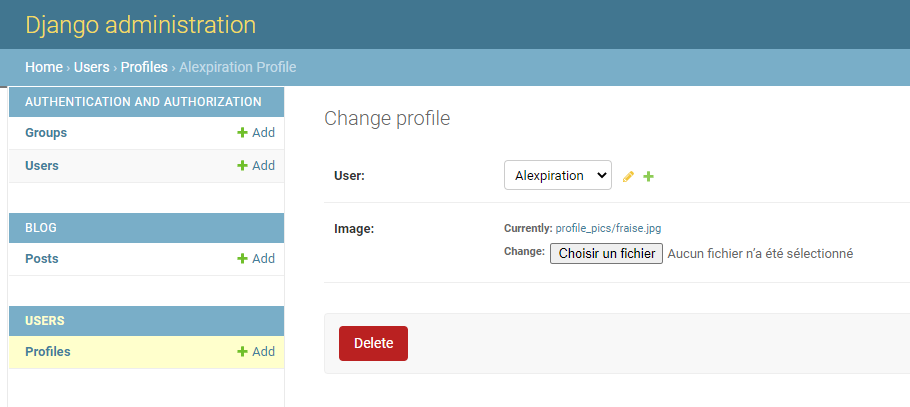

In [ ]:
# users/admin.py

from django.contrib import admin

# import Profile Model Class

from .models import Profile

# Add it to admin interface with admin.site.register method

admin.site.register(Profile)

Si vous créez et ajouter une photo au profil de l'utilisateur, vous verrez l'apparition d'un dossier ___profile_pics___, contenant le fichier image de la photo de profil choisie. C'est le nom du dossier que nous avons donner pour indiquer à DJANGO où le fichier doit être téléchargé.

Maintenant que nous avons ajouter des informations au profil de l'utilisateur, il serait intéressant d'y accéder sur notre site. Nous allons voir cela tout de suite via une console Python de DJANGO. Taper la commande ___python manage.py shell___ pour y accéder.

N'oubliez pas d'importer le modèle ___User___ en premier, puis pour rappel, pour avoir une instance représentant un utilisateur, utiliser la méthode ___.objects.filter(username=username).first()___ sur notre modèle de classe. Maintenant que nous avons un utilisateur, il suffit de taper ___user.profile___ qui nous retourneras l'instance de notre ___Profile Model Class___ qui lui est associé.

Nous pouvons donc aisement accéder à l'image de profil de l'utilisateur via l'attribut ___image___. Vous pouvez avoir la largeur de l'image du profil de l'utilisateur avec ___image.width___, le chemin où est stocker l'image avec ___image.url___. 

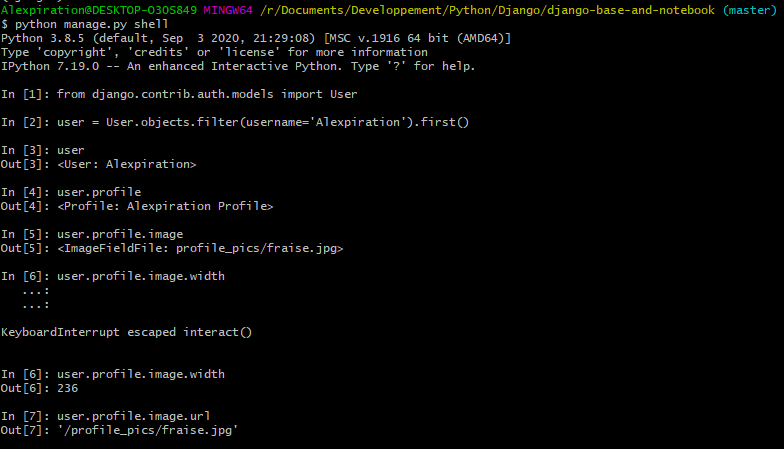

Nous avons vu les principales manipulations pour obtenir les informations du profil d'un utilisateur, voyons comment nous pouvons les intégrer dans les pages de notre blog. Mais avant, intéressons nous à l'endroit où sont stockés les images des profils utilisateur.

## MEDIA ROOT, MEDIA URL

Comme je vous le disais en amont, en enregistrant un nouveau profil avec une image pour l'utilisateur, un dossier s'est généré, celui dont nous avons précisé le nom pour le paramètre ___upload_to___ du ___model Field ImageField___ lors de la creation de notre modèle ___Profile___, ___profile_pics___. Ce dossier a été généré dans la racine du projet (avec les dossiers de nos apps, avec le dossier du projet global etc...)

Ce n'est pas forcément le meilleur endroit pour stocker les images de nos utilisateurs. Nous allons toucher à quelques paramètres pour personnaliser l'endroit où ce genre de fichier vont s'enregister. Pour cela, aller ans le fichier ___settings.py___, et nous allons y définir, juste après ___STATIC_URL___, les constantes ___MEDIA_ROOT___ et ___MEDIA_URL___.

### MEDIA_ROOT

___MEDIA_ROOT___ est le chemin absolu vers lequel DJANGO va télécharger les fichiers tel que les photos de nos utilisateurs. Nous allons faire en sorte que les fichiers se télécharge dans le dossier racine de notre projet toujours, mais dans un premier dossier ___media___ pour centraliser tous les fichiers. Pour définir ce chemin absolue, et pour définir des chemins en général, utiliser le module ___os___ et la methode ___path.join()___ pour que le chemin généré soit toujours adapté au système d'exploitation sur lequel le script est exécuté. Nous utilisons la constante ___BASE_DIR___ définis par DJANGO pour le dossier global du projet et nous ajoutons au chemin ___media___.

In [ ]:
# blog_base/settings.py

(...)

MEDIA_ROOT = os.path.join(BASE_DIR, 'media')

Avec cette configuration, les prochaines images de nos utilisateurs seront donc stockées dans le chemin ___media/profile_pics___.

### MEDIA_URL

___MEDIA_URL___ est le chemin public dans lequel les fichiers téléchargés se trouveront. C'est à dire qu'il s'agit du chemin auquel le navigateur web aura accès pour télécharger les images ou autres fichiers sur la page. Nous allons donc indiquer le dossier que nous avons configurés dans ___MEDIA_ROOT___, donc ___/media/___

In [ ]:
# blog_base/settings.py

(...)

MEDIA_ROOT = os.path.join(BASE_DIR, 'media')
MEDIA_URL = '/media/'

Notre configuration mise en place, vérifions son bon fonctionnement. Supprimer le profil d'utilisateur que vous avez créés précedement, et refaire le même avec une image de profil. Vous verrez bien apparaitre un nouveau dossier ___media___, dans lequel se trouve un sous-dossier ___profile_pics___ contenant les images de profil de nos utilisateurs, accessibles pour le navigateur. A la suite de cela, vous pouvez donc supprimer le premier dossier ___profile_pics___ qui s'était généré.

## Ajout sur le templates profile.html

Repassons sur notre template ___profile.html___. Nous allons ajouter ce qu'il faut pour afficher le nom de l'utilisateur, sa photo, son adresse e-mail, et plus tard, un espace dédié pour qu'il puisse changer ses informations s'i le souhaite. Pour la mise en forme globale, la personne présentant le tutoriel suivis fournis un code de mise en forme de la page que nous allons appliquer. Ce code est disponible dans le dossier ___snippet_code___, et il s'agit du fichier ___template.html___

In [ ]:
# users/templates/users/profile.html

{% extends 'blog/base.html'%}
{% load crispy_forms_tags %}
{% block content %}
    <div class="content-section">
        <div class="media">
            <img class="rounded-circle account-img" src="userimage.jpg">
            <div class="media-body">
            <h2 class="account-heading">Username</h2>
            <p class="text-secondary">username@email.com</p>
            </div>
        </div>
        <!-- FORM HERE -->
    </div>
{% endblock content %}

Dans le snippet code fournis, nous pouvons voir que les balises qui affichent le username et l'email sont remplis avec des textes. Nous allons donc les remplacer pour que ces champs s'adaptent selon l'utilisateur, en remplacant Username par ___{{ user.username }}___ et username@email.com par ___{{ user.email }}___.

Maintenant la dernière chose que nous devons remplacer est le chemin vers l'image de profil de l'utilisateur. Si vous vous souvenez des exemples dans la console Python de DJANGO, pour avoir accès au chemin de l'image de profil, il suffit de taper ___user.profile.image.url___. C'est donc ce que nous allons entrer dans l'argument ___src___ de la balise d'affichage de l'image de profil.

In [ ]:
# users/templates/users/profile.html

{% extends 'blog/base.html'%}
{% load crispy_forms_tags %}
{% block content %}
    <div class="content-section">
        <div class="media">
        
            # Add absolute path of profile image with user.profile.image.url
        
            <img class="rounded-circle account-img" src="{{ user.profile.image.url }}">
            <div class="media-body">
            
            # Change username and e-mail displayed according to user connected
            
            <h2 class="account-heading">{{ user.username }}</h2>
            <p class="text-secondary">{{ user.email }}</p>
            </div>
        </div>
        <!-- FORM HERE -->
    </div>
{% endblock content %}

Pour que notre indication du chemin de l'image de profil fonctionne correctement, nous devons ajouter le ___media root___ que nous avons configurés dans nos url patterns. Cet ajout se fait de différence façon selon si nous sommes en developpement ou en production. Pour la configuration en développement, suivons la documentation de DJANGO :

# Serving files uploaded by a user during development

During development, you can serve user-uploaded media files from MEDIA_ROOT using the django.views.static.serve() view.

This is not suitable for production use! For some common deployment strategies, see Deploying static files.

For example, if your MEDIA_URL is defined as /media/, you can do this by adding the following snippet to your urls.py:

In [ ]:
from django.conf import settings
from django.conf.urls.static import static

urlpatterns = [
    # ... the rest of your URLconf goes here ...
] + static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)

Comme nous avons suivis le modèle de l'exemple de DJANGO, à savoir que notre ___MEDIA_URL___ est ___/media/___, nous pouvons simplement faire un copier coller de ce code, en prenant les import de package réalisés, et l'ajout après nos url patterns de la ligne ___+ static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)___ dans le fichier ___urls.py___ du projet global.

Lien vers la documentation de DJANGO sur ce sujet : https://docs.djangoproject.com/en/3.1/howto/static-files/

Une petite différence que nous mettons en place, est l'ajout d'une structure conditionnelle. Si nous sommes en mode ___DEBUG___, donc en mode de développement, nous ajoutons cette fameuse ligne pour configurer nos static files.

In [ ]:
# blog_base/urls.py

from django.contrib import admin
from django.contrib.auth import views as auth_views

# Add import suggest by DJANGO documentation, and the static settings after urlpatterns list

from django.conf import settings
from django.conf.urls.static import static
from django.urls import path, include
from users import views as user_views

urlpatterns = [
    path('admin/', admin.site.urls),
    path('register/', user_views.register, name='register'),
    path('profile/', user_views.profile, name='profile'),
    path('login/', auth_views.LoginView.as_view(template_name='users/login.html'), name='login'),
    path('logout/', auth_views.LogoutView.as_view(template_name='users/logout.html'), name='logout'),
    path('', include('blog.urls')),
]

if settings.DEBUG:
    urlpatterns += static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)

Le fait d'ajouter cette nuance rend le code plus lisible pour d'autres personnes.

Maintenant vous pouvez vous rendre sur la page de profil d'un utilisateur et constater le résultat, plutôt sympa non ?

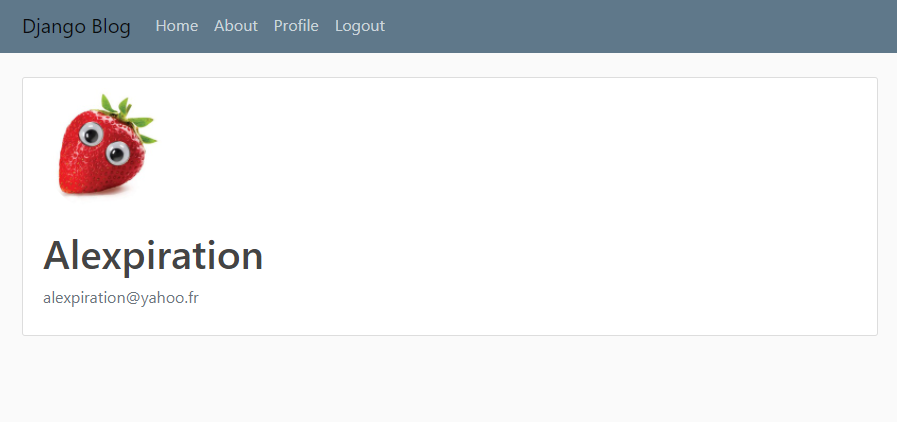

Une dernière chose que nous n'avons pas ajouter au sujet des images de profil, c'est l'image par défaut d'un utilisateur. Si vous créez un profil d'utilisateur sans image, le navigateur affichera le symbole de l'image brisée indiquant qu'il ne la trouve pas. En effet il cherche l'image ___default.jpg___ que nous avons définis dans ___l'ImageField___, et il va la chercher dans notre dossier ___media___.

Pour y remédier, mettre l'image de votre choix dans le dossier ___media___ et la nommer ___default.jpg___.

## Un utilisateur, Un profil

Dernière chose que nous allons voir dans cette partie, qui est assez importante, lors de la creation d'un utilisateur, vous avez constater qu'un profil n'est pas automatiquement créer. Pour les exemples précédent nous avons dues créer le profile via l'interface d'administration. Nous allons changer cela.

Cette partie est un peu difficile à assimiler, mais n'hésitez pas à vous référer à la documentation DJANGO si certaines choses sont trop flous. Pour faire en sorte qu'un profil soit créer en même temps que nous créons un nouvel utilisateur, nous allons utiliser ce que nous appelons un signal DJANGO. Ce signal, ___post_save___, contenu dans le package ___django.db.models.signals___, va être envoyé au moment où un nouvel objet est créé dans la Database, dans notre cas une nouvelle instance du ___User Model class___.

Dès que le signal est reçu, cela créer et enregistre un nouvel objet, pour notre exemple un nouvel objet de notre ___Profile Model class___. Nous allons définir tous cela dans un fichier ___signals.py___ dédié, dans notre app ___users___. Dans les imports à réaliser, importer le signal DJANGO ___post_save___, également le décorateur ___receiver___ du package ___django.dispatch___ qui va donc faire en sorte que la méthode que nous allons créer reçoit le signal et sache également de quel modèle le signal viens.

Bien sûr nous importons également 2 ___Model class User et Profile___. Créer donc une nouvelle fonction qui va prendre en argument notre ___sender___, ___instance___ qui est l'instance du ___sender___, ___created___ un booléen envoyé encore par le ___sender___ valant ___True___ si une nouvel instance est créée, et ___**kwargs___ pour tous arguments facultatifs. Nous décorons cette fonction avec ___@receiver___ pour que celle-ci soit la receveuse du signal ___post_save___ en argument, et préciser également le sender, ici ___User___.

Dans la fonction, si le signal envoyé par notre sender renvoie ___created = True___, nous créons une nouvelle instance du ___Model class Profile___, qui a pour utilisateur l'instance du nouvel utilisateur créé.

In [ ]:
# users/signals.py

# Import DJANGO signal post_save activated when a new object is created

from django.db.models.signals import post_save

# Import receiver decorator to transform function to a receiver of the post_save DJANGO signal

from django.dispatch import receiver

# Import User Model class which is the sender of signal, and Profile Model class which create new oject with User instance

from django.contrib.auth.models import User
from .models import Profile


# Decorate function with receiver decorator, args are the signal received and the sender of the signal

@receiver(post_save, sender=User)
def create_profile(sender, instance, created, **kwargs):
    
    # Created is true if a new object of the sender Model class is created
    # Get the instance of the signal sender, and pass it to user param for the new instance of Profile Model class
    
    if created:
        Profile.objects.create(user=instance)

Notre fonction de creation de profil est prête, pour bien relier nos utilisateurs avec leur profils, faire une fonction similaire mais qui cette fois ci sauvegarde le profil si l'utilisateur est sauvegardé également. Nous n'avons pas besoin de vérifier si ___created___ est ___True___ puisque nous voulons juste sauvegarder l'objet ___Profile___.

In [ ]:
# users/signals.py

@receiver(post_save, sender=User)
def save_profile(sender, instance, **kwargs):
    instance.profile.save()

Dernière étape pour que tous fonctionne bien, nous devons importer ce fichier ___signals.py___ dans la configuration de notre app ___users___. Pour cela rendez vous dans le fichier ___apps.py___, et créer une nouvelle fonction ___ready(self)___ dans la classe ___UserConfig___ qui importe notre fichier. Cette méthode, contenue dans ___AppConfig___, permet d'effectuer des taches d'initialisations, comme importer notre signal.

Référence aux fonctions dans ___AppConfig___ :https://docs.djangoproject.com/fr/3.1/ref/applications/

In [ ]:
# users/apps.py

from django.apps import AppConfig


class UsersConfig(AppConfig):
    name = 'users'

    def ready(self):
        import users.signals

Maintenant si vous essayez de créer un nouvel utilisateur, un nouveau profil lui sera attribuer automatiquement !

# Modifier le profil utilisateur

## Nouveaux formulaires

Dans cette partie, nous allons donner la possibilité à l'utilisateur de modifier les informations de son profil, à savoir, son nom d'utilisateur, son adresse e-mail, et sa photo de profil. Pour cela, nous allons mettre de nouveaux formulaires en place. Pour cela rendez-vous dans notre fichier ___forms.py___ de l'app ___users___. Qui dit nouveau formulaire, dis nouvelle classe de formulaire dans notre fichier, et celle-ci héritera de la classe ___forms.ModelForm___.

Le premier formulaire de mise à jour des informations de l'utilisateur est assez similaire à celui que nous avons mis en place pour enregistrer un nouvel utilisateur. La différence est que notre classe intéragis avec les champs ___username___ et ___email___ uniquement. Ce premier formulaire intéragis donc avec notre ___User Model class___, et nous spécifions tous ceci dans une classe ___Meta___, mais il manque la modification de la photo de profil dans ce formulaire ___UserUpdateForm.

Il faut créer un autre formulaire qui intéragira cette fois-ci avec notre ___Profile Model class___, qui contient le champs dédié à la photo de profil. Importer notre modèle ___Profile___ du fichier ___models___, et créer une nouvelle classe de formulaire ___ProfileUpdateForm___ qui hérite de ___forms.ModelForm___. Nous spécifions dans la classe ___Meta___ toutes ces informations.

In [ ]:
# users/forms.py

# New form which interact with User model class

class UserUpdateForm(forms.ModelForm):
    email = forms.EmailField()

    class Meta:
        model = User
        fields = ['username', 'email']


# New form which interact with Profile model class
# Allow user to edit his picture profile

class ProfileUpdateForm(forms.ModelForm):

    class Meta:
        model = Profile
        fields = ['image']

## Passage des formulaires à la view function

Nos 2 formulaires sont prêt, voyons comment les appliquer dans notre template ___profile.html___, et cela passe en amont par la modification de notre view function ___profile___ liée à ce template. Aller dans le fichier ___users/views.py___, et importer les 2 nouveaux formulaires (___UserUpdateForm et ProfileUpdateForm___ dans ___.models___). Nous allons déclarer une instance pour les 2 formulaires, ___u_form___ et ___p_form___. Si vous vous souvenez, pour passer plusieurs variables à notre template via notre view function, nous devons créer un dictionnaire et passer à ___render___ un dictionnaire ___context___, qui aura comme pair clé/valeur le nom de la variable accessible dans notre template, et sa valeur.

Dans notre cas nous créons donc 2 clés dans ___context___, une pour passer notre formulaire ___u_form___ et une pour ___p_form___.

In [ ]:
# users/views.py

# Import new Form Class

from .models import UserUpdateForm, ProfileUpdateForm

@login_required
def profile(request):
    
    # Create instance of each form to pass it in context dict
    
    u_form = UserUpdateForm()
    p_form = ProfileUpdateForm()
    
    context = {
        'u_form': u_form,
        'p_form': p_form
    }
    
    # Pass context dict at render function to access at u_form and p_form instance in profile.html template
    
    return render(request, 'users/profile.html', context)

## Intégration des formulaires

Aller dans notre template ___profile.html___. Si vous avez pris les snippets codes fournis pas le tutoriel suivis ici, vous pouvez remarquer qu'un espace ___<-- FORM HERE -->___ est dédié. Nous allons copier le contenu de la balise ___form___ dans notre template ___register.html___ comme base et faire quelques modifications. En premier lieu nous pouvons déjà intégrer nos 2 nouveaux formulaires à la place de celui d'enregistrement d'un utilisateur, donc dans un code block ___{{ u_form|cripsy}}___, puis en dessous ___{{ p_form|crispy }}___.

N'oubliez pas la mise en forme avec le filtre ___|crispy___, et de vérifier que crispy-forms est bien charger au début de votre template avec ___{% load crispy_forms_tags %}___. Bien sur nous pouvons également changer les textes qui apparaissent dans notre formulaire, à savoir changer ___Join Today___ en ___Profile Infos___, et de nommer le bouton de soumission de formulaire ___Update___ au lieu de ___Sign Up___.

Une dernière chose à ajouter dans la balise ___form___ du template, est le paramètre ___enctype="multipart/form-data"___ qui est un paramètre d'encodage, permettant de passer l'image traitée dans ce formulaire correctement à notre ___Profil model class___.

In [ ]:
# 

{% extends 'blog/base.html'%}
{% load crispy_forms_tags %}
{% block content %}
    <div class="content-section">
        <div class="media">
            <img class="rounded-circle account-img" src="{{ user.profile.image.url }}">
            <div class="media-body">
            <h2 class="account-heading">{{ user.username }}</h2>
            <p class="text-secondary">{{ user.email }}</p>
            </div>
        </div>
        <form method="POST" enctype="multipart/form-data">
            {% csrf_token %}

            <!-- fieldset tag allow to group related elements in a form -->
            
            <fieldset class="form-group">
                <legend class="border-bottom mb-4">Profile Infos</legend>
                {{ u_form|crispy }}
                {{ p_form|crispy }}
                <button class="btn btn-outline-info mt-2 mb-2" info="submit">Update</button>
            </fieldset>

        </form>
    </div>
{% endblock content %}

Démarrer le serveur de développement et vérifier la bonne intégration de nos formulaires

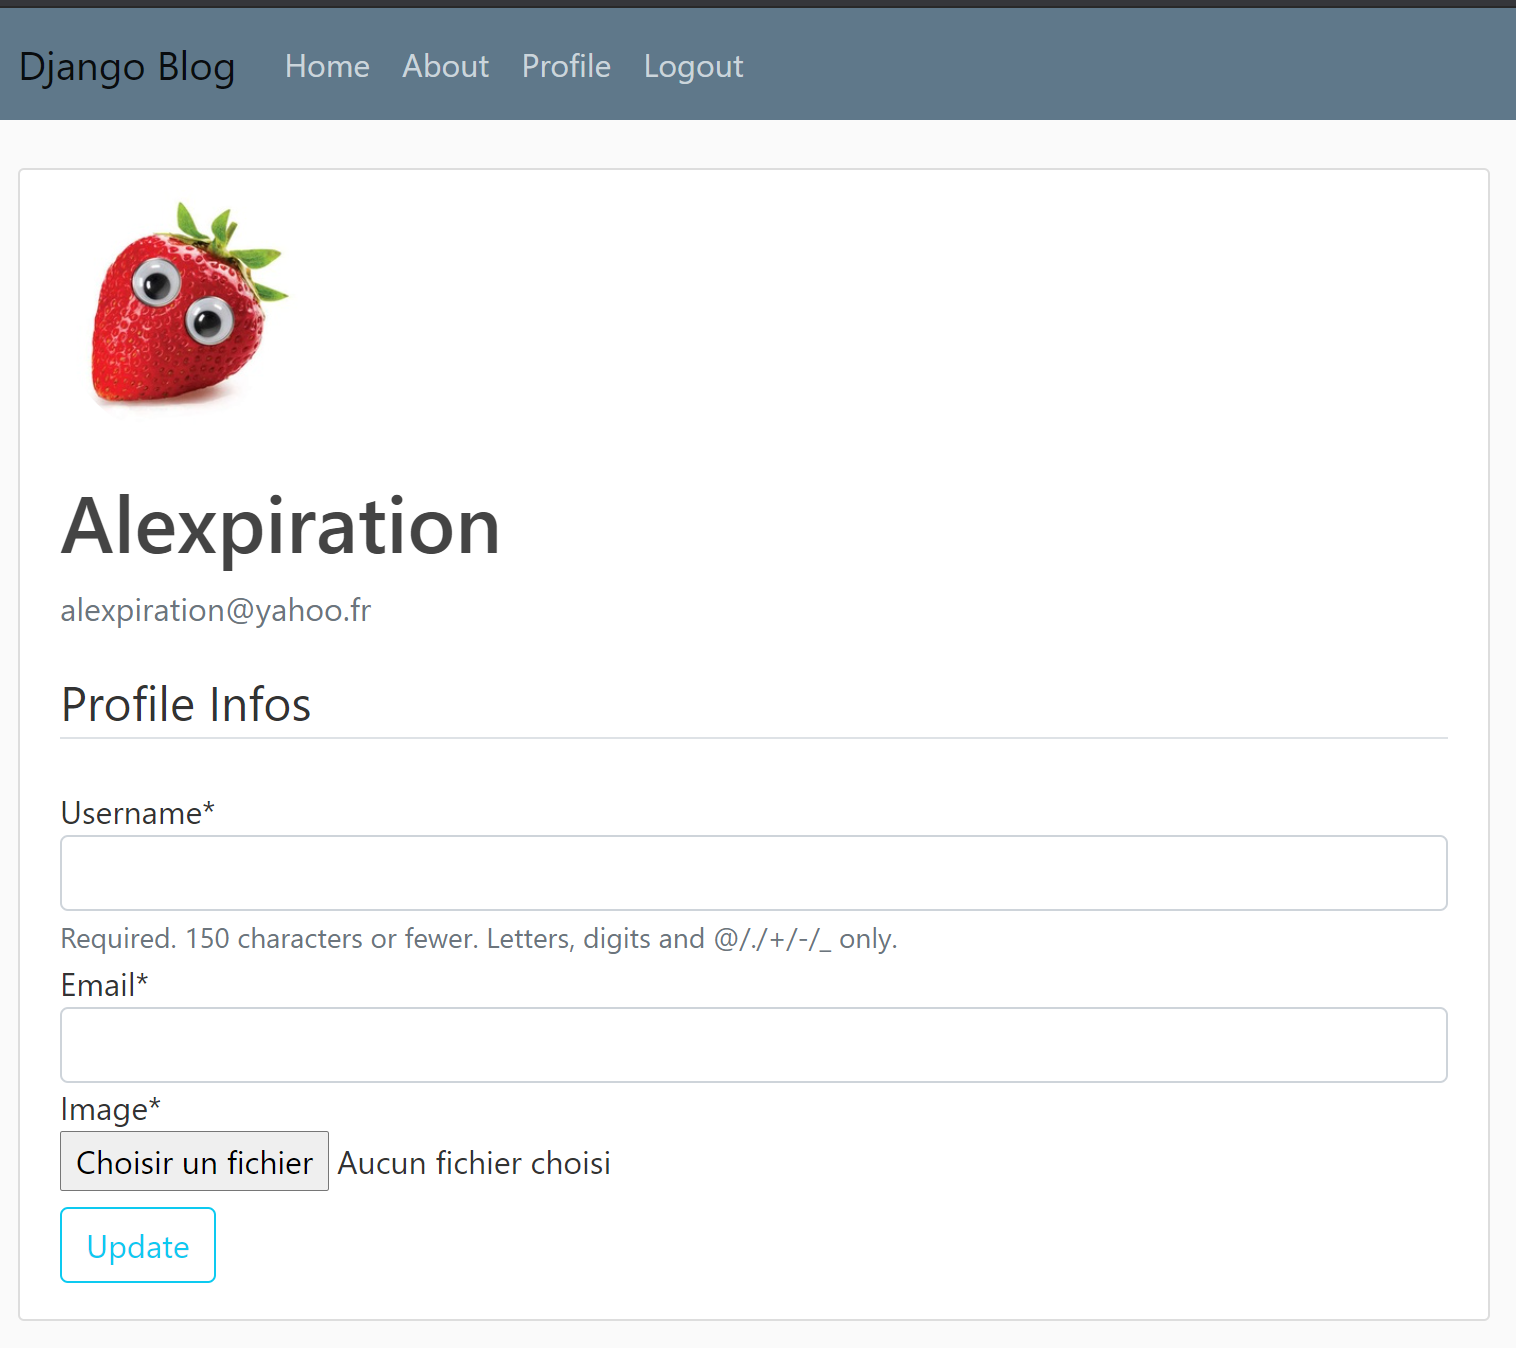

## Traitement des données dans les formulaires

Pour le moment, si nous soumettons les informations de ce formulaire, rien ne se passe, la page de profil est de nouveau affiché et c'est tous ce que réalise notre formulaire

Retour dans notre view function ___profile___, si nous voulons que l'utilisateur puisse modifier ses informations, remplissons le formulaire en premier des informations actuelles. Si vous vous souvenez, nos différentes classes de formulaire travaillent chacun avec les objets de certains modèles de classe que nous avons définis.

Chaque instance de nos formulaires attend un objet de la classe spécifiée, pour notre ___u_form___ c'est une instance du ___User Model class___, et pour ___p_form___ une instance du ___Profile Model class___. Pour pré-remplir nos champs, nous pouvons indiquer un argument ___instance___ et passer du coup une instance du modèle que le formulaire attend. Pour ___u_form___, nous passons ___request.user___, et pour ___p_form___ nous passons ___request.user.profile___.

In [ ]:
# users/views.py

@login_required
def profile(request):
    
    # Populate fields of each form pass instance of User and Profile model
    
    u_form = UserUpdateForm(instance=request.user)
    p_form = ProfileUpdateForm(instance=request.user.profile)

    context = {
        'u_form': u_form,
        'p_form': p_form
    }

    return render(request, 'users/profile.html', context)

Les champs sont maintenant pré-remplis par les infos existantes de l'utilisateur, occupons de nous de la mise à jour. Nous allons utiliser le même process que dans notre view function ___register___, c'est à dire vérifier que la requête récupérer par notre view function est une requête de type ___POST___. Si c'est le cas alors nous allons traiter les données contenues dans celle-ci et les valider avec la méthode ___is_valid().

Nous passons donc notre requête ___POST___ en argument à l'instance de notre formulaire, en plus de l'instance du ___User Model___, et pour le ___p_form___, nous passons également ___request.FILES___ pour récupérer la nouvelle image fournie par l'utilisateur. Et donc si toutes ces données sont validés par la méthode ___is_valid()___, nous sauvegardons celle-ci dans la database, créons un message d'informations de succès, et redirigeons l'utilisateur sur la même page avec les nouvelles informations.

In [ ]:
# users/views.py

@login_required
def profile(request):
    
    # Conditional structure check if request is a Post Request
    
    if request.method == 'POST':
        
        # Pass data in request.POST at form instance, keep User and Profile model instance
        # For ProfileUpdateForm, get new image uploaded in request.FILES
        
        u_form = UserUpdateForm(request.POST, instance=request.user)
        p_form = ProfileUpdateForm(request.POST, request.FILES, instance=request.user.profile)
        
        # Check data with is_valid() DJANGO method 
        
        if u_form.is_valid() and p_form.is_valid():
            
            # Save new data in each Model Class
            
            u_form.save()
            p_form.save()
            
            # generate succes message for user feedback
            
            messages.success(request, f"Your account has been updated")
            
            # Redirect user in his profile page
            
            return redirect('profile')
    
    # GET request display form with profile informations
    
    else:
        u_form = UserUpdateForm(instance=request.user)
        p_form = ProfileUpdateForm(instance=request.user.profile)

    context = {
        'u_form': u_form,
        'p_form': p_form
    }

    return render(request, 'users/profile.html', context)

N'hésitez pas à essayer par la suite de changer les informations d'un profil pour vérifier que tous fonctionne. Une vérification supplémentaire est de vérifier les modifications d'informations dans la page ___admin___.

## Redimensionnement des images de profil

Nous avons donner à l'utilisateur la possibilité d'ajouter n'importe quelle image pour sa photo de profil. Cela peut créer un volume assez lourd, si nos utilisateurs ajoutent des images très grandes. Nous allons mettre en place un système de redimensionnement de l'image ajoutée par l'utilisateur, et nous avons installer la librairie adéquate pour cela : Pillow.

Pour pouvoir réaliser ce redimensionnement, il faut que nous surchargeons la méthode ___save()___ de notre ___Profile Model___. Aller dans le fichier ___users/models.py___, et donc dans notre classe de modèle nous allons surcharger la méthode ___save()___.

En premier nous devons quand même exécuter la méthode de base, donc pour cela nous utilisons ___super()___ pour cela. Ensuite il faut ouvrir notre image pour la modifier, pour cela impoter ___Image___ de ___Pillow___, et utiliser la méthode ___open()___, à laquelle nous passerons le chemin de l'image, facile à avoir via ___self.image.path___.

Maintenant, pour une taille d'image standard, nous allons vérifier que l'image n'excède pas 300x300 pixels. Nous mettons en place une structure conditionnelle qui verifie que ___img.width___ and ___img.height___ sont inférieurs à 300. Si ce n'est pas le cas, il faut déclarer un tuple contenant les dimensions voulues, dans notre cas ___ouput_size = (300, 300)___, et nous passons ce tuple à la méthode de redimensionnement ___thumbnail___. Il ne reste plus qu'à sauvegarder la nouvelle image en écrasant l'ancienne, en passant le chemin à la méthode ___save()___.

In [ ]:
from django.db import models
from django.contrib.auth.models import User

# Import Image modul of Pillow library

from PIL import Image

# Create your models here.

class Profile(models.Model):
    user = models.OneToOneField(User, on_delete=models.CASCADE)
    image = models.ImageField(default='default.jpg', upload_to="profile_pics")

    def __str__(self):
        return f"{self.user.username} Profile"
    
    # Overide save method of Model class
    # First execute the standard method with super().save()
    
    def save(self):
        super().save()
        
        # Open image profile, get path with self.image.path
        
        img = Image.open(self.image.path)
        
        # Check if the height or width of image is more than 300 pixels
        
        if img.height > 300 or img.width > 300:
            
            # Define wanted size in tuple and pass it at thumbnail method
            
            output_size = (300, 300)
            img.thumbnail(output_size)
            
            # Overide the old picture with resize picture
            
            img.save(self.image.path)

Vous pouvez checker un redimensionnement en modifiant l'image de profil d'un utilisateur, et en ouvrant l'image dans un nouvel onglet.

## Ajouter l'image de l'utilisateur à son article

Dernier petit ajout dans cette partie, faire en sorte que l'image de l'utilisateur s'affiche à côté de son article dans l'accueil du blog. Une classe spéciale a été créé par l'auteur du tutoriel pour le dimensionnement de l'image, mais pour l'intégration de l'image, rien de plus simple.

Nous passons par l'objet du ___Post model___, puis par son auteur, puis par son profil, puis nous pouvons avoir donc le chemin vers son image de profil. Aller dans le template ___blog/templates/blog/home.html___, et juste avant la balise ___div media-body___, et ajouter une balise ___img___, avec comme attribut ___src="{{ post.author.profile.image.url }}".

Pour arrondir l'image, ajouter l'attribut de classe ___rounded-circle___ fournis par Bootstrap, et la classe personnalisé de l'auteur du tutoriel ___article-img___.

In [ ]:
# blog/templates/blog/home.html

{% extends 'blog/base.html' %}
{% block content %}
    <h1>Blog Home Page</h1>

    <p>Hello and welcome to my blog with the framework Django !</p>

    {% for post in posts %}

        <article class="media content-section">
        
            # Integrate profile user picture
        
            <img class="rounded-circle article-img" src="{{ post.author.profile.image.url }}" alt="user-profile-pics">
            <div class="media-body">
            <div class="article-metadata">
                <a class="mr-2" href="#">{{ post.author }}</a>
                <small class="text-muted">{{ post.date_posted|date:"F d, Y" }}</small>
            </div>
            <h2><a class="article-title" href="#">{{ post.title }}</a></h2>
            <p class="article-content">{{ post.content }}</p>
            </div>
        </article>

    {% endfor %}
{% endblock content %}

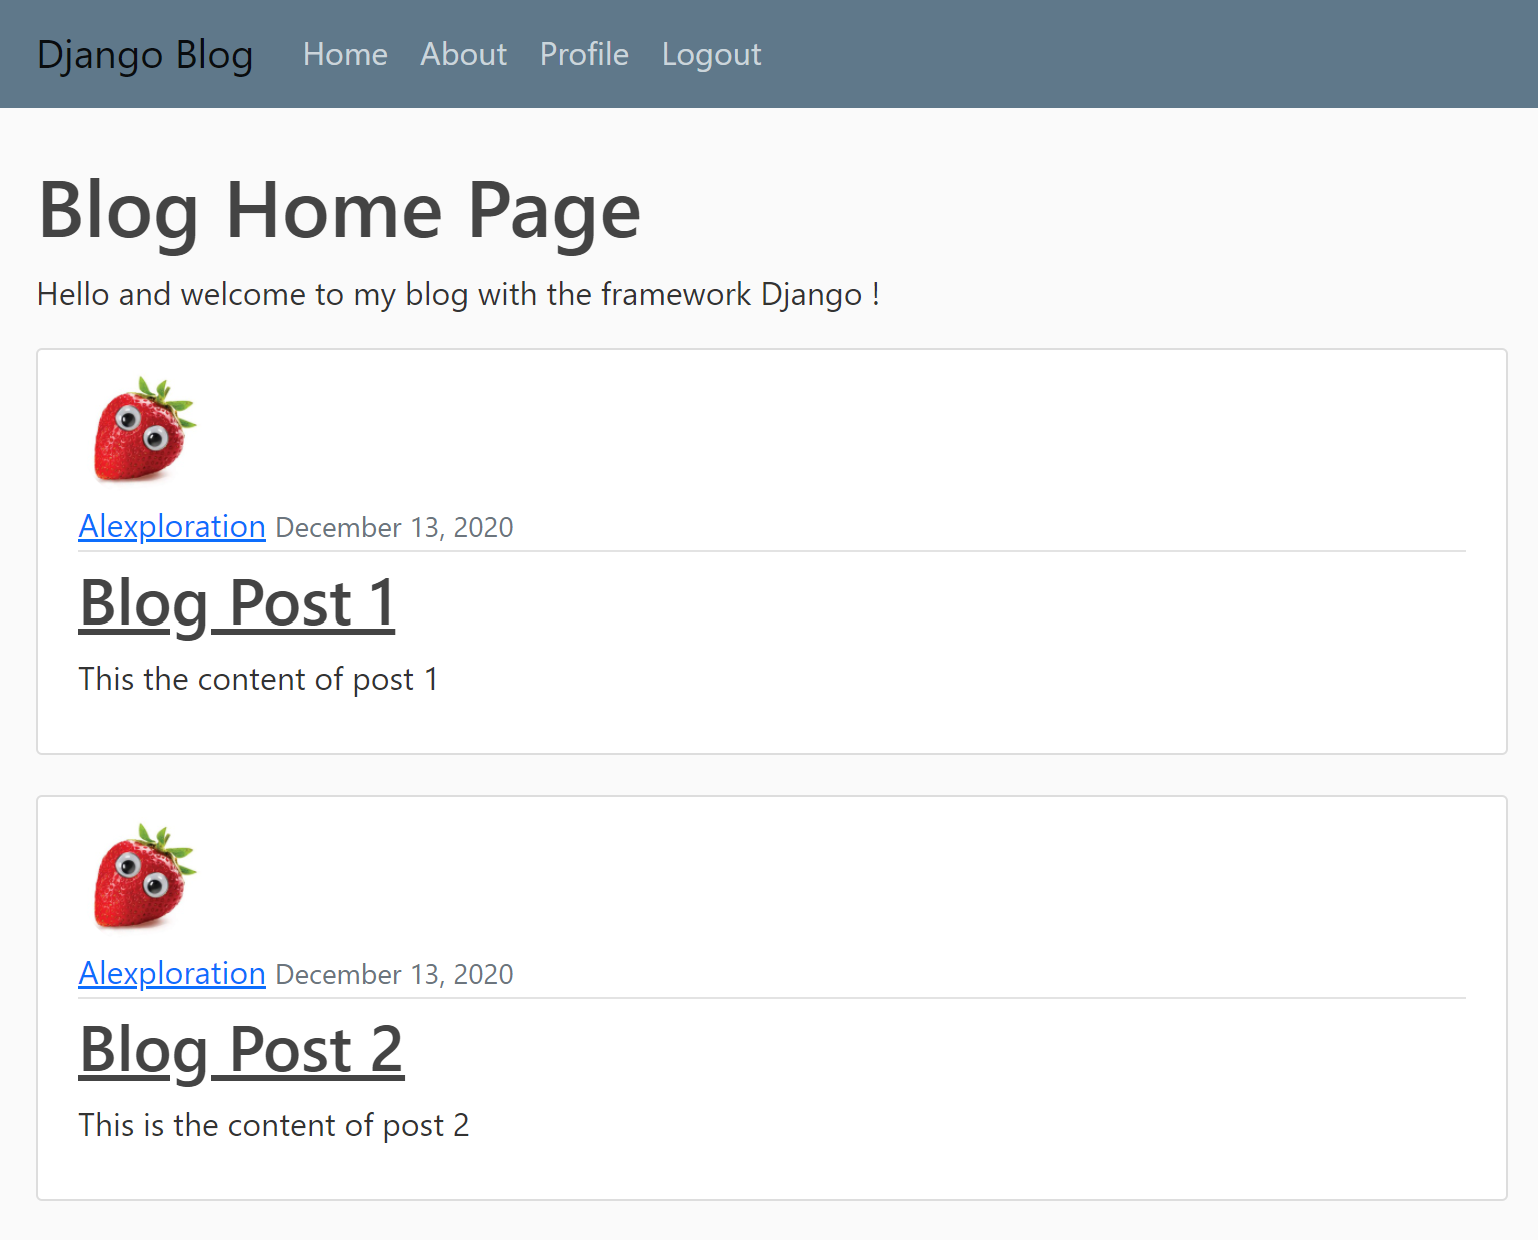

# Creer, Modifier, Supprimer des articles

## Les class-based views

Dans cette nouvelle partie, nous allons en premier lieu introduire un nouveau concept fournis par DJANGO : les ___Class-Based View___. Celles-ci sont des classes fournis par DJANGO pour réaliser différentes views selon nos besoins. Dans les différentes classes, nous retrouvons par exemple la ___List View class___, qui permet de rendre un template avec pour fonction d'afficher une liste, comme une liste d'articles dans notre cas.

Nous pouvons également citer les suivantes :

- ___DetailView___ pour afficher les détails de quelque chose, comme pour notre exemple les détails d'un article du blog (commentaires, description etc...)
- ___DeleteView___ pour supprimer quelque chose
- ___UpdateView___ pour mettre à jour

La liste de ___Class-Based views___ est disponible dans la documentation de DJANGO. Nous allons en voir quelques une dans cette partie, à commencer par la ___ListView___, qui comme dis en amont, permet de réaliser un rendu d'une liste, et sera donc parfait pour notre page d'accueil du blog.

Nous allons réaliser cette nouvelle classe sans écraser notre première ___home view function___ pour constater les différences entre les deux. Aller dans le fichier des view functions de l'app ___blog___. Il s'agit donc d'une classe fournis par DJANGO, et nous devons l'importer pour la faire hériter à notre nouvelle ___Class based view___. Pour l'importation, ecrire ___from django.views.generic import ListView.

L'import faire commencer par déclarer une nouvelle classe ___PostListView___ qui hérite donc de ___ListView___. Pour le contenue de cette classe, nous allons juste déclarer avec quel ___Model class___ la classe va intéragir, ici ___Post___, que nous déclarons dans la variable ___model___.

In [ ]:
# blog/views.py

# Import ListView Class based view

from django.views.generic import ListView

# Create new class view inherite of ListView

class PostListView(ListView):
    
    # Specify the model which class view interact
    
    model = Post

Maintenant, allons dans notre fichier d'urlpattern, pour remplacer notre view function par notre nouvelle class view. Nous changeons uniquement ___views.home___ par notre nouvelle classe que nous importons en amont dans notre fichier d'url, et pour que celle-ci soit exécuter comme une view, nous devons lui appliquer la méthode ___as_view()___.

In [ ]:
# blog/urls.py

from django.urls import path

# Import the new class view

from .views import PostListView
from . import views

urlpatterns = [
    
    # Replace view function and pass the class view at the blog home url pattern
    # Apply as_view function to class view to execute it as view
    
    path('', PostListView.as_view(), name='blog-home'),
    path('about/', views.about, name='blog-about')
]

Faites un test en démarrant le serveur de développement et aller sur la page d'accueil de notre blog. DJANGO vous indiques une erreur, ne trouvant pas le template associé à cette vue. Si vous regardez attentivement le nom du template que notre class view cherche, ___blog/post_list.html___, nous pouvons remarqués que la forme du nom du template est ___\<app>/\<model>_\<viewtype>.html___.

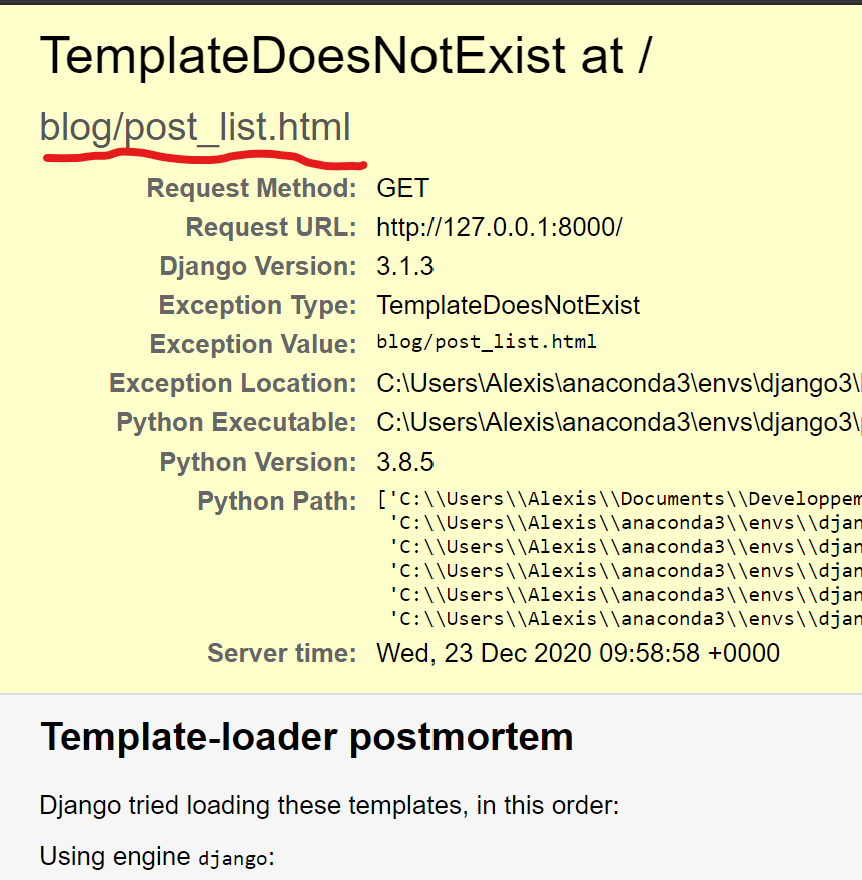

Bien sur, nous pourrions créer un template avec ce modele de nom, mais nous en avons déjà un existant. Il est très facile d'indiquer à notre class view, quel template elle doit prendre pour le rendu de la vue. Pour cela retour dans notre fichier ___blog/views.py___. Dans notre class view, indiquer le template souhaité (___blog/home.html___) en déclarant la variable ___template_name = 'blog/home.html'___.

Autre précision à apporter vu que nous utilisons notre propre template et pas celui attendu par la class view par défaut, il faut également indiquer le nom des variables que nous utilisons dans notre template. Pour une List view class, nous allons donc indiquer la variable que nous itérons pour afficher nos articles. Déclarer la variable ___context_object_name___, et lui donner la valeur du nom de la variable utilisée dans le template, ici ___posts___.

Nous pouvons également configurer l'ordre dans lequel notre liste d'articles s'affiche, en déclarant la variable liste ___ordering___. Nous mettrons en valeur le champ sur lequel nous voulons nous baser pour le tri, dans notre cas ___date_posted___ pour que nos articles soit triés selon la date de publication, et ajouter un - pour que le tri soit fait de l'article le plus récent au plus vieux.

In [ ]:
# blog/views.py

class PostListView(ListView):
    model = Post
    
    # Specify template that class view must used
    # Specify the name of var using in template to iterate and display blog posts
    # Specify the ordering within list var ordering, here date_posted, add - to reverse the ordering
    
    template_name = 'blog/home.html'
    context_object_name = 'posts'
    ordering = ['-date_posted']

Si vous ouvrez de nouveau la page d'accueil du blog, nous retrouvons la vue similaire à celle rendu par notre première view function.

## La class view DetailView

Passons maintenant à un autre type de class view, la ___DetailView___, qui va nous permettre d'ouvrir un article et voir son contenu. Pour cela importer le module dans notre page de view comme pour la ___ListView___, et faire un copier coller de la ___PostListView___ comme base. Renommer la ___PostDetailView___, et la faire hériter de la class ___DetailView___.

Nous pouvons supprimer les variables ___template_name, context_object_name et ordering___, pour ne laisser que le modèle concerné ___Post___. Nous n'avons pas besoin de déclarer plus maintenant dans notre fichier de view, tous se passe dans le fichier d'urlpattern.

In [ ]:
# blog/views.py

from django.shortcuts import render

# Import DetailView class view

from django.views.generic import ListView, DetailView
from .models import Post

(...)

# New class view inherit of DetailView
# Just specify the model class using

class PostDetailView(DetailView):
    model = Post

Nous devons en premier lieu, importer notre nouvelle class view ___PostDetailView___. Ensuite, créons un nouveau chemin pour notre class view, faire un copier coller de l'urlpattern de ___blog-home___ comme base. Pour le format du chemin, il faut partir du principe que nous sommes sur une vue de détail d'un article, donc que chaque article aura son chemin. Pour faire en sorte de générer ce chemin spécifique à chaque article, le chemin commencera par ___post/___ et ensuite nous allons passer au chemin, la ___primary key___ (clé primaire dans la Database) de l'article pour l'identifier et l'afficher.

Pour récupérer cette clé, dans le modele d'url, mettre à la suite ___\<pk>___, et pour indiquer que l'url attend une nombre (integer), nous ajoutons ___int:___. Bien sur, apres le modele d'url, nous passons notre class view avec la méthode ___as_view()___, et donner en nom de cette urlpattern ___post-detail___.

In [ ]:
# blog/urls.py

from django.urls import path

# Import new class view PostDetailView

from .views import PostListView, PostDetailView
from . import views

urlpatterns = [
    path('', PostListView.as_view(), name='blog-home'),
    
    # For this new urlpattern, the path begin at post/ and take the primary of each posts
    # Apply as_view method at the class view and name the urlpattern.
    # int: serve to specify type of var expected, here integer
    
    path('post/<int:pk>', PostDetailView.as_view(), name='post-detail'),
    path('about/', views.about, name='blog-about'),
]

Dernière étape pour notre nouvelle page affichant les détails d'un article, la déclaration d'un nouveau template lié à tous cela. Si vous vous souvenez, la forme du template attendu par les class-based view de DJANGO sont de la forme ___\<model>\_\<viewtype>___. Pour la ___ListView___, nous avions déjà un template de prêt d'où le fait d'avoir spécifié celui-ci. Pour cette nouvelle vue, nous pouvons très bien se calquer sur le nom du template attendu par DJANGO, pour notre nouveau template donc ___post_detail.html___.

Aller dans le dossier de templates de l'app ___blog___. Créer un nouveau template ___post_detail.html___, et nous pouvons prendre en base le contenu du template ___home.html___ puisqu'il affiche également nos articles de blogs. Il suffit simplement d'enlever la boucle ___for___ dans le template.

Egalement, sachant que nous sommes sur la configuration par défaut des class views fournis par DJANGO, contrairement à notre ___PostListView___, nous utiliserons le nom de la variable fournis avec la class-based view ___DetailView___, qui est ___object___. Nous remplacons tous simplement la variable ___post___ par ___object___ dans notre nouveau template. Nous pouvons également enlever le lien sur le titre de l'article, et passer la classe ___article-title___ directement à la balise de titre ___h2___.

In [ ]:
# blog/templates/blog/post_detail.html

# New template based in home page template
# Remove for loop to display just one post, and using object var given by DJANGO class-based view

{% extends 'blog/base.html' %}
{% block content %}
    <article class="media content-section">
        <img class="rounded-circle article-img" src="{{ object.author.profile.image.url }}" alt="user-profile-pics">
        <div class="media-body">
            <div class="article-metadata">
                <a class="mr-2" href="#">{{ object.author }}</a>
                <small class="text-muted">{{ object.date_posted|date:"F d, Y" }}</small>
            </div>
            <h2 class="article-title">{{ object.title }}</h2>
            <p class="article-content">{{ object.content }}</p>
        </div>
    </article>
{% endblock content %}

La page de détail de chaque article existe, nous pouvons donc mettre à jour les liens de notre page d'accueil du blog. Aller sur le template ___home.html___, et dans notre balise de lien dans la balise de titre ___h2___, pour le moment le lien est mort. Pour générer le bon lien pour chaque article, dans l'attribut ___href___, nous pouvons utilisés un bloc de code et passer le nom de l'url pattern ___post-detail___ en ajoutant après en "argument" le clé primaire du post, et nous pouvons la récupérer avec ___post.id___.

In [ ]:
# blog/templates/blog/home.html

{% extends 'blog/base.html' %}
{% block content %}
    <h1>Blog Home Page</h1>

    <p>Hello and welcome to my blog with the framework Django !</p>

    {% for post in posts %}

        <article class="media content-section">
            <img class="rounded-circle article-img" src="{{ post.author.profile.image.url }}" alt="user-profile-pics">
            <div class="media-body">
            <div class="article-metadata">
                <a class="mr-2" href="#">{{ post.author }}</a>
                <small class="text-muted">{{ post.date_posted|date:"F d, Y" }}</small>
            </div>
            
            # Replace dead link, pass urlpattern name post-detail to generate the path for each post
            # Add post.id "argument" at the path to generate the path according to the post
            
            <h2><a class="article-title" href="{% url 'post-detail' post.id %}">{{ post.title }}</a></h2>
            <p class="article-content">{{ post.content }}</p>
            </div>
        </article>

    {% endfor %}
{% endblock content %}

Si vous passez votre souris sur le lien vers le détail d'un article, vous pouvez observer la génération du lien en bas gauche du navigateur, qui prend bien en paramètre pour chaque lien, l'id de l'article qui lui correspond.

## Créer un nouvel article.

Nous attaquons une nouvelle class view que nous allons mettre en place, la ___CreateView___. Retour dans notre fichier de view de l'app ___blog___, importer le module comme les autres class-based views. Nous pouvons encore nous basés sur notre précédente class view et en faire un copier coller. Renommer cette nouvelle classe ___PostCreateView___ et la faire hériter de ___CreateView___.

Un peu similaire à la creation d'un formulaire ici, nous allons indiquer en premier le ___Model class___ dans la variable ___model___, et les champs avec lesquels nous voulons entrer es informations dans la variable ___fields___. Nous ne renseignons que les champs ___title et content___ car notre date est générée automatiquement, et nous allons voir plus tard comment associer l'auteur automatiquement également.

In [ ]:
from django.shortcuts import render

# Import new class-based view CreateView
# list module in multiple lines with parentheses

from django.views.generic import (
    ListView,
    DetailView,
    CreateView
)


class PostListView(ListView):
    model = Post
    template_name = 'blog/home.html'
    context_object_name = 'posts'
    ordering = ['-date_posted']


class PostDetailView(DetailView):
    model = Post


# New class view inherit of CreateView
# Indicate the model and the fields wich we want interacts
    
class PostCreateView(CreateView):
    model = Post
    fields = ['title', 'content']


def about(request):
    return render(request, 'blog/about.html', {'title': 'About'})

Après la déclaration de notre nouvelle class view, nous poursuivons avec un nouvel urlpattern ___post/new/___, avec en argument notre nouvelle class view et la méthode ___as_view___, et en nom pour ce nouveau urlpatern ___post-create___.

In [ ]:
# blog/urls.py

from django.urls import path

# Import new class view

from .views import (
    PostListView,
    PostDetailView,
    PostCreateView
)
from . import views

urlpatterns = [
    path('', PostListView.as_view(), name='blog-home'),
    path('post/<int:pk>/', PostDetailView.as_view(), name='post-detail'),
    
    # New urlpattern for the new class view
    
    path('post/new/', PostCreateView.as_view(), name='post-create'),
    path('about/', views.about, name='blog-about'),
]

Après cette étape, vous seriez tentés de créer un nouveau template ___post_create.html___, mais pour cette classs-based view ainsi que pour ___UpdateView___, le schéma de template est de la forme ___\<model>\_form___, donc dans notre cas nous allons créer un nouveau template ___post_form.html___.

Si vous avez remarquer, la vue que nous voulons créer se rapproche de la vue créée pour enregistrer un nouvel utilisateur, donc nous pouvons prendre en base et faire un copier coller du template ___register.html___. Les modifications textuelles à faire sont le contenu de la balise ___legend___ où nous mettrons ___Blog post___ comme texte, le bouton de soumission du formulaire que nous pouvons renommer ___Post___ à la place de ___Submit___. En dernière modification, nous pouvons enlever le contenu entier de la balise ___div___ avec le lien vers la page de Login.

In [ ]:
# blog/templates/blog/post_form

# Based on register template
# Modify text in legend tag and button tag
# Remove div contains login page link
# form var is the same name using in class based-view CreateView

{% extends 'blog/base.html'%}
{% load crispy_forms_tags %}
{% block content %}
    <div class="content-section">
        <form method="POST">
            {% csrf_token %}

            <!-- fieldset tag allow to group related elements in a form -->
            
            <fieldset class="form-group">
                <legend class="border-bottom mb-4">Blog Post</legend>
                {{ form|crispy }}
                <button class="btn btn-outline-info mt-2 mb-2" info="submit">Post</button>
            </fieldset>

        </form>
    </div>
{% endblock content %}

En vous rendant à l'url associée, notre formulaire est bien généré sans soucis.

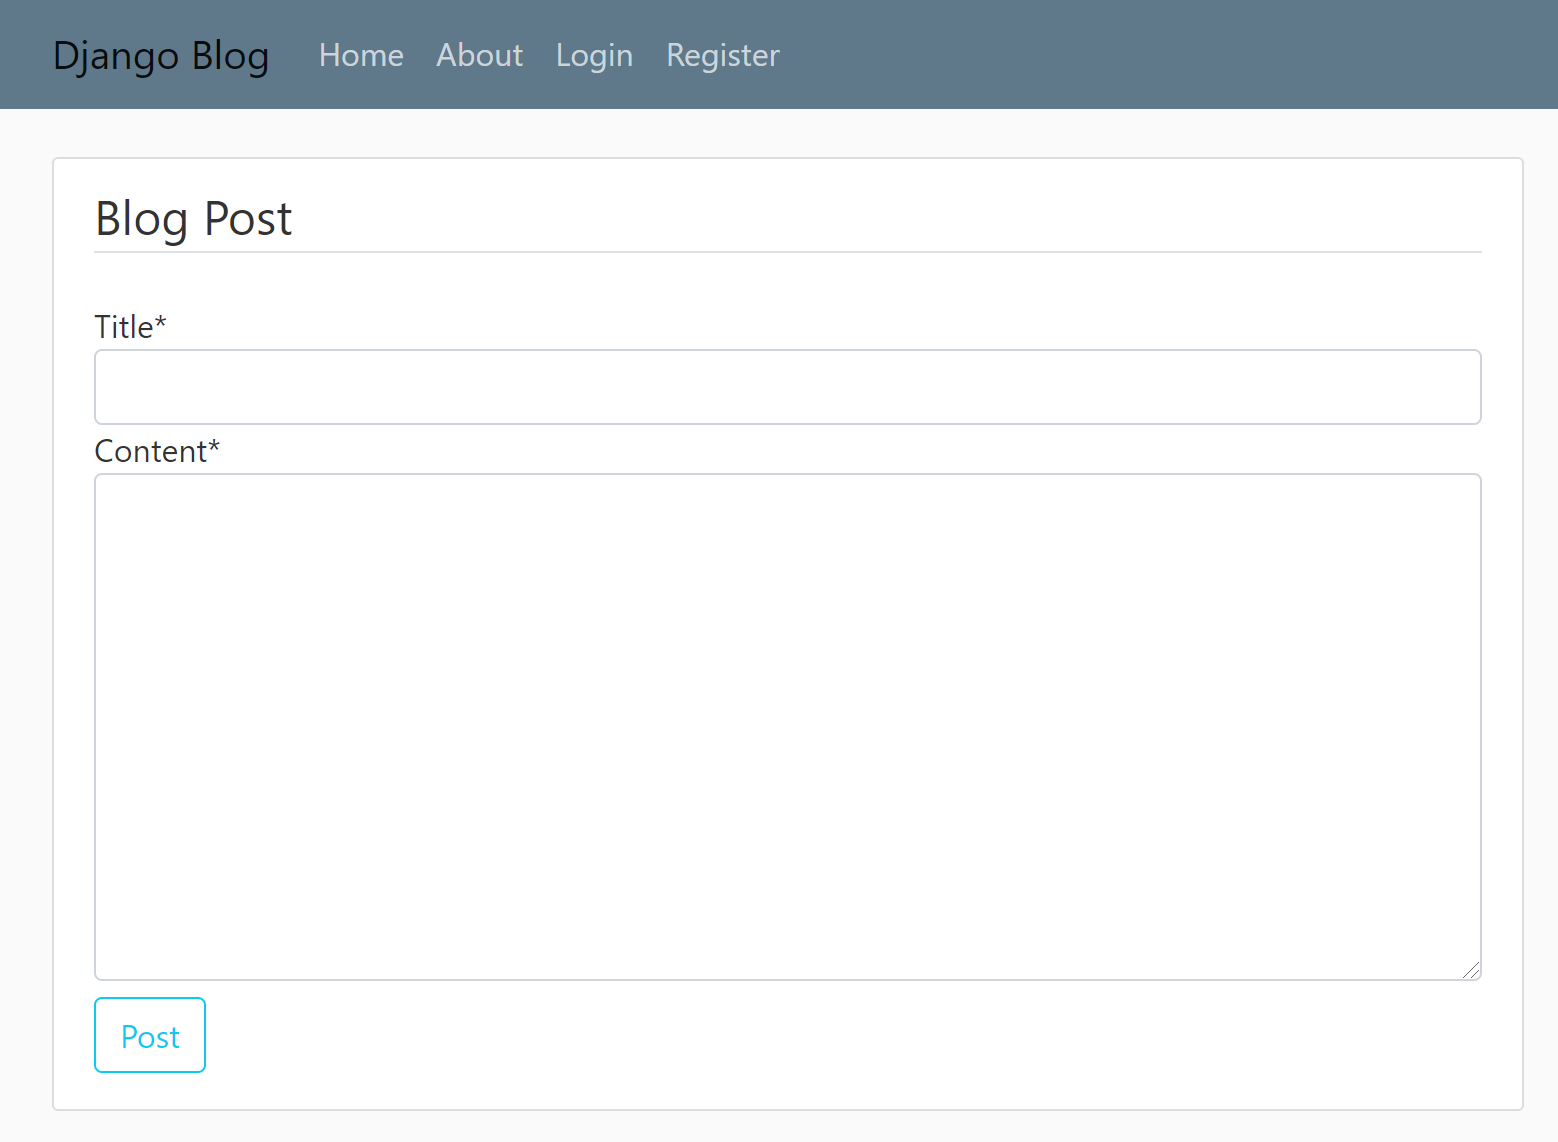

Maintenant, faites un test de création d'un nouvel article. DJANGO lèvera une erreur assez particulière, ___IntegrityError___. Si vous regardez la deuxième ligne, DJANGO indique que l'___author.id___ a une valeur ___NOT NULL___, donc aucun auteur associé ce qui pose un très gros problème.

Pour pallier à ce problème, il va falloir indiquer à DJANGO à quel auteur l'article correspond avant, et cela se fais un ___override___ (surcharge) de la fonction ___form_valid()___ enclencher par DJANGO au niveau de notre class view ___PostCreateView___. Aller dans le fichier ___views.py___ dans notre app.

Nous allons donc faire un ___override___ de la méthode ___form_valid___. Celle-ci prend en argument ___self___, et le formulaire ___form___. Il faut simplement paramètrer en premier l'auteur de l'article, pour cela nous déclarons que ___form.instance.author___, vaut l'utilisateur à l'origine de la requête, ___self.request.user___. Pour finir nous retournons l'exécution normale de la méthode avec ___super().form_valid(form)___.

En plus vulgaire, cela veut dire "le formulaire que tu essayes de soumettre, juste avant prend son instance et configure son auteur qui vaut donc l'auteur actuellement connecté, et juste après tu peux valider le formulaire".

In [ ]:
class PostCreateView(CreateView):
    model = Post
    fields = ['title', 'content']
    
    # Override the form_valid method
    # Set the author in the instance of the form submitted
    # After execute form_valid method just like usually

    def form_valid(self, form):
        form.instance.author = self.request.user
        return super().form_valid(form)

Après cette configuration de l'auteur de l'article, réessayons de créer un nouvel article. Une erreur est de nouveau levé par DJANGO (autre que celle concernée par l'auteur, bonne nouvelle).

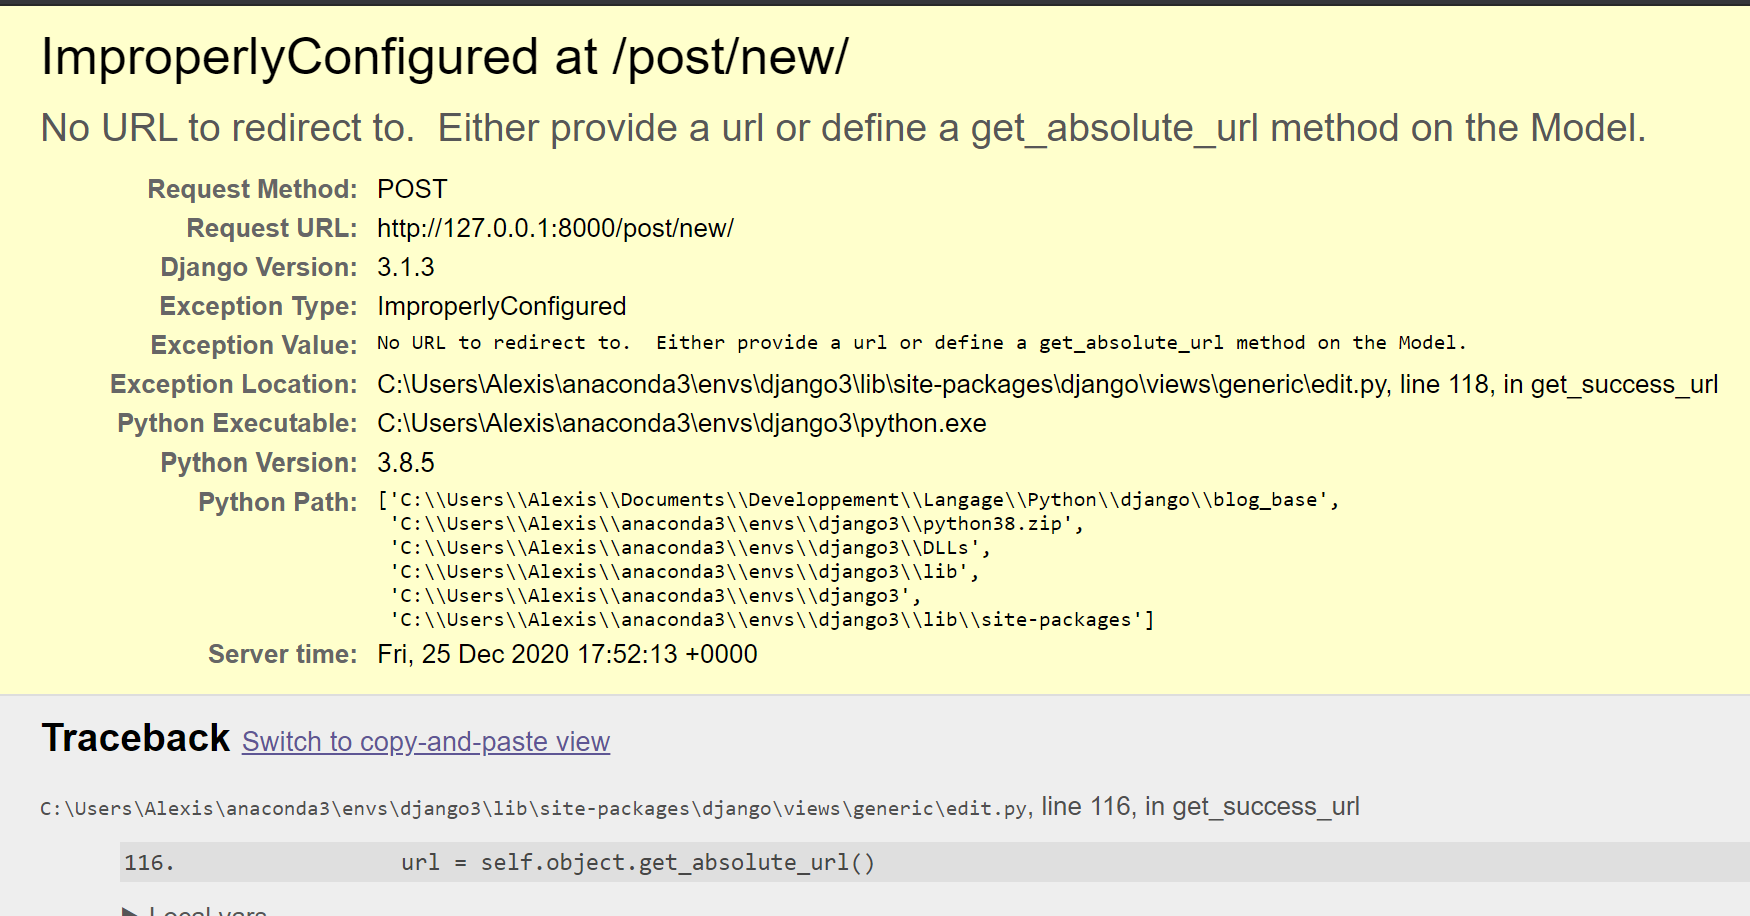

Cette erreur nous indiques que DJANGO ne trouve pas d'url vers laquelle se rediriger après avoir soumis le formulaire. Il faut donc soit lui fournir cet url, soit créer une méthode ___get_absolute_url___ personnalisée dans notre ___Model class___ concerné, ici ___Post Model class___. L'idéal ici serait de rediriger sur la page de détail du nouvel article, et c'est ce que nous allons réaliser.

La première intuition pour réaliser cela srait d'utiliser la methode ___redirect___ que nous avons vus plus tôt, mais nous allons utiliser la méthode ___reverse___ pour notre cas. la méthode ___redirect___ va bien redirigé à l'url indiquée, mais ___reverse___ va retourner l'url sous forme de string, et c'est ce que nous avons besoin pour notre méthode personnalisé ___get_absolute_url___.

Rendez-vous donc dans notre fichier ___models.py___ de notre app ___blog___, et commencer par importer ___reverse___ de ___django.urls___. Puis dans notre modèle, créer une nouvelle méthode ___get_absolute_url___, qui a pour but de récupérer et renvoyer l'url de n'importe quel instance spécifique de notre modèle. Cette méthode prend en argument ___self___, et nous retournerons le chemin complet vers la nouvelle instance de ___Post___ avec la méthode ___reverse___, prenant en argument donc l'urlpattern ___post-detail___ (retourne donc ___/post/___), et pour avoir l'id de notre nouvel article, nous récupérons celui-ci en passant l'argument ___kwargs___ vallant un dictionnaire, contenant une clé ___pk___ vallant donc la clé primaire de notre nouvelle instance ___self.pk___.

In [ ]:
# blog/models.py

from django.db import models
from django.utils import timezone
from django.contrib.auth.models import User

# Import reverse method

from django.urls import reverse

class Post(models.Model):
    title = models.CharField(max_length=100)
    content = models.TextField()
    date_posted = models.DateTimeField(default=timezone.now)
    author = models.ForeignKey(User, on_delete=models.CASCADE)

    def __str__(self):
        return self.title

    
    # Define personal get_absolute_url to indicate at DJANGO the url where he must redirect
    
    def get_absolute_url(self):
        
        # reverse method return a string
        # arg is urlpattern post-detail which return /post/
        # kwargs arg take a dictionnary with key/value pair to get id of the new instance of Post model class create
        
        return reverse('post-detail', kwargs={'pk': self.pk})

Après cette configuration, dès qu'un nouvel article est créé, nous sommes bien redirigé sur la page de détail de celui-ci. Dernière configuration que nous pouvons mettre en place pour cette ___CreateView___, le fait que seul un utilisateur connecté puisse créer et accéder à cette page de création d'un nouvel article.

Nous avions vu ce genre de restriction avec la page de profil d'un utilisateur, mais il s'agissait d'un décorateur ___login_required___ sur une view function.

Hors ici nous ne pouvons pas utiliser les decorators sur des classes, donc nous allons utilisés ce que nous appelons ___un mixin___. C'est tous simplement une classe que nous allons faire hériter à notre class view pour avoir les mêmes restrictions si l'utilisateur n'est pas logger.

Aller dans le fichier ___views.py___, importer le module ___LoginRequiredMixin___ de ___django.contrib.auth.mixins___, et faire hériter notre class view ___PostCreateView___ de ce mixin. Si vous tentez d'accéder à la page ___post/new___, vous serez bien redirigez vers la page de Login

In [ ]:
# blog/views.py

# Import mixin module

from django.contrib.auth.mixins import LoginRequiredMixin

# PostCreateView inherit of this mixin

class PostCreateView(LoginRequiredMixin, CreateView):
    model = Post
    fields = ['title', 'content']

    def form_valid(self, form):
        form.instance.author = self.request.user
        return super().form_valid(form)

## Modifer un article

Notre vue de creation est bien configurée, passons à la vue pour modifier un article. Comme dis en amon, DJANGO fournis la class-based view ___UpdateView___ pour faire cela facilement. Importer la comme les autres dans notre fichier ___views.py___. La déclaration de cette nouvelle vue est presque similaire à ___PostCreateView___ donc faire un copier coller de celle-ci comme base.

Renommer la ___PostUpdateView___, et la faire hériter de ___UpdateView___ à la place de ___CreateView___. Au niveau des déclarations du modèle et des champs avec lesquels nous voulons intéragir, ainsi que de l'override de la methode ___form_valid___, ce sont exactement les mêmes donc nous pouvons laisser ces déclarations. Nous passons donc à la déclaration du nouveau urlpattern dans notre fichier ___urls.py___ pour cette nouvelle vue.

In [ ]:
# blog/views.py

from django.views.generic import UpdateView

(...)

# The structure of this new class view is similar at PostCreateView

class PostUpdateView(LoginRequiredMixin, UpdateView):
    model = Post
    fields = ['title', 'content']

    def form_valid(self, form):
        form.instance.author = self.request.user
        return super().form_valid(form)

Faire un copier de l'urlpattern de ___post-detail___ et le coller après de l'urlpattern de ___post-create___. Vu que nous créons ce nous urlpattern pour chaque article que nous voulons modifier, il suffit d'ajouter ___update/___ à la suite du modèle d'url que nous avons copiés, pour avoir une génération de l'url pour tous nos articles. Ne pas oublier d'importer notre class view ___PostUpdateView___, et remplacer ___PostDetailView___ par celle-ci, et de renommer notre vue ___post-update___.

In [ ]:
# blog/urls.py

# Import new class view UpdateView

from django.urls import path
from .views import (
    PostListView,
    PostDetailView,
    PostCreateView,
    PostUpdateView
)
from . import views

urlpatterns = [
    path('', PostListView.as_view(), name='blog-home'),
    path('post/<int:pk>/', PostDetailView.as_view(), name='post-detail'),
    path('post/new/', PostCreateView.as_view(), name='post-create'),
    
    # the url pattern is few the same that post-detail, we want generate url for each post
    
    path('post/<int:pk>/update/', PostUpdateView.as_view(), name='post-update'),
    path('about/', views.about, name='blog-about'),
]

Si vous vous souvenez, concernant le template associé à cette vue, les class-based views ___CreateView et UpdateView___ partage le même template donc il n'est pas nécessaire d'en créer un nouveau. Vous pouvez essayer de modifier un article pour tester votre nouvelle vue. Avec cette class-based view fournis par DJANGO, vous pouvez voir que le formulaire de modification est automatiquement remplis par les informations actuelles de l'article.

Petit problème ici, c'est que n'importe quel utilisateur peut donc modifier n'importe quel article, ce qui n'est pas le cas normalement dans un blog. Nous allons y remédier de suite, et utiliser un Mixin fournis par DJANGO.

Aller dans ___views.py___, et importer en premier notre mixin ___UserPassesTestMixin___ du package ___django.contrib.auth.mixins___. Dans notre class view ___PostUpdateView___, faire hériter de ce nouveau mixin à la class view, et nous allons créer une nouvelle méthode appelée ___test_func___ utilisée par notre mixin pour réaliser la vérification de l'utilisateur.

Dans cette méthode, il faut en premier obtenir l'article étant l'objet de la modification, que nous récupérons dans une variable avec la méthode ___get_object()___. Ayant notre article nous pouvons vérifier que son auteur est bien l'utilisateur en cours dans une structure conditionnelle, et si la condition est respectée, la méthode retourne ___True___, sinon ___False___. Cette information est ensuite traitée par notre mixin pour donner la permission ou non de modifier l'article.

In [ ]:
# blog/views.py

# Import mixin provide by DJANGO to verify user

from django.contrib.auth.mixins import UserPassesTestMixin

(...)



class PostUpdateView(LoginRequiredMixin, UserPassesTestMixin, UpdateView):
    model = Post
    fields = ['title', 'content']

    def form_valid(self, form):
        form.instance.author = self.request.user
        return super().form_valid(form)
    
    
    # Create test_func method, method get the post in first with get_object method
    # After, with conditional structure, verify if currently user is the author of the post, and return True if is exact
    # Result of this method is used by the mixin to generate 403 Permission denied error or not.

    def test_func(self):
        post = self.get_object()
        if self.request.user == post.author:
            return True
        return False

## Supprimer un article

Dernier class-based view que nous voyons dans cette partie, celle utilisée pour supprimer un article. Pour cette vue nous allons utiliser des bases de certaines des vues déjà créer. En premier importer la class based view ___DeleteView___. En première base de cette nouvelle class view, nous pouvons copier ___PostDetailView___, puisqu'il suffit de déclarer le modèle avec lequel nous travaillons, et la coller à la suite de ___PostUpdateView___.

Ensuite nous pouvons copier les Mixins de la class view ___PostUpdateView___ et les faire hériter de notre nouvelle class view puisqu'il faut que l'utilisateur soit connecté et qu'il soit l'auteur de l'article qu'il veut supprimer. Copier également la methode ___test_func___ pour la vérification de l'auteur de l'article. Renommer notre nouvelle class view ___PostDeleteView___, la faire hériter de ___DeleteView___ en remplacement de ___DetailView___.

In [ ]:
# blog/views.py

from django.views.generic import DeleteView

class PostDeleteView(LoginRequiredMixin, UserPassesTestMixin, DeleteView):
    model = Post
    
    def test_func(self):
        post = self.get_object()
        if self.request.user == post.author:
            return True
        return False

Apres déclaration de cette nouvelle class view, nous lui ajoutons un urlpattern dans notre fichier ___urls.py___ de l'app ___blog___, basée sur le modèle de ___post-detail___ puisqu'il faut également une url spécifique pour chaque article que nous voulons supprimés.

In [ ]:
# blog/urls.py

from django.urls import path
from .views import (
    PostListView,
    PostDetailView,
    PostCreateView,
    PostUpdateView,
    PostDeleteView
)
from . import views

urlpatterns = [
    path('', PostListView.as_view(), name='blog-home'),
    path('post/<int:pk>/', PostDetailView.as_view(), name='post-detail'),
    path('post/new/', PostCreateView.as_view(), name='post-create'),
    path('post/<int:pk>/update/', PostUpdateView.as_view(), name='post-update'),
    
    # new url pattern for Delete class view
    
    path('post/<int:pk>/delete/', PostDeleteView.as_view(), name='post-delete'),
    path('about/', views.about, name='blog-about'),
]

Prochaine étape pour cette class view, créer un nouveau template assez simple, qui contiendra un formulaire nous demandant la confirmation de la suppression de l'article. Le nom du template que nous devons donner est un peu particulier par rapport aux autres, il s'agit de ___post_confirm_delete.html___.

Nous pouvons utiliser le code du template ___post_form.html___ comme base de notre nouveau template, et effectuer quelques changements. En premier nous pouvons enlever le plugin ___crispy-forms___ car nous n'allons pas utiliser une mise en forme de formulaire (enlever ___load crispy_forms_tags___ et notre balise d'appel de la variable ___form|crispy___).

Ajoutons une balise ___h2___ pour demander à l'utilisateur s'il est sûr de vouloir supprimer l'article, avec une double accolade pour insérer le titre de l'article concerné ___{{ object.title }}___. Ensuite, nous transformons le bouton ___Post___, en bouton ___"Yes, Delete"___, avec la classe Bootstrap ___btn-outline-danger___ pour le mettre en rouge.

L'ajout d'un bouton de retour ___Cancel___ est réalisé, dans le cas où l'utilisateur changerais d'avis. Ce bouton sera une balise ___a___, avec dans l'attribut __href___ une redirection sur la page de détails de l'article en question.

In [ ]:
# blog/templates/blog/post_confirm_delete.html

# Remove crispy-forms plugin, not using here

{% extends 'blog/base.html'%}
{% block content %}
    <div class="content-section">
        <form method="POST">
            {% csrf_token %}

            <!-- fieldset tag allow to group related elements in a form -->
            
            <fieldset class="form-group">
                <legend class="border-bottom mb-4">Delete Post</legend>
                
                # Insert h2 tag to ask at user if sure to delete the post
                # object.title to dsplay the title of post want delete
                
                <h2>Are your sure you want delete the post {{ object.title }} ?</h2>
            </fieldset>
            <div class="form-group">
            
                # Button to submit delete request
            
                <button class="btn btn-outline-danger mt-2 mb-2" info="submit">Delete</button>
                
                # Create an a button to redirect user if want not delete the post
                
                <a class="btn btn-outline-secondary" href="{% url 'post-detail' object.id %}">Cancel</a>
            </div>
                
        </form>
    </div>
{% endblock content %}

Allumer le serveur de développement de DJANGO, et tenter de supprimer un article. Vous aurez le même type d'erreur que lorsque nous avons mis ___l'UpdateView___ en place, à savoir que DJANGO ne sait pas où rediriger l'utilisateur après la soumission de la requête de suppression.

Pour remédier à ça, il suffit simplement d'ajouter à notre class view la variable ___sucess_url___ et lui mettre en valeur la page sur laquelle nous voulons être rediriger, dans notre cas ___/___ pour la page d'accueil

In [ ]:
# blog/views.py

class PostDeleteView(LoginRequiredMixin, UserPassesTestMixin, DeleteView):
    model = Post
    
    # success_url var to specify url redirection after submit delete request.
    
    success_url = '/'
    
    def test_func(self):
        post = self.get_object()
        if self.request.user == post.author:
            return True
        return False

La fonctionnalité de suppression devrait maintenant fonctionner.

## Integration côté utilisateur

Dans cette grande partie, nous avons donc configurer et découvert les class-based views fournies par DJANGO pour créer, modifier et supprimer nos articles. Mais pour le moment, ces fonctionnalités ne sont pas accessibles graphiquement, sur notre site côté utilisateur.

En premier, nous pouvons ajoutons dans notre barre de navigation, pour les utilisateurs connectés, la fonctionnalité de créer un nouvel article. Rien de plus simple en allant dans notre template ___base.html___, et ajouter notre lien vers la class view ___post-create___ dans le bloc de condition utilisateur connecté.

In [ ]:
#blog/templates/blog/base.html

(...)

{% if user.is_authenticated %}

    # New Post functionality add in navbar of connected user

  <a class="nav-item nav-link" href="{% url 'post-create' %}">New Post</a>
  <a class="nav-item nav-link" href="{% url 'profile' %}">Profile</a>
  <a class="nav-item nav-link" href="{% url 'logout' %}">Logout</a>
{% else %}
  <a class="nav-item nav-link" href="{% url 'login' %}">Login</a>
  <a class="nav-item nav-link" href="{% url 'register' %}">Register</a>
{% endif %}

(...)

Maintenant il serait bien de faire en sorte d'ajouter dans notre vue de détail d'un article, les fonctionnalités de modification et de suppression de m'article, uniquement si l'auteur de l'article est le même que l'utilisateur connecté. Rendez-vous dans le template ___post_detail.html___.

Il suffit d'ajouter une structure conditionnelle qui vérifie la condition citée, et si c'est le cas, les boutons de suppression et de modification de l'article sont affichés.

In [ ]:
{% extends 'blog/base.html' %}
{% block content %}
    <article class="media content-section">
        <img class="rounded-circle article-img" src="{{ object.author.profile.image.url }}" alt="user-profile-pics">
        <div class="media-body">
            <div class="article-metadata">
                <a class="mr-2" href="#">{{ object.author }}</a>
                <small class="text-muted">{{ object.date_posted|date:"F d, Y" }}</small>
                
                # Add conditionnal structure, if user is the author of the post
                # display button to update and delete the post
                
                {% if object.author == user %}
                    <a class="btn btn-secondary btn-sm mt-1 mb-1" href="{% url 'post-update' object.id %}">Update</a>
                    <a class="btn btn-danger btn-sm mt-1 mb-1" href="{% url 'post-delete' object.id %}">Delete</a>
                {% endif %}
            </div>
            <h2 class="article-title">{{ object.title }}</h2>
            <p class="article-content">{{ object.content }}</p>
        </div>
    </article>
{% endblock content %}

# Pagination

Dans cette partie nous allons ajouter une nouvelle fonctionnalité à notre blog, la pagination qui permettra de répartir nos articles sur plusieurs pages. Dans un premier temps pour voir les effets de la pagination, il faut ajouter quelques articles sur le blog, une dizaine devrait suffire.

Vous pouvez ajouter cette dizaine de d'articles soit via la fonction d'ajout d'article du site, soit en suivant ce que propose l'auteur de ce tutoriel, les ajouter via un fichier JSON qu'il met à disposition qui contient plusieurs articles. Nous allons détailler cette méthode juste ici mais vous pouvez passer directement à l'étape suivante si vous souhaitez ajouter vos articles autrement.

## Ajout d'articles rapidement via JSON

Pour cette méthode donc, télécharger le fichier JSON ___posts.json___ et le mettre à la racine du projet DJANGO. Nous allons ouvrir un shell DJANGO, et importer en premier le module ___json___, ainsi que notre ___Post model___. Ensuite le principe va être de lire le fichier JSON avec ___with open ('posts.json') as f___ et de sauvegarder le contenu dans un variable dictionnaire.

Une fois cela fait, nous pouvons itérer sur notre dictionnaire et créer à chaque fois une nouvelle instance de notre ___Post model___, avec en titre la valeur contenue dans notre dictionnaire avec la clé ___title___, en contenu la valeur associée à la clé ___content___, et en auteur la valeur associée à la clé ___user_id___. Pour chaque nouvelle instance de ___Post___, appliquer ensuite la méthode ___save().

In [ ]:
# DJANGO shell

# Import json module and Post model
import json
from blog.models import Post

# open json file content and save it in dict var
with open ('posts.json') as f:
    post_json = json.load(f)
    
# Loop in dict var to save each post as new instance of Post model
for post in post_json:
    post = Post(title=post['title'], content=post['content'], author_id=post['user_id'])
    post.save()

Si aucune erreur n'est remontée, vous pouvez fermer la console Python de DJANGO, et nous allons donc passer à l'application de la pagination dans notre projet.

## Paginator

Pour appliquer notre pagination, nous allons utiliser le module ___Paginator___ fournis par DJANGO. Pour comprendre comment celui-ci fonctionne, ouvrir une console Python DJANGO. Nous allons importer la module via ___django.core.paginator___. Ensuite nous créons une liste représentant nos articles.

Pour commencer à utiliser le module, nous créons une instance de ___Paginator___, avec en argument notre liste représentant nos articles, et un nombre indiquant le nombre d'objet que nous voulons par page.

In [ ]:
# DJANGO Shell

# Import Paginator module and create list represent posts

from django.core.paginator import Paginator
post = ['1', '2', '3', '4', '5']

# Create instance of Paginator, with list of post and number of post that we want in each page

p = Paginator(post, 2)
p
# Paginator object

Notre instance de ___Paginator___ créée, nous pouvons accéder à plusieurs informations comme le nombre de page contenue dans notre instance

In [ ]:
p.num_pages
# Output : 3

Si vous voulez boucler sur chaque page, vous pouvez utiliser la méthode attribut ___page_range___

In [ ]:
for page in p.page_range:
    print(page)
    
# Output : 1 2 3

Vous pouvez également accéder à une page spécifique avec ___page(number_of_page)___. Il est possible ensuie d'accéder au numéro de la page sous forme d'integer avec ___number___.

In [ ]:
p1 = p.page(1)
p1

# Output : <Page 1 of 3>

p1.number

# Output : 1

Bien sur, vous pouvez accéder aux objets contenus dans chaque page sous forme de liste avec ___object_list___

In [ ]:
p1.object_list

# Output : ['1','2']

Autres méthodes que nous allons utiliser, ___has_previous()___ et ___has_next()___, qui renvoient un booléen ___True___ si une page précède pour la première méthode, ou succède pour la deuxième méthode, à la page en question.

In [ ]:
# p1 is the first page, so not have previous page but next page

p1.has_previous()
# Output : False

p1.has_next()
# Output : True

Il est possible d'obtenir le numéro de la page qui succède une autre avec ___next_page_number()___ 

In [ ]:
p1.next_page_number()

# Ouput : 2

Maintenant que nous avons vu les différentes manipulations possible avec ce module ___Paginator___, nous allons voir comment l'appliquer ans notre projet. Vous pouvez donc fermer la console Python de DJANGO. Rendez-vous dans le fichier ___views.py___ de l'app ___blog___, et nous allons donc intégrer une pagination à notre page d'accueil.

## Ajouter la pagination au class view

Dans le même esprit que les class-based views, nous n'allons pas avoir besoin d'importer le module ___Paginator___ et créer notre pagination, il suffit dans notre class view d'ajouter ___paginate_by___ avec le nombre d'objet que nous voulons dans une page pour que celle-ci se mette en place.

In [ ]:
# blog/views.py

(...)

class PostListView(ListView):
    model = Post
    template_name = 'blog/home.html'
    context_object_name = 'posts'
    ordering = ['-date_posted']
    
    # Add paginate_by attribute to apply pagination
    
    paginate_by = 2

Maintenant, si vous vous rendez sur la page d'accueil de votre blog, seulement 2 articles s'affichent. Notre pagination indiquant 2 articles par page fonctionne bien. Mais comment accéder aux autres pages du blog maintenant ? Si vous ajouter le paramètre ___/?page=2___ dans l'url, la 2e page contenant les 2 articles suivant apparaît. En remplaçant le 2 par 3, vous accéder à la page 3 des articles etc...

## Pagination dans notre template

Il va donc falloir intégrer des liens vers nos différentes pages. Pour cela, aller dans notre fichier de template ___home.html___ dans lequel nous allons rajouter nos liens. Dans le template, nous allons ajouter nos liens de pages juste après notre boucle ___for___. Ouvrir une structure conditionnelle qui vérifie déjà qu'un l'objet de la pagination est passé dans notre template, avec ___is_paginated___.

Nous allons faire en sorte d'afficher le numéro de la page actuelle, sa page précédente, la possibilité d'aller directement à la première et dernière page également. 

### Première page et page précédente

Dans la structure conditionnelle, nous vérifions que la page actuelle (représentée par la variable ___page_obj___) a une page précédente, comme nous avons vus dans le shell de DJANGO avec ___has_previous___. Si c'est le cas nous affichons un lien vers la première page, avec une balise ___a___ et un ___href=?page=1___, et également un lien vers la page précédente.

Pour l'attribut ___href___ de la balise de lien vers la page précédent, la base est donc la même ___?page=___, mais nous devons rendre la valeur du paramètre ___page___ dynamique selon la page sur laquelle nous sommes. Très simple pour cela, comme vu encore dans le shell DJANGO, nous faisons appel à la variable représentant la page ___page_obj___, et nous utilisons la méthode attribut ___.previous_page_number___ tous simplement.

### Page actuelle et les 3 pages l'entourant

Ici, la partie est un peu plus technique et confuse, donc il faut bien s'accrocher. Nous allons utiliser une boucle sur notre variable objet de la pagination, et lui appliquer un filtre. Pour cela, il faut utiliser notre variable ___page_obj___ et lui applique ___.paginator.page_range___ qui va donc nous donner la liste de toutes les pages du ___paginator object___.

Première vérification dans notre boucle ,que la page sur laquelle nous bouclons, est celle afficher actuellement, si c'est le cas, nous affichons un lien avec un style de police un peu différent pour soumettre à l'utilisateur la vision qu'il est sur cette page. Ensuite c'est ici que cela se complique.

Nous créons un ___elif___ dans notre structure conditionnelle, qui va regarder à l'aide d'un filtre, que nous appliquons sur le numéro de page actuel, s'il existe 3 autres pages avant la page actuelle, et également 3 pages après, pour afficher des liens vers celle-ci.

### Dernière page et page suivante

Enfin nous terminons cette pagination avec le lien vers la page suivante à celle actuelle, et la dernière page accessible, en se basant sur le même principe de mise en place que pour la première page et la précédente, en vérifiant que notre page actuelle a bien une page suivante avec la méthode ___has_next___. Pour le lien dynamique vers la page suivante, nous mettrons dans le ___href___ de la base de lien ___?page={{ page_obj.next_page_number}}___.

Quant au lien pour la dernière page, nous appelerons l'objet ___paginator___ via ___page_obj___, et avec ça noous pouvons passer le dernier nombre de page contenue dans notre pagination avec ___num_pages___.

In [ ]:
#blog/templates/blog/home.html

{% extends 'blog/base.html' %}
{% block content %}
    <h1>Blog Home Page</h1>

    <p>Hello and welcome to my blog with the framework Django !</p>

    {% for post in posts %}

        <article class="media content-section">
            <img class="rounded-circle article-img" src="{{ post.author.profile.image.url }}" alt="user-profile-pics">
            <div class="media-body">
            <div class="article-metadata">
                <a class="mr-2" href="#">{{ post.author }}</a>
                <small class="text-muted">{{ post.date_posted|date:"F d, Y" }}</small>
            </div>
            <h2><a class="article-title" href="{% url 'post-detail' post.id %}">{{ post.title }}</a></h2>
            <p class="article-content">{{ post.content }}</p>
            </div>
        </article>

    {% endfor %}

    # Add paginate links
    # Paginator pass is_paginated as True
    
    {% if is_paginated %}
    
        # Verify if the current page has previous page
    
        {% if page_obj.has_previous %}
            <a class="btn btn-outline-info mb-4" href="?page=1">First</a>
            <a class="btn btn-outline-info mb-4" href="?page={{ page_obj.previous_page_number }}">Previous</a>
        {% endif %}

        
        # Iterate in each page in Paginator object.
        
        {% for num in page_obj.paginator.page_range %}
        
            # If the iterate number equals to current number page, display in special button
        
            {% if page_obj.number == num %}
                <a class="btn btn-info mb-4" href="?page={{ num }}">{{ num }}</a>
                
            # Here, using filtre with| and verify if current has 3 previous page, 3 next page
            # display the 3 pages links after and before current page
                
            {% elif num > page_obj.number|add:'-3' and num < page_obj.number|add:'3' %}
                <a class="btn btn-outline-info mb-4" href="?page={{ num }}">{{ num }}</a>
            {% endif %}
        {% endfor %}

        # Verify if the current page has next page
        
        {% if page_obj.has_next %}
            <a class="btn btn-outline-info mb-4" href="?page={{ page_obj.next_page_number }}">Next</a>
            <a class="btn btn-outline-info mb-4" href="?page={{ page_obj.paginator.num_pages }}">Last</a>
        {% endif %}

    {% endif %}

{% endblock content %}

Vous pouvez constatés une belle pagination présente sur votre page d'accueil.

## Filtre sur les posts d'un utilisateur

Maintenant, si nous cliquons sur l'auteur d'un article, il s'agit d'un lien mort pour le moment. Nous allons faire en sorte que ce lien filtre et affiche les articles uniquement publié par l'utilisateur sur lequel nous cliquons. Pour cela créons une nouvelle class view dédiée. Celle-ci ressemblera à la class view ___PostListView___, puisqu'il s'agit d'une class view qui listera des articles également.

Nous pouvons donc faire un copier de ___PostListView___ comme base, et renommer notre nouvelle class view ___UserPostListView___. En premier changement que nous pouvons faire, le nom de notre futur ___template_name___, que nous nommerons ___'blog/user_posts.html'___ et assignons.

En utilisant la class based view ___ListView___ fournis par DJANGO, celle-ci renvoie une requête par défaut, notre variable objet qui permet de boucler dessus pour afficher nos différents articles. Cette requête est renvoyée par la méthode ___get_queryset___. Donc pour modifier notre requête, nous allons surcharger cette méthode dans notre class view.

Dans cette méthode, nous allons en premier récupérer l'utilisateur sur lequel nous voulons faire le filtre, en utilisant la méthode ___get_object_or_404___ fournis par DJANGO. Cette méthode va aller chercher un objet présent dans la database selon les critères que nous lui passons, et si rien n'est trouvé, une erreur 404 est retourné. Importer cette méthode depuis ___django.shortcuts___. En argument, nous lui passons le modèle sur lequel nous voulons réalisés la requête, ici ___User___, ne pas oublier de l'oublier dans notre fichier donc.

Pour passer le nom de l'utilisateur à notre méthode, nous le récupérons dans notre url avec ___self.kwargs.get('username')___, ___self___ étant notre requête, ___kwargs___ les paramètres contenus dans notre requête, et nous utilisons la méthode ___get___ à laquelle nous passons le nom du paramèttre dont nous voulons la valeur.

Il ne reste plus qu'à passer notre utilisateur à une requête sur le ___Post model___ avec en filtre le nom de l'utilisateur. En dernière modification, nous pouvons également demandés le tri de nos articles avec ___ordering___ dans la fonction ___get_query_set___.

In [ ]:
# blog/views.py

# Import get_object_or_404 method from django.shortcut
# Import User model using in overide of get_query_set method

from django.shortcuts import render, get_object_or_404
from django.contrib.auth.models import User
from django.contrib.auth.mixins import LoginRequiredMixin, UserPassesTestMixin
from django.views.generic import (
    ListView,
    DetailView,
    CreateView,
    UpdateView,
    DeleteView
)
from .models import Post


class PostListView(ListView):
    model = Post
    template_name = 'blog/home.html'
    context_object_name = 'posts'
    ordering = ['-date_posted']
    paginate_by = 5

    
# Copy and past PostListView for base of this new class view

class UserPostListView(ListView):
    model = Post
    template_name = 'blog/user_posts.html'
    context_object_name = 'posts'
    paginate_by = 5

    # Overide get_queryset method to return only posts filtered by author in url parameter
    
    def get_queryset(self):
        user = get_object_or_404(User, username=self.kwargs.get('username'))
        return Post.objects.filter(author=user).ordery_by('-date_posted')

## Url Pattern et Template

Qui dit nouvelle class view, dit nouvel url pattern associé à celle-ci. Aller dans le fichier ___urls.py___ de notre app ___blog___ pour déclarer cette nouvelle url, qui prendre donc en paramètre le nom de l'utilisateur sur lequel nous cliquerons sur un article, précédé de ___user___. Nous précisons que le nom d'utilisateur attendu en paramètre est une chaine de caractère donc ___str___.

Nous appelons donc avec l'url notre class view ___UserPostListView___, à laquelle nous appliquons ___as_view___, et qui à pour nom ___'user-posts'___.

In [ ]:
# blog/urls.py
# Add new urlpattern for our new class view UserPostListView

from .views import UserPostListView

urlpatterns = [
    path('', PostListView.as_view(), name='blog-home'),
    
    # The url pattern begin with user/ and username as string
    
    path('user/<str:username>/', UserPostListView.as_view(), name='user-posts'),
    path('post/<int:pk>/', PostDetailView.as_view(), name='post-detail'),
    path('post/new/', PostCreateView.as_view(), name='post-create'),
    path('post/<int:pk>/update/', PostUpdateView.as_view(), name='post-update'),
    path('post/<int:pk>/delete/', PostDeleteView.as_view(), name='post-delete'),
    path('about/', views.about, name='blog-about'),
]

Après la configuration de notre nouvel urlpattern, passons au template ___user_posts.html___, qui est très similaire à ___home.html___, puisque lui aussi liste des articles. Faire donc un copier coller de ___home.html___ comme base pour notre nouveau template. Le fait de faire un copier coller va en plus permettre de garder la configuration de notre pagination.

En première ajout dans notre base, un titre ___h1___ avant la boucle ___for___ indiquant à quel utilisateur appartiennent ces articles, suivis du nombre d'article. Pour cela, comme dans notre class view, nous récupérons le nom de l'utilisateur via notre url avec ___views.kwargs.username___, et pour le nombre d'article, l'objet ___page_obj.paginator___ étant mis en place, nous pouvons utiliser l'attribut ___count___ qui retournera le nombre d'objet présent dans notre ___paginator___, donc ici le nombre d'article.

La dernière chose que nous allons changer est notre balise de lien contenant le nom de l'utilisateur. En effet pour le moment, l'attribut ___href___ de cette balise est un lien mort. Pour faire en sorte que ce lien redirige vers la page des articles de l'utilisateur, nous allons mettre en valeur ___{% url 'user-posts' post.author.username %}___. Ce blog de code DJANGO fais appel au fichier d'url et va chercher le lien en correspondance avec le nom d'url pattern que nous mettons entre apostrophe. Nous passons ensuite à ce lien le nom de l'utilisateur de l'article avec ___post.author.username___.

En exemple pour un utilisateur Alexpiration, cela donnera donc l'url ___/user/Alexpiration___. Ce remplacement du lien mort dans la balise de lien, nous allons également l'appliquer sur nos templates ___home.html___ et ___post_detail.html___. Attention sur le template ___post_detail___, la variable représentant notre article est ___object___ vu que nous utilisons une class-based view de DJANGO.

In [ ]:
# blog/templates/blog/user_posts.html

# Copy and paste home.html template
# Insert h1 marker indicate user and number of user post

{% extends 'blog/base.html' %}
{% block content %}

    # Get username with url parameter with view.kwargs.username
    # Get number of posts with paginator object and his count attribute

    <h1>Posts of {{ view.kwargs.username }} ({{ page_obj.paginator.count }})</h1>

    {% for post in posts %}

        <article class="media content-section">
            <img class="rounded-circle article-img" src="{{ post.author.profile.image.url }}" alt="user-profile-pics">
            <div class="media-body">
            <div class="article-metadata">
            
                # Replace dead link in a marker with url "method" call url which has user-posts name
                # Pass username parameter at url path with post.author.username
            
                <a class="mr-2" href="{% url 'user-posts' post.author.username %}">{{ post.author }}</a>
                <small class="text-muted">{{ post.date_posted|date:"F d, Y" }}</small>
            </div>
            <h2><a class="article-title" href="{% url 'post-detail' post.id %}">{{ post.title }}</a></h2>
            <p class="article-content">{{ post.content }}</p>
            </div>
        </article>
        
        (...)
        

# Hebergement des fichiers sur AWS S3

La mise en place d'un système de stockage de vos fichiers téléchargés sur Amazon Web Service offre de nombreux avantages. Elle permettra un déploiement plus facile de l'application sur Heroku, que nous verrons jsute après, et met à disposition un espace sécurisé pour vos fichiers.

## Creation d'un compte AWS

Première étape, évidente, pour pouvoir utiliser AWS, se créer un compte sur le site. ( lien : <a>https://aws.amazon.com/</a>)
Ne pas s'inquieter lors de la demande d'une carte bleu, il s'agit d'une vérification de votre identité par Amazon, rien ne vous sera facturé si vous n'utilisez que les produits gratuits proposés.

## S3 et compartiment

Une fois votre compte créé, rendez vous dans votre console (Management Console), qui donne accès à toute les fonctionnalités offertes par AWS. Celle que nous allons utiliser ici est ___S3___, qui est dans la liste ___Storage___, indiquant donc qu'il s'agit d'un Scalable Storage.

Sur la page suivante, nous allons créer ce que nous appelons un ___bucket___, qui va donc contenir vos fichiers uploadés. Sachez que le nom de votre bucket sera unique vu qu'il est lié à votre compte. Cliquer sur ___Créer un compartiment___. Nous lui donnerons le nom de notre projet (pour ma part ___blog-base___) avec ___-bucket___. Pour vos prochains projets, vous pouvez prendre du temps pour regarder les différentes options proposées pour votre compartiment. Le notre restera avec les réglages par défaut.

Appuyer sur ___Créer un compartiment___ pour finaliser la création.

## Configuration du bucket

Maintenant que notre bucket est créer, il faut réaliser quelques manipulations pour le configurer. Comme dit en amont, nous mettons ceci en place pour une meilleure intégration du projet sur Heroku. Nous allons en premier réaliser la configuration des permissions du bucket, pour cela cliquer sur le nom de votre bucket, puis aller dans l'onglet ___Autorisations (Permissions en anglais)___. Ensuite, nous allons chercher la section ___CORS (Cross Origin Resource Share)___, qui est l'endroit dans lequel nous allons définir comment le côté client de notre application va intéragir avec les ressources.

Voici le code que nous allons écrire pour notre configuration, que nous allons détaillés juste après.

In [ ]:
# CORS Configuration in AWS S3 Bucket

<?xml version="1.0" encoding="UTF-8"?>
<CORSConfiguration>
    <CORSRule>
        <AllowedOrigin>*</AllowedOrigin>
        <AllowedMethod>GET</AllowedMethod>
        <AllowedMethod>POST</AllowedMethod>
        <AllowedMethod>PUT</AllowedMethod>
        <AllowedHeader>*</AllowedHeader>
    </CORSRule>
<CORSConfiguration>

Alors, dans ce fichier, format XML, nous retrouvons en premier l'encodage, ensuite le bloc de configuration commence avec la balise ___\<CORSCONFIGURATION>___, ensuite dans le corps nous mettons donc des règles, avec la balise ___\<CORSRule>___. Dans les règles nous pouvons voir en premier ___\<AllowedOrigin>___ qui définit le/les nom de domaine accepté pour réaliser des requêtes sur ce compartiment.

Ensuite nous avons 3 balises ___\<AllowedMethod>___, chacune définissant les types de requêtes pouvant être réalisés sur ce compartiment, ici nous autorisons donc les requêtes GET (pour obtenir nos images), POST (pour en ajouter, en remplacer, en supprimer), et enfin PUT.

Pour finir, le bloc ___\<AllowedHeader>___, qui permet d'autoriser quels headers contenus dans une requête sont acceptés.

Je vous met ici le lien officiel de AWS qui vous donnera des détails sur les configurations possibles.

Lien officiel de la configuration CORS d'un bucket AWS S3 : <a>https://docs.aws.amazon.com/AmazonS3/latest/dev/cors.html#how-do-i-enable-cors</a>

## Mise à jour : Configuration du CORS

Dernièrement, la version actuelle de AWS ne supporte uniquement que le format JSON pour la configuration du CORS. Voici l'équivalent de ce que nous avons écris précédemment en format JSON.

In [ ]:
# CORS Configuration JSON Format

[
    {
        "AllowedHeaders": [
            "*"
        ],
        "AllowedMethods": [
            "GET",
            "POST",
            "PUT"
        ],
        "AllowedOrigins": [
            "*"
        ],
        "ExposeHeaders": []
    }
]

## Nouvel utilisateur

Après cette configuration, pour ajouter une couche de sécurité supplémentaire pour l'accès à nos ressources dans ce bucket, nous allons ajoutés un utilisateur avec des autorisations plus restreintes que celles du compte admin. Pour cela, aller de nouveau dans votre mangement console, et chercher ___IAM___ qui veut dire ___Identity Access Management___.

Aller ensuite dans ___Utilisateurs (Users)___, et appuyer ensuite sur ___Ajouter un utilisateur___. En nom d'utilisateur, lui donner le nom que vous souhaitez, pour ma part ___django-app-user___, et en type d'accès cocher ___Accès par programmation (Programmatic Access)___, qui donnera un accès aux ressources via un id d'accès et une clé secrète. L'accès à la Management Console n'est pas nécessaire.

Passons aux autorisations en cliquant sur le bouton ___Suivant : Autorisation___. AWS possède des autorisations pré-configurées, que nous allons utiliser dans notre cas. Pour cela, cliquer sur ___Attacher directement les stratégies existantes (Attach existing policies directly)___, et dans la barre de recherche, taper ___S3___, qui va filtrer et sortir en résultat ___AmazonS3FullAccess___ que nous prennons pour notre nouvel utilisateur.

Nous pouvons passer l'étape suivante des Balises qui ne sont pas nécessaires, pour passer à la vérification et valider la création de notre nouvel utilisateur. La création de notre nouvel utilisateur est confirmé, et nous donnes l'id d'accès ainsi que la clé secrète.

Cet id et cette clé, nous allons l'intégrer dans notre code par la suite, et pour ne pas les communiquer directement dans notre script, la création d'une variable d'environnement sur votre PC le permet. (Voir la Soap Box en fin de ce Notebook pour cette étape)

Donc vous aurez 3 nouvelles variables d'environnement :
- AWS_ACCESS_KEY_ID
- AWS_SECRET_ACCESS_KEY
- AWS_STORAGE_BUCKET_NAME (le nom du bucket que vous venez de créer).
Le nom de ces variables ne sont pas choisis au hasard, utilisez les mêmes noms pour que cela intéragisse avce un module que nous allons découvrir plus tard.

## Packages AWS

Maintenant, revenons à notre projet DJANGO. Il va falloir installer des librairies supplémentaires pour que notre projet intéragisse correctement et faciment avec notre bucket AWS S3. Aller dans le terminal et installer via ___pip___ le package ___boto3___, qui est le package AWS Python, ainsi que ___django-storages___ permettant à DJANGO et S3 t'intéragir facilement.

Le package ___django-storages___ étant une application, aller dans le fichier ___settings.py___ du projet pour l'ajouter à la liste des ___INSTALLED_APPS___, en tout dernier.

In [ ]:
# blog_base/settings.py

(...)

# Application definition

INSTALLED_APPS = [
    'users.apps.UsersConfig',
    'blog.apps.BlogConfig',
    'crispy_forms',
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    
    # Add django-storages app in projet
    
    'storages'
]

(...)

Autre chose que nous devons ajouter dans les configurations de notre projet, ce sont les variables permettant l'accès au bucket de AWS S3. Aller tout en bas du fichier, et vous allez copier les noms des variables d'environnements que nous avons définis en amont. Pour avoir leur valeur, il faut utiliser le module ___os___, et la méthode ___environ.get('ENV_VAR_NAME')___ tous simplement.

In [ ]:
# blog_base/settings.py

(...)

AWS_ACCESS_KEY_ID = os.environ.get('AWS_ACCESS_KEY_ID')
AWS_SECRET_ACCESS_KEY = os.environ.get('AWS_SECRET_ACCESS_KEY')
AWS_STORAGE_BUCKET_NAME = os.environ.get('AWS_STORAGE_BUCKET_NAME')

Comme je le disais en amont, le nom de ces variables que nous avons définis ne sont pas définis au hasard. Ce sont les noms utilisés par l'application ___django-storage___ pour configurer le bucket AWS S3. Ajoutons encore quelques configurations pour le bon fonctionnement de notre bucket.

Il est important de préciser la région dans laquelle se trouve votre bucket. Vous la trouverez dans les propiétés de celui-ci. Indiquez-la dans la constante ___AWS_S3_REGION_NAME___.Ensuite, ___AWS_S3_FILE_OVERWRITE___, que nous mettons à ___False___ pour éviter qu'un fichier de même nom qu'un autre ne le remplace, mais soit plutôt renommé. Et enfin, une des variables les plus importantes pour bien placer nos fichier uploader dans notre AWS S3 bucket, ___DEFAULT_FILE_STORAGE___.

Toutes les variables et leurs utilisations, configurations, sont disponibles dans la documentation de ___django-sto<arages___. Lien documentation ___django-storages___:<a>https://django-storages.readthedocs.io/en/latest/backends/amazon-S3.html</a>

In [ ]:
# blog_base/settings.py

(...)

AWS_S3_REGION_NAME = 'us-east-2'
AWS_S3_FILE_OVERWRITE = False
DEFAULT_FILE_STORAGE = 'storages.backends.s3boto3.S3Boto3Storage'

Les principales configurations de notre bucket sont maintenant intégrés dans notre projet.

## Pillow et resize

Plus tôt dans ce tutoriel, nous avions ajouter la fonctionnalité de redéfinir la taille des images ajoutées en image plus petite, afinq qu'elles prennent moins de place. Malheureusement cela va entrainer des erreurs avec le bucket d'AWS. Aller donc dans le fichier ___models.py___ de l'app ___user___ où nous avions overrider la méthode ___save___ et commenter ces lignes pour les garder quand même en trâce pour vos prochains projets.

Maintenant, si vous voulez tester le bon fonctionnement et la bonne mise en place de notre bucket, vous pouvez retourner dans celui-ci, et charger les images que vous avez ajouter précedemment pour les photos de profile. Normalement celles-ci se trouvent dans votre dossier ___media___ à la racine du projet. Une fois ajouter dans votre bucket, démarrer le serveur de développement et aller sur votre site.

Si tous se passe bien les images sont bien chargés, et si vous les regarder en détails, c'est à dire leur adresse, elles sont bien situés sur notre bucket.

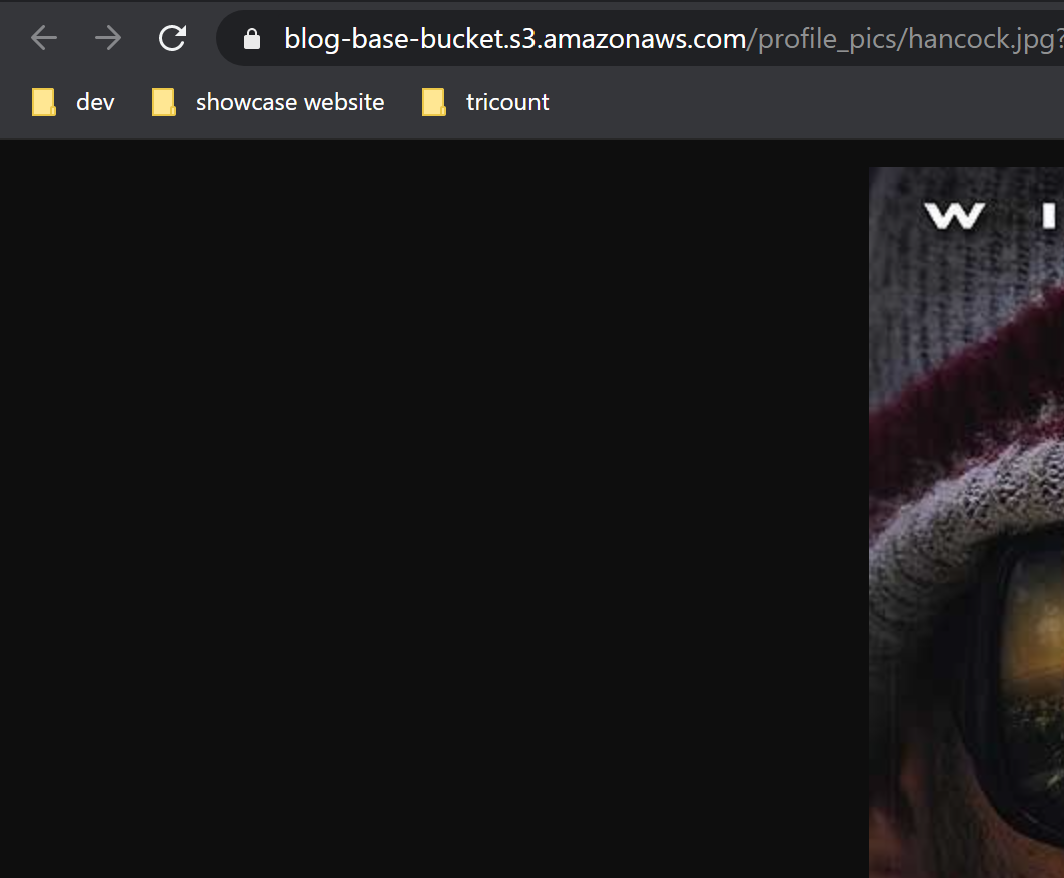

# Reinitialisation du mot de passe par e-mail

Dans cette partie nous allons mettre en place un système très courant sur tous les sites webs avec authentification, un système de réinitialisation de mot de passe par envoi de mail. Et encore une fois, DJANGO facilite cette mise en place en fournissant un système pré-fabriqué, que nous allons voir tout de suite.

## PasswordResetView

La première chose que DJANGO met à disposition pour cette fonction, c'est une class-based view nommée ___PasswordResetView___, que nous allons déclarer comme pour les pages de login et de logout, dans le fichier ___urls.py___ du projet. Cette class-based view vient également de ___auth_views___. Nous lui associons l'url ___password-reset/___, le template ___password_reset.html___, et le nom ___password_reset___.

Cette nouvelle page fournis un formulaire à notre utilisateur, afin qu'il puisse réaliser une demande de réinitialisation de mot de passe via l'envoi d'un lien sur son e-mail.

In [ ]:
# blog_base/urls.py

from django.contrib import admin
from django.contrib.auth import views as auth_views
from django.conf import settings
from django.conf.urls.static import static
from django.urls import path, include
from users import views as user_views

urlpatterns = [
    path('admin/', admin.site.urls),
    path('register/', user_views.register, name='register'),
    path('profile/', user_views.profile, name='profile'),
    path('login/', auth_views.LoginView.as_view(template_name='users/login.html'), name='login'),
    path('logout/', auth_views.LogoutView.as_view(template_name='users/logout.html'), name='logout'),
    
    # Add a new url with class based view PasswordResetView.
    
    path('password-reset/', auth_views.PasswordResetView.as_view(template_name='users/password_reset.html'), name='password_reset'),
    path('', include('blog.urls')),
]

if settings.DEBUG:
    urlpatterns += static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)

Nous avons renseignés le nom du template ___password_reset.html___, que nous allons créer tout de suite. Il s'agit d'une page qui renverra juste un formulaire pour que l'utilisateur soumette son adresse e-mail, afin de recevoir la demande de réinitialisation de mot de passe à celle-ci.

Nous partons sur la base du template ___login.html___ pour notre nouveau template.

In [ ]:
# users/templates/users/password_reset.html

{% extends 'blog/base.html'%}
{% load crispy_forms_tags %}
{% block content %}
    <div class="content-section">
        <form method="POST">
            {% csrf_token %}

            <!-- fieldset tag allow to group related elements in a form -->
            
            <fieldset class="form-group">
                <legend class="border-bottom mb-4">Reset Password</legend>
                {{ form|crispy }}
                <button class="btn btn-outline-info mt-2 mb-2" info="submit">Request Reset Password</button>
            </fieldset>

        </form>
    </div>

{% endblock content %}

## PasswordResetDoneView

Après la génération de ce formulaire, il nous manque une page sur laquelle l'utilisateur sere redirigé après soumission du formulaire. Nous créons donc une nouvelle url en utilisant la class-based view ___PasswordResetDoneView___ fournis par DJANGO, avec comme path ___password-reset/done___, comme template associé ___password_reset_done.html___, et comme nom d'url ___password_reset_done___.

In [ ]:
# blog_base/urls.py

from django.contrib import admin
from django.contrib.auth import views as auth_views
from django.conf import settings
from django.conf.urls.static import static
from django.urls import path, include
from users import views as user_views

urlpatterns = [
    path('admin/', admin.site.urls),
    path('register/', user_views.register, name='register'),
    path('profile/', user_views.profile, name='profile'),
    path('login/', auth_views.LoginView.as_view(template_name='users/login.html'), name='login'),
    path('logout/', auth_views.LogoutView.as_view(template_name='users/logout.html'), name='logout'),
    path('password-reset/', auth_views.PasswordResetView.as_view(template_name='users/password_reset.html'), name='password_reset'),
    
    # New url pattern for redirection page after user submit form to reset password.
    
    path('password-reset/done', auth_views.PasswordResetDoneView.as_view(template_name='users/password_reset_done.html'), name='password_reset_done'),
    path('', include('blog.urls')),
]

if settings.DEBUG:
    urlpatterns += static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)

Ensuite, comme précédemment, passons à la création de notre template ___password_reset_done.html___ de cette nouvelle url, qui renvoie simplement un messsage indiquant que la demande par mail a bien été prise en compte.

In [ ]:
# users/templates/users/password_reset_done

{% extends 'blog/base.html'%}
{% block content %}
    
    <div class="alert alert-info">
        An email has been sent with instructions to reset your password
    </div>
    
{% endblock content %}

Rendez-vous à la page ___password-reset___ pour tester la soumission du formulaire de réinitialisation de mot de passe. Entrer votre adresse email et envoyer la demande. DJANGO remonte une erreur, indiquant qu'il ne trouve pas l'url ___password_reset_confirm___, et que durant la phase de rendering (rendu) du template qui se nomme ___password_reset_email.html___, il a voulu générer une url ___password_reset_confirm___ avec deux paramètres associés, ___uidb64 = uid___ et ___token = token___.

Nous pouvons donc en conclure que c'est ce template ___password_reset_email.html___ que DJANGO utilise, afin de générer et envoyer l'email de reinitialisation de mot de passe à l'utilisateur, et qu'il génère un lien utilisant l'url ___password-confirm-view___.

## PasswordResetConfirmView

Nous allons donc résoudre cette erreur, en commençant par créer l'url ___password-reset-confirm___ demandée, dans notre fichier ___urls.py___ du projet. Dans l'url, nous avons vus que 2 paramètres étaient inclus, ___uidb64___, qui est l'id de l'utilisateur encodé en base 64, et ___token___ qui signifie jeton, qui créé pour vérifier la validité du mot de passe. Il faut donc les indiquer dans notre nouvelle url.

In [ ]:
# blog_base/urls.py

from django.contrib import admin
from django.contrib.auth import views as auth_views
from django.conf import settings
from django.conf.urls.static import static
from django.urls import path, include
from users import views as user_views

urlpatterns = [
    path('admin/', admin.site.urls),
    path('register/', user_views.register, name='register'),
    path('profile/', user_views.profile, name='profile'),
    path('login/', auth_views.LoginView.as_view(template_name='users/login.html'), name='login'),
    path('logout/', auth_views.LogoutView.as_view(template_name='users/logout.html'), name='logout'),
    path('password-reset/', auth_views.PasswordResetView.as_view(template_name='users/password_reset.html'), name='password_reset'),
    path('password-reset/done', auth_views.PasswordResetDoneView.as_view(template_name='users/password_reset_done.html'), name='password_reset_done'),
    
    # New url using by password_reset_email.html template to generate email with link to reset password of user
    # This new url take 2 parameters, uidb64, the id of user encoded with 64 base, and token, which validate the password
    
    path('password-reset-confirm/<uidb64>/<token>', auth_views.PasswordResetConfirmView.as_view(template_name='users/password_reset_confirm.html'), name='password_reset_confirm'),
    path('', include('blog.urls')),
]

if settings.DEBUG:
    urlpatterns += static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)

Il ne nous reste plus qu'à créer le template associé à cette nouvelle url, qui sera donc un formulaire permettant à l'utilisateur de changer son mot de passe.

In [ ]:
# users/templates/users/password_reset_confirm.html

# Take login template for base

{% extends 'blog/base.html'%}
{% load crispy_forms_tags %}
{% block content %}
    <div class="content-section">
        <form method="POST">
            {% csrf_token %}

            <!-- fieldset tag allow to group related elements in a form -->
            
            <fieldset class="form-group">
                <legend class="border-bottom mb-4">New Password</legend>
                {{ form|crispy }}
                <button class="btn btn-outline-info mt-2 mb-2" info="submit">Reset Password</button>
            </fieldset>

        </form>
    </div>

{% endblock content %}

A présent, si vous tentez une demande de réinitialisation de mot de passe, DJANGO vous soulèveras une erreur. Cette erreur est due au faite que nous essayons d'envoyer un e-mail, mais que nous n'avons aucun serveur mail ou client de messagerie pour le faire. Il existe plusieurs moyen de réaliser cette configuration.

## Le SMTP Backend

L'auteur du tutoriel suivis ici propose d'utiliser le client de messagerie GMAIL. Pour cela il vous faut donc un compte GMAIL que vous pouvez créer aisement via la page suivante <a>https://accounts.google.com/signup/v2/webcreateaccount?flowName=GlifWebSignIn&flowEntry=SignUp</a>. Après création de votre compte GMAIL, nous allons pouvoir configurer le projet pour utiliser le client de messagerie.

Pour cela, rendez-vous dans le fichier settings.py du projet. En premier, pour configurer spécifiquement, ce que DJANGO appelle le SMTP Backend (moteur SMTP, moteur "d'envoi de mail"), il faut l'appeler dans notre fichier de configuration avec la constante ___EMAIL_BACKEND = 'django.core.mail.backends.smtp.EmailBackend'___.

A la suite de cette déclaration, voici les différentes constantes à ajouter par la suite pour configurer notre moteur de messagerie en passant par GMAIL.

In [ ]:
# blog_base/settings.py

(...)

EMAIL_BACKEND = 'django.core.mail.backends.smtp.EmailBackend
EMAIL_HOST = 'smtp.gmail.com'
EMAIL_PORT = 587
EMAIL_USE_TLS = True
EMAIL_HOST_USER = # mail of your GMAIL account
EMAIL_HOST_PASSWORD = # password of your GMAIL account

Avec cette configuration, les mails de réinitialisation seront envoyés via GMAIL. Je vous mets à la suite un lien vers la documentation de DJANGO expliquant les autres configurations possibles pour gérer le moteur d'email :
<a>https://docs.djangoproject.com/fr/3.1/topics/email/</a>

## PasswordResetCompleteView

Une dernière vue à configurer, celle qui apparaitra pour indiquer à l'utilisateur que son mot de passe à bien été changer. Cette class-based view se nomme ___PasswordResetCompleteView___, et nous allons tous de suite l'intégrer aux urls du projet comme les autres class view de la fonction de réinitialisation de mot de passe.

In [ ]:
# blog_base/urls.py

from django.contrib import admin
from django.contrib.auth import views as auth_views
from django.conf import settings
from django.conf.urls.static import static
from django.urls import path, include
from users import views as user_views

urlpatterns = [
    path('admin/', admin.site.urls),
    path('register/', user_views.register, name='register'),
    path('profile/', user_views.profile, name='profile'),
    path('login/', auth_views.LoginView.as_view(template_name='users/login.html'), name='login'),
    path('logout/', auth_views.LogoutView.as_view(template_name='users/logout.html'), name='logout'),
    path('password-reset/', auth_views.PasswordResetView.as_view(template_name='users/password_reset.html'), name='password_reset'),
    path('password-reset/done', auth_views.PasswordResetDoneView.as_view(template_name='users/password_reset_done.html'), name='password_reset_done'),
    path('password-reset-confirm/<uidb64>/<token>', auth_views.PasswordResetConfirmView.as_view(template_name='users/password_reset_confirm.html'), name='password_reset_confirm'),
    
    # Add the url for confirm user reset password
    
    path('password-reset-complete/', auth_views.PasswordResetCompleteView.as_view(template_name='users/password_reset_complete.html'), name='password_reset_complete'),
    path('', include('blog.urls')),
]

if settings.DEBUG:
    urlpatterns += static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)

Et comme pour les autres vues que nous avons ajouter dans cette partie, nous créons le template qui lui es associé, ici ___password_reset_complete.html___, qui sera une simple page affichant le message de confirmation de réinitialisation de mot de passe de l'utilisateur.

Nous pouvons donc utiliser le template de ___password_reset_done.html___ en base, et juste changer le message dans la balise ___div___. Nous ajoutons également une balise de lien pour que l'utilisateur retourne sur la page de login.

In [ ]:
# users/templates/users/password_reset_complete.html

{% extends 'blog/base.html'%}
{% block content %}
    
    <div class="alert alert-info">
        Your password has been successfully changed !
    </div>

    <a href="{% url 'login' %}">Sign in here</a>
    
{% endblock content %}

## Lien vers mot de passe oublié

La fonctionnalité est bien ajoutée à notre projet, il ne reste plus qu'à la rendre accessible aux utilisateurs. Si vous l'avez remarqué, la plupart du temps cette fonctionnalité se trouve sur la page de login. Et c'est donc ce que nous allons faire en ajoutant donc un lien vers la page de réinitialisation de mot de passe.

Rendez-vous donc dans le template ___login.html___ pour ajouter ce lien.

In [ ]:
# users/templates/users/login.html

{% extends 'blog/base.html'%}
{% load crispy_forms_tags %}
{% block content %}
    <div class="content-section">
        <form method="POST">
            {% csrf_token %}

            <!-- fieldset tag allow to group related elements in a form -->
            
            <fieldset class="form-group">
                <legend class="border-bottom mb-4">Log In</legend>
                {{ form|crispy }}
                <button class="btn btn-outline-info mt-2 mb-2" info="submit">Sign In</button>
                
                # Add the link to allow access at user to reset his password
                
                <small class="text-muted ml-2">
                    <a href="{% url 'login' %}">Forgot Password ?</a>
                </small>
            </fieldset>

        </form>
        <div class="border-top pt-3">
            <small class="text-muted">
                Need an account ? <a class="ml-2" href="{% url 'register' %}">Sign Up</a>
            </small>
        </div>
    </div>

{% endblock content %}

Cette partie se termine, nous allons attaquer la dernière partie de ce tutoriel, étant la plus importante, le déploiement de notre projet en production.

# Deploiement du projet

La partie de déploiement du projet étant une des plus complexe, soyez bien attentif. Nous allons donc déployer notre application grâce à ___Heroku___, qui est une plateforme cloud pour déployer des applications. Une application DJANGO est déployable sur un serveur Linux également, l'auteur de ce tutoriel en fait une vidéo également, mais Heroku nous facilite grandement la tache.

En premier lieu, aller sur le site et se créer un compte : <a>https://www.heroku.com/</a>

## Heroku CLI et GIT

Dans ce tutoriel, nous supposons que vous avez le système de versioning ___GIT___ et que vous savez l'utiliser. Si ce n'est pas le cas, téléchargez le sur le site officiel et n'hésitez pas à vous rendre sur Youtube, où des vidéos très rapide (moins de 30 min) vous expliquerons les bases.

Ensuite après acquisition de GIT, télécharger également ___Heroku CLI___, qui est la ligne de commande de Heroku.

Lien GIT : <a>https://git-scm.com/</a>
Lien Heroku CLI : <a>https://devcenter.heroku.com/articles/heroku-cli</a>

Pour vérifier la bonne installation de Heroku CLI, taper ___heroku___ dans votre ligne de commande pour voir apparaitre toutes les commandes possibles.

## Serveur Web GUnicorn, requirements.txt, et .gitignore

Avant de passer à la suite du déploiement, nous allons également installer le package ___gunicorn___, qui est un serveur web HTTP WSGI. Il nous servira pour le déploiement de notre application.

## Requirements.txt

Gunicorn étant le dernier package que nous installerons, il est une bonne pratique, et nécessaire dans notre cas, de recenser tous les packages et les dépendances que notre projet utilise.

Pour cela il existe une commande assez simple. Aller dans le dossier de votre projet, votre environnement virtuel Python activé, et taper ___pip freeze > requirements.txt___. Cette commande va inscrire dans un fichier texte la liste des packages et dépendances que vous avez dans votre environnement Python actuel.

## .gitignore

Si vous avez les bases de GIT à ce stade du tutoriel, il existe un moyen simple d'ignorer certains fichiers, lorsque l'on veut réaliser un commit d'un projet. Il s'agit d'un fichier ___.gitignore___, dans lequel vous devez noter les noms des fichiers et dossiers que vous voulez donc ignorer lors de l'ajout de votre projet dans un commit GIT.

Etant donner que notre projet va être partager sur Heroku, certains fichiers ne seront pas utiles. Faites donc un fichier ___.gitignore___ à la racine de votre projet pour ignorer les fichiers comme les sauvegardes de Jupyter Notebook, ou d'autres fichiers qui ne vous semblent pas utiles.

Après la création de votre fichier ___.gitignore___, réaliser un commit ___(git add . puis git commit -m "Last commit")___.

## Creation d'une application Heroku

Pour commencer nous allons nous connecter avec notre compte préalablement créer, en tapant ___heroku login___ dans la ligne de commande. Appuyer ensuite sur n'importe quelle touche pour ouvrir votre navigateur internet et vous connecter.

Maintenant passons à la première étape du déploiement. Nous allons en premier lieu créer une application Heroku. Pour cela rien de plus simple, taper la commande ___heroku create nom_de_votre_app___, en mettant le nom de l'app que vous désirez ___(my-first-django-app___ par exemple). Si le nom est déjà pris, soyez inventif !

Une fois l'application créée, vous verrez un retour de Heroku indiquant une url accessible maintenant à n'importe qui sur internet, ainsi que le nom d'un git repository, que nous allons utiliser pour envoyer notre code. Pour ouvrir votre application Heroku, vous pouvez taper ___heroku open___, et voir la magnifique page d'accueil de votre application.

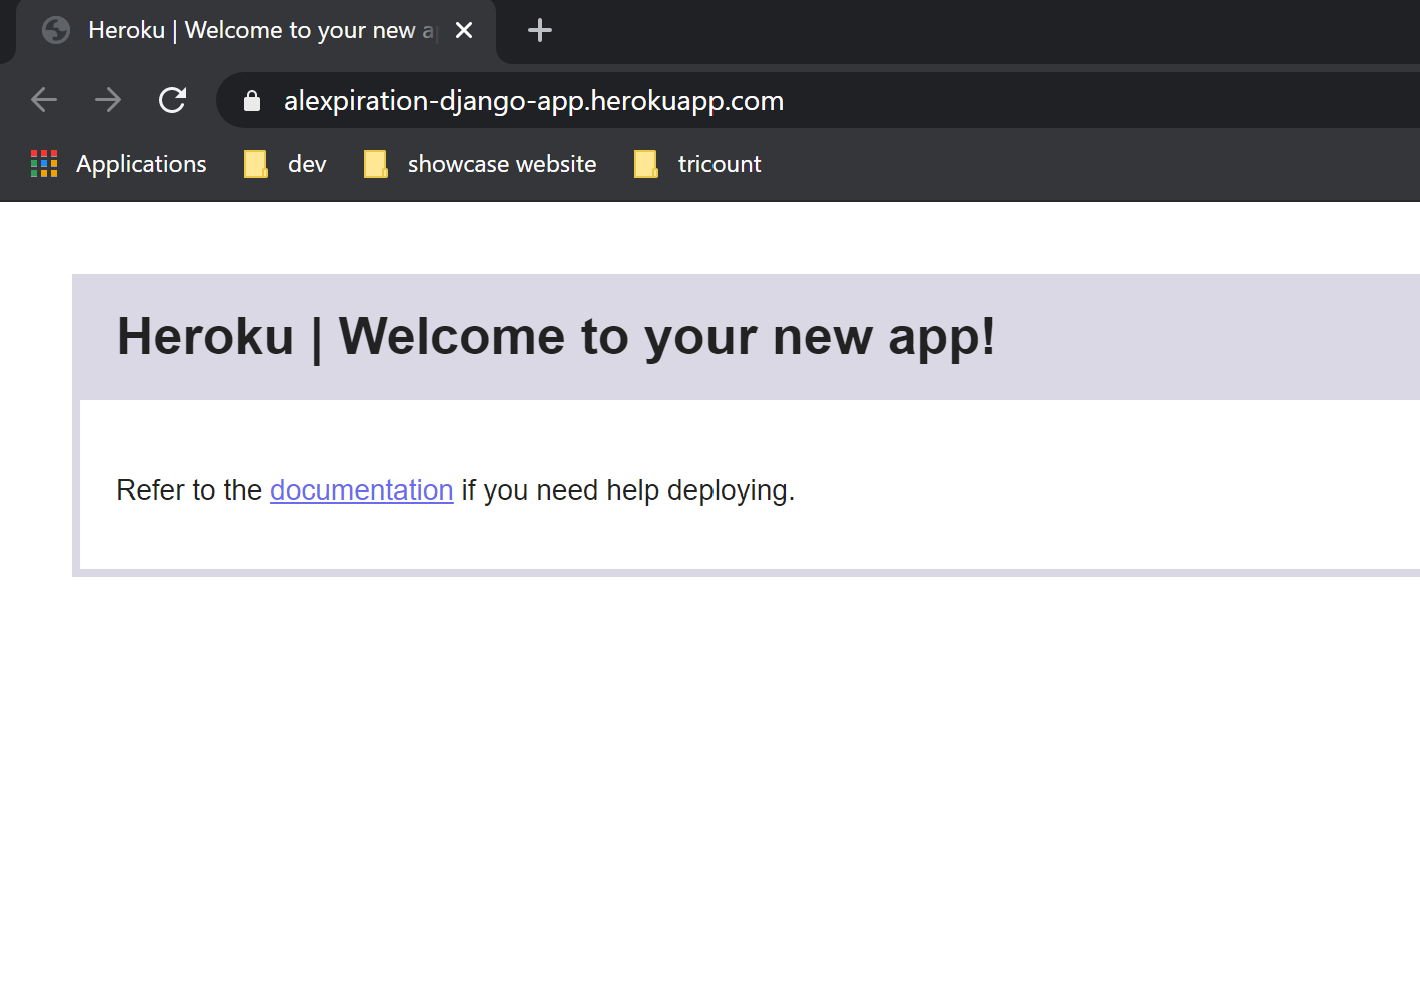

Comme dit précédemment, nous allons donc utiliser git pour envoyer notre code sur notre application Heroku. Pour cela taper dans la ligne de commande ___git push heroku master___. Votre ligne de commande va travailler un petit moment pour envoyer tous ce code sur votre application Heroku.

A la fin du chargement, vous verrez que l'envoi de notre code à échouer, et qu'un petit peu avant la fin, des détails sont donnés sur les raisons du rejet. Lorsque vous avez un rejet de l'envoi du code, dites vous que sur une application que vous avez déjà mise en ligne, elle ne sera pas parasytée ou bloquée, le code modifier n'est tous simplement pas pris en compte.

## Fichiers statiques

Dans l'erreur renvoyée ici, nous constatons que c'est lors de l'appel par django de ___python manage.py collectstatic___, ce qui est normal, car si vous avez bien suivis ce tutoriel, et si vous vous plongez dans la documentation de DJANGO, vous verrez que les fichiers statiques ne sont pas gérer et charger de la même façon en production et en déploiement.

Nous pouvons voir un détail retourner par Heroku : ___"You're using the staticfiles app without having set the STATIC_ROOT setting to a filesystem path"___. Cette phrase veut dire que cette fameuse variable ___STATIC_ROOT___ n'est pas configurer et donc, ne donne pas l'emplacement dans lequel se trouve nos fichiers statique. Nous allons donc tout de suite remédier à cela en allant dans le fichier ___settings.py___ de notre projet.

Déclarer la variable ___STATIC_ROOT___ juste avant ___STATIC_URL___, en lui donnant la valeur ___os.path.join(BASE_DIR, 'staticfiles')___. Après l'ajout de cette configuration, réaliser un nouveau commit, puis retenter d'envoyer votre code via ___git push heroku master___. Normalement, l'envoi du code doit se passer sans erreurs particulières mais cela ne veut pas dire que tout est bon. Ouvrons notre application Heroku pour voir avec ___heroku open___.

## Heroku log

Le code a bien été envoyé mais nous avons une ___Application Error___ remontée par Heroku. Il nous suggère de réaliser la commande ___heroku logs --tail___ pour avoir un aperçu des erreurs remontées. Aller dans la ligne de commande pour la taper. Plusieurs lignes apparaissent décrivant ce que Heroku à réaliser comme étape, et dans les dernières lignes, nous pouvons apercevoir ___at=error___ indiquant ici une erreur.

## Procfile

Dans cette erreur nous pouvons lire après ___alt, desc="No web processes running"___. Heroku nous indiques qu'il ne sait pas comment exécuter notre application. Nous allons créer un fichier nommé ___Procfile___ (sans extension), dans la racine de notre projet et voir comment il fonctionne. Dans ce fichier, ecrivons la chose suivante :

In [ ]:
# Procfile

web: gunicorn project_name.wsgi

Remplacer ___project_name___ par le nom de votre projet DJANGO. Pour vous donnez des détails, ___web___ est le type de process, donc pour notre cas un process web, qui indique que ce process va recevoir un traffic internet quand il sera déployé. Ensuite ___gunicorn___, est la commande pour exécuter notre web process, pour que notre code Python puisse communiquer avec notre serveur web, pour faire simple.

Ensuite nous faisons appel à notre fichier ___wsgi.py___ de notre projet (WSGI pour ___Web Service Gateway Interface___). Ce qu'il faut comprendre ici, c'est que gunicorn va faire appel à un objet ___application___ contenu dans notre fichier ___wsgi.py___ pour nous afin d'exécuter le process web.

Une fois le fichier ajouté, faire un commit sur votre application Heroku et ouvrir de nouveau votre application avec ___heroku open___. La pge ouverte nous donne une première bonne nouvelle, c'est qu'il s'agit de l'interface de debug de DJANGO, donc DJANGO est bien exécuté sur notre application Heroku !

Par contre, cela signifie que notre application DJANGO est également exécutée en mode DEBUG. Nous ne devons pas oublier de désactiver ceci, car cela pourrait permettre à n'importe qui de tester et découvrir les vulnérabilités de notre application.

## ALLOWED_HOST

L'erreur remontée concerne le header que notre application reçoit. Actuellement, notre application DJANGO ajoute une couche de sécurité, en n'acceptant que les requêtes venant de la liste ___ALLOWED_HOST___ dans notre fichier ___settings.py___. Aller dans le fichier ___settings.py___, et ajouter le nom de votre domaine dans la liste en tant que string.

In [ ]:
# blog_base/settings.py

(...)

ALLOWED_HOST = ['alexpiration-django-app.herokuapp.com']

(...)

## DEBUG et SECRET_KEY

Comme je le disais en amont également, juste au dessus nous pouvons observer que notre application a le mode ___DEBUG = True___, ce qui n'est pas bon pour une application en ligne. Hors nous aimerions que l'application soit dans ce mode DEBUG lorsque nous travaillons dessus sur notre ordinateur en local. La bonne pratique pour cette valeur est donc de la définir dans une variable d'environnement.

Nous allons faire d'une pierre deux coup, en créant également une variable d'environnement pour la variable ___SECRET_KEY___, qui doit rester donc secrète pour le mode développement, et nous allons en créer une nouvelle pour le mode production. Pour créer cette nouvelle clé secrète, il existe une librairie dans les librairies standards de Python 3 nommée ___secrets___, qui permet donc de générer une clé secrète aléatoire.

Nous allons donc ouvrir un interpréteur Python, importer la librairie ___secrets___, et dans cette librairie nous utilisons la méthode ___token_hex___ en lui passant en argument le nombre de bit que nous souhaitons, c'est à dire que plus vous passez un nombre de bits important, plus votre clé sera grande et complexe.

In [1]:
# Python Interpreter

import secrets

secrets.token_hex(24)

'80654f8e84a1fdbe0fbc05e9945af1dec6a3a25021238a13'

Après génération de notre nouvelle clé, déclarer les nouvelles variables d'environnement pour le mode DEBUG et la SECRET_KEY. Une fois déclarées, nous allons les ajouter à notre application Heroku. Pour cela rien de plus simple, aller dans votre ligne de commande et pour chaque variable d'environnement que vous voulez ajouter, taper la commande ___heroku config:set___ et ensuite, vous entrez le nom de votre variable d'environnement et sa valeur.

In [ ]:
# Heroku CLI

heroku config:set ENV_VAR="value"

Profitez également d'intégrer les variables liées notre bucket AWS, ainsi que les variables pour l'utilisation du service de messagerie GMAIL pour la réinitialisation des mot de passe. Maintenant que nos variables d'environnement sont intégrées sur Heroku, modifions notre fichier ___settings.py___ pour les intégrer dans notre code.

In [ ]:
# blog_base/settings.py

(...)

# SECRET_KEY = "secret key for dev mode"
SECRET_KEY = os.environ.get('SECRET_KEY')

(...)

Les variables liées à AWS ainsi que celle de GMAIL sont déjà bien configurés, nous pouvons réaliser un commit vers Heroku pour voir la suite du déploiement.

## Déploiement de la base de donnée PostgreSQL

Maintenant, une nouvelle erreur est remontée par DJANGO lorsque vous ouvrez votre application Heroku. En effet, nous avons choisis d'ignorer le fichier ___db.sqlite3___ dans notre repository git, mais cela à donc pour effet que l'application DJANGO n'a plus de database actuellement. Si vous vous souvenez du début de ce tutoriel, nous avons dis que nous utiliserons SQLITE pour le développement.

Maintenant nous allons mettre en place une nouvelle base de donnée avec PostgreSQL. En premier, installer PostgreSQL sur votre ordinateur en suivant les instructions fournies par Heroku, selon votre système d'exploitation. Pour ma part je suis sur Windows donc l'installation se fait via un installateur à télécharger.

Heroku instructions : <a>https://devcenter.heroku.com/articles/heroku-postgresql#local-setup</a>

Une fois l'installation sur votre ordinateur réalisée, nous allons créer une base de donnée Postgresql sur notre application Heroku. Avant, Heroku peut avoir déjà créer une base de donnée pa défaut. Pour le vérifier, taper dans votre ligne de commande ___heroku addons___, et cela vous affichera si oui ou non des bases de données sont présentes ou non. Le plus souvent, une base de donnée du nom de ___heroku-postgresql___ est créée.

Si ce n'est pas le cas vous pouvez en créer une avec la ligne de commande ___heroku addons:create heroku-postgresql:hobby-dev___, qui va donc créer une base de donnée ___heroku-postgresql___ avec comme plan ___hobby-dev___ qui est le "forfait" gratuit pour la base de donnée.

Vous pouvez voir obtenir plus de détails sur la base de donnée avec la commande ___heroku pg___, comme le nombre d'entrée dans la base de donnée.

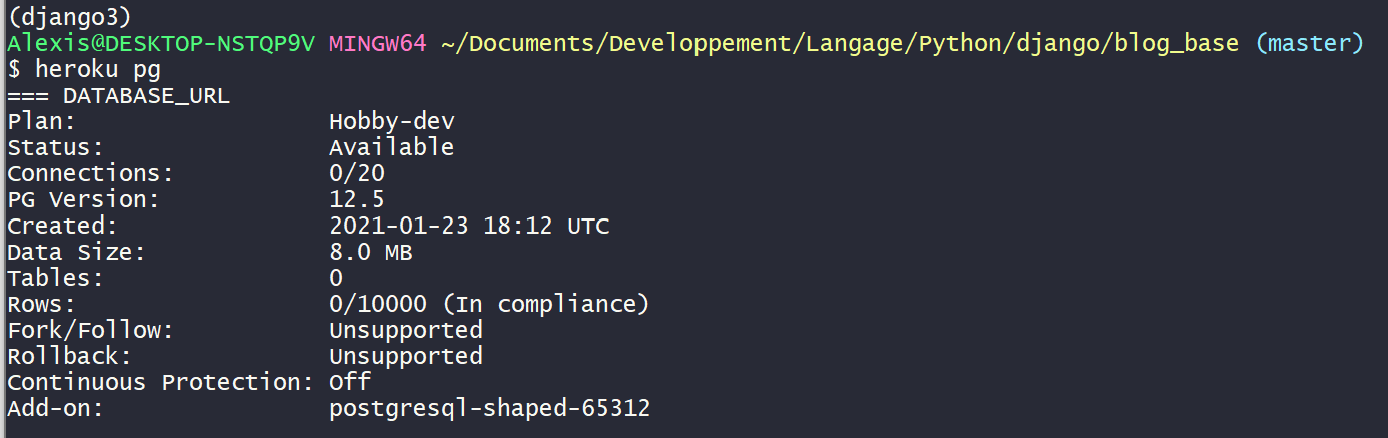

## django-heroku et whitenoise

Maintenant que nous avons notre base de donnée Postgresql, il nous faut créer une table ainsi qu'un super user pour se connecter à l'inteerface d'administration de DJANGO. Mais avant tous ca, nous allons devoir intégrer les configurations nécessaires dans notre fichier ___settings.py___ pour que notre application DJANGO puisse communiquer avec notre base de donnée.

Pour simplifier ça, nous allons installer un package avec pip : ___django-heroku___. Ce package va configurer l'url de la base de donnée automatiquement pour faciliter la communication entre celle-ci et notre application, mais également pour configurer les objets statiques (statics assets) avec gunicorn, avec un package intégré appelé ___whitenoise___.

Pour rendre cetre configuration automatique active, aller dans le fichier ___settings.py___, et importer le package ___django_heroku___. Ensuite, tout en bas du fichier, écrire ___django_heroku.settings(locals())___.

In [ ]:
# blog_base/settings.py

import django_heroku

(...)

django_heroku.settings(locals())

Avant de réaliser un commit vers notre application Heroku, vu que nous avons installer un nouveau package, mettez à jour le fichier ___requirements.txt___ avec la commande ___pip freeze > requirements.txt___.

Après le dernier commit, ouvrez votre application Heroku, et nous observons une nouvelle erreur indiquant que la relation ___blog_post___ n'existe pas, ce qui veut dire que notre application DJANGO sur Heroku communique bien avec notre database ! Les modèles de notre database sont déjà codés, il faut donc juste exécuté une migration de nos modèles sur la database sur Heroku.

Pour cela utiliser la commande ___heroku run python manage.py migrate___, cela va lancer la console Python intégrée dans Heroku et donc réaliser la migration de nos modèles, et la création de la structure de notre base de donnée. Si vous lancez votre application, elle est officiellement en ligne !

## Superuser

Un des dernier ajustement, la création d'un super utilisateur pour gérer l'interface d'aministration de votre application. Comme je disais, Heroku intègre une console Python, mais également une console bash que nous pouvons démarrer. Pour cela taper ___heroku run bash___. Une fois sur la console, vous n'avez plus qu'à créer un super user avec la commande ___python manage.py createsuperuser___.

## Enlever le mode DEBUG

La dernière chose à faire est d'enlever le mode DEBUG, pour cela nous avions déclarer une variable d'environnement. Mais pour qu'elle fonctionne, la formule pour déclarer la valeur est un peu différente

In [ ]:
# blog_base/settings.py

(...)

DEBUG = (os.environ.get('DEBUG_VALUE') == True)

(...)

Nous faisons en sorte de réaliser une condition qui va passer la valeur à True ou False, car il n'est pas possible de transmettre directement un string à cette variable d'environnement.

# Soap Box

Cette partie du notebook contient les divers notes en rapport ou non avec le(s) cours suivis sur le framework DJANGO. On peut y retrouver des conseils sur le framework, comme des bonnes pratiques pour le langage Python en général, ou encore des bonnes pratiques concernant la mise en place de l'environnement réalisée pour ce cours.

## Conda Activate

La commande ___conda activate___ permet de configurer son terminal pour pouvoir utiliser les commandes conda.

## Changer le terminal par défaut de VS Code

Aller dans ___File -> Preferences -> Settings___. Dans le coin droite appuyer sur ___Open Settings___, et dans le dictionnaire, copier coller ceci : ___"terminal.integrated.shell.windows":___. Juste après les deux points, ouvrir des guillemets et mettre le chemin vers l'application de terminal que vous voulez mettre par défaut. Redemarrer VS Code.

## Import de plusieurs modules

Lorsqu'une liste d'import de module commence à être longue, vous pouvez la mettre sur plusieurs lignes en ouvrant des parenthèses comme-ceci

In [ ]:
from module import (
    package1,
    package2,
    package3
)

# Cacher des mots de passes et login dans un script

Pour pouvoir communiquer des informations sensibles dans un script, nous pouvons utiliser les variables d'environnements en local. Nous aurons accès à leur valeur via la méthode ___environ.get('ENV_VAR_NAME')___ avec le module ___os___.

## Windows

Sur Windows, taper env dans la barre de recherche et choisir ___Modifier les variables d'environnement___.

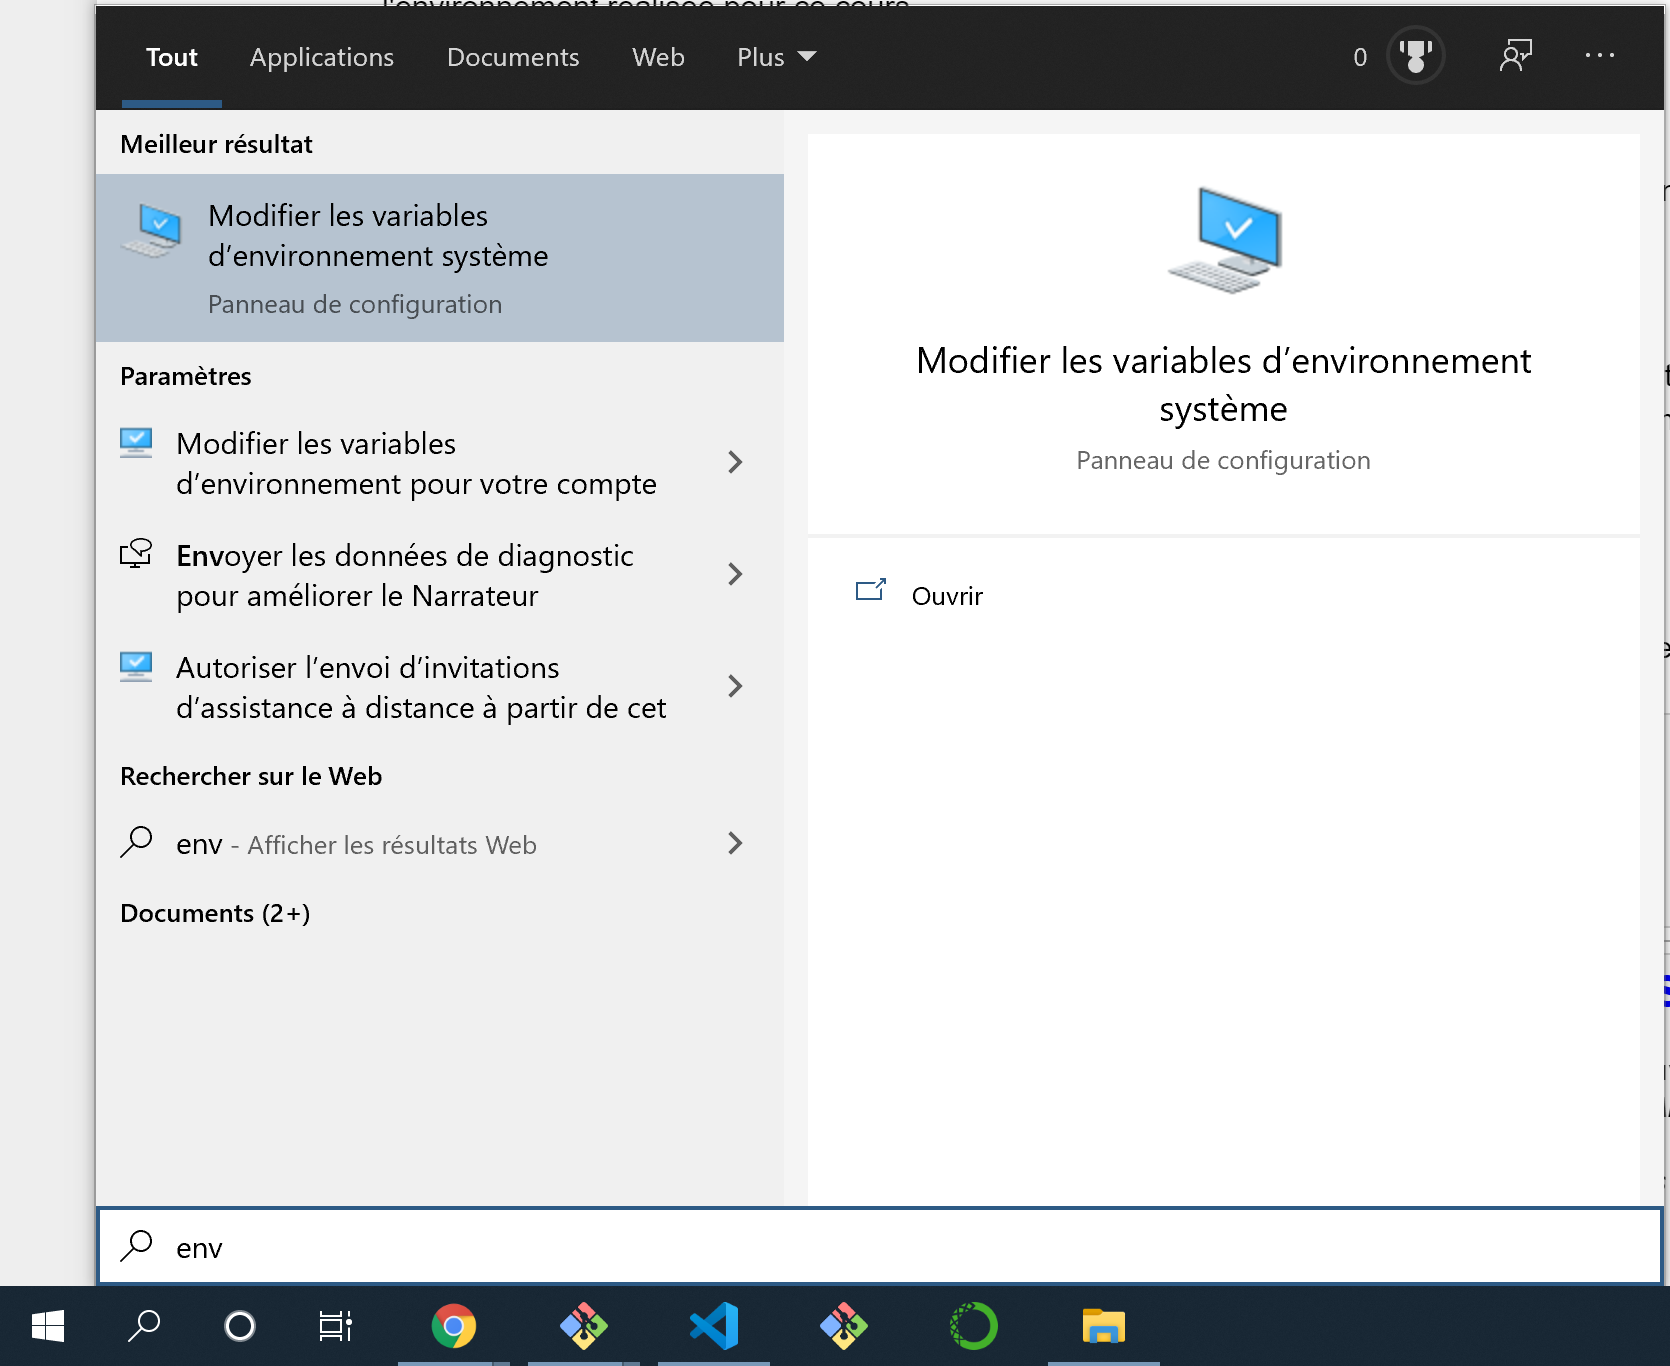

Dans la fenêtre qui apparait, cliquer ___Variable d'environnement___, et vous verrez une nouvelle fenêtre avec les variables d'environnement déjà présente sur votre ordinateur. Pour en ajouter une personnel, dans l'encadré ___Variable d'utilisateur___, cliquer sur ___Nouvelle___. Il vous suffit ensuite de donner le nom et la valeur de votre variable.

Pour y avoir accès, remplacer ___ENV_VAR_NAME___ par le nom de votre variable d'environnement.

## Sur Bash

La déclaration des variables d'environnements via Bash se fait dans le fichier ___.bash_profile___. Ouvrir ce fichier dans votre editeur de texte préféré. Pour déclarer une nouvelle variable, commencer par le mot clé ___export___ puis déclarer votre variable comme une variable Python

In [ ]:
# ~/.bash_profile

export NEW_ENV_VAR = "Value of the env var"